# **Business Understanding**
## **Context**
Philadelphia Buildings Database ini memuat informasi tentang karakteristik fisik dan lokasi bangunan di kota Philadelphia. Data ini dapat menjadi referensi untuk penyewaan, perencanaan, zonasi dan, pemeliharaan properti.

Dataset ini bersumber dari https://opendataphilly.org/. Situs tersebut adalah portal yang menyediakan akses ke lebih dari 300 set data, aplikasi, dan API yang terkait dengan wilayah Philadelphia. Kemudahan dan kebebasan mengakses data ini bertujuan untuk mendorong kinerja pemerintah yang lebih baik dan juga lebih transparan kepada masyarakat.

`The Office of Property Assessment (OPA)` adalah salah satu departemen dalam pemerintahan Kota Philadelphia yang bertugas untuk menentukan nilai setiap properti di Philadelphia. Asesmen harga dari OPA digunakan untuk menghitung pajak properti yang harus dibayar oleh pemilik.

Secara terbuka, OPA menerima pengajuan untuk pengurangan maupun pengecualian yang dapat mengurangi pajak properti. Jika pemilik properti tidak setuju dengan penilaian atau yakin bahwa pengurangan atau pengecualian belum diterapkan dengan benar, OPA menawarkan pilihan untuk meminta peninjauan ulang atau mengajukan banding. Oleh karena itu, sebagai stakeholder, OPA membutuhkan analisis secara mendalam dan sebuah alat atau tool yang dapat membantu OPA dalam menentukan harga properti secara akurat. Kasus ini menjadi sangat penting karena pajak merupakan salah satu sumber pendapatan pemerintah yang akan digunakan untuk perencanaan anggaran kota.

Dalam skala besar, setiap negara memiliki target pendapatan melalui pajak dengan ketentuan dan sistem yang berbeda-beda. Skala lebih kecilnya, pendapatan dari pajak tersebut dikumpulkan dari region, subregion, maupun kota. Pendapatan ini akan dialokasikan dalam beberapa klasifikasi anggaran sesuai kebutuhan kota, termasuk pembangunan, pendidikan, maupun fasilitas umum. Kota Philadelphia memiliki dataset yang berisi harga pasar (market value) setiap properti di kota yang digunakan untuk perhitungan pajak. Seiring berjalannya waktu, akan ada properti-properti baru yang dibangun di Kota Philadelphia yang harga pasarnya belum ditaksasi. Oleh karena itu, penting bagi pemerintah untuk mengetahui proyeksi nominal pendapatan yang akan diterima sebelum menyusun anggaran agar alokasi anggaran menjadi tepat sasaran sesuai target.

Data terbaru di tahun 2020, dilansir pada tautan https://www.pewtrusts.org/en/research-and-analysis/reports/2022/09/how-property-is-taxed-in-philadelphia, total pendapatan (*general revenue*) Kota Philadelphia berjumlah $4,834 M dengan rincian sebagai berikut:
- $  699 M   (14.5%) dari pajak properti
- $2,124  M  (43.9%) dari pajak upah, penghasilan, dan laba bersih
- $1,229 M    (25.4%) dari pajak lainnya
- $  782  M  (16.2%) dari selain pajak


![Tax Property in Philadelphia comapre with other city ](assets/tax.png)

Gambar di atas juga menunjukkan persentase pendapatan yang diwakili oleh pajak properti di Philadelphia dan 10 kota lainnya untuk tahun fiskal 2020, tahun terbaru yang data lengkapnya tersedia. Bagian pendapatan dari pajak properti di Philadelphia sebesar 14,5% dari pendapatan dana umum, kurang dari separuh median 31,5%. Dalam hal pendapatan kota secara keseluruhan, pajak properti memberikan kontribusi sebesar 9,5% di Philadelphia, lebih rendah dibandingkan dengan kota lain yang dipertimbangkan kecuali Columbus, dan juga kurang dari separuh median. 


Dari data di atas dapat dilihat bahwa pajak Kota Philadelphia berkontribusi cukup rendah pada pendapatan kota dibandingkan kota-kota lainnya. Oleh karena itu, kasus ini menjadi penting karena dengan adanya model yang dapat memprediksi harga pasar properti secara akurat berpotensi mengoptimalisasi pendapatan kota.   

## **Problem Statement**
1. Bagaimana caranya memprediksi harga properti sehingga perhitungak pajak menjadi akurat?
1. Jenis properti apa yang sebaiknya diprioritaskan terlebih dahulu untuk efisiensi waktu dan biaya dalam pembuatan model machine learning?
1. Model machine learning apa yang sebaiknya digunakan untuk menghitung nilai properti secara akurat?

## **Goals**
Membuat sebuah model machine learning yang dapat membantu OPA untuk **menentukan harga pasar properti baru (*market value*) yang belum ditaksasi di Kota Philadelphia**.
## **Analytic Approach**
Jadi dari penjabaran di atas, kami akan menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan fitur tertentu seperti lokasi, tanggal, luas dengan yang lainnya dalam hal market value pada jenis gedung perumahan (Residentials atau single Family).

Selanjutnya, kami akan membangun suatu model regresi yang akan membantu perusahaan/badan/lembaga untuk dapat menyediakan 'tool' atau model prediktif yang mampu prediksi market value of property (khususnya jenis perumahan/Residentials) di kota philadelpia di waktu dan lokasi tertentu. Disini kami akan melakukan eksperimen dengan beberapa algoritma model regresi yang sering digunakan seperti Linear Regression, KNN, SGD, Random Forest, XGB, dan LGBM. Dimana kami akan memilih satu model (atau gabungan dari beberapa model) untuk membuat tool tersebut yang sesuai dengan data dari Office of Property Assesment (OPA) https://opendataphilly.org/datasets/philadelphia-properties-and-assessment-history/. \\

*Catatan : rentang tahun data terakhir di update sampai tahun 2020*
## **Evaluation Metrics**
### **Scale-dependent errors**
- `MAE`


**MAE (Mean Absolute Error)** menghitung rata-rata dari selisih absolut antara nilai prediksi dan nilai aktual. MAE dapat digunakan untuk melihat performa model secara umum (skala sama) dengan meminimalisir efek outliers.

| Metric | Details |
| ----- | ----- |
| **MAE** | + Mudah diinterpretasi, robust terhadap outlier (- tidak membedakan overestimation dan underestimation) |

- **RMSLE (Root Mean Squared Log Error)**
    Karena sebaran nilai market value yang lebar (wide range) maka disini kami juga akan menggunakan RMSLE (Root Mean Squared Log Error) yang dimana metric ini hanya mempertimbangkan kesalahan relatif antara antara nilai prediksi dan nilai aktual (dalam skala logaritmik). RMSLE juga memiliki sifat menimbulkan penalti/error yang lebih besar untuk estimasi yang terlalu rendah (underestimated) dari variabel aktual daripada estimasi yang lebih tinggi (overestimated).

    RMSLE :

    \begin{equation}
    \sqrt{\frac{1}{n} \sum_{i=1}^{n} (\log(p_i + 1) - \log(a_i + 1))^2} 
      \end{equation}

  Dimana:
- \(RMSLE\) : Root Mean Squared Logarithmic Error,
- \(n\) :  jumlah data,
- \(p_i\) : nilai hasil prediksi data ke- \(i\) ,
- \(a_i\) nilai aktual (ground truth) data ke \(i\),
- \(\log\) fungsi logaritma natural

### **Percentage errors**
- `MAPE`
**MAPE (mean absolute percentage error)** menghitung rata-rata selisih persentase absolut antara nilai aktual dan nilai prediksi. MAPE memiliki penalti error yang lebih besar untuk overestimation, sehingga cocok untuk mengetahui seberapa besar error pada prediksi yang overestimate.

| **Metric** | **Details** |
| ----- | ----- |
| **MAPE** | + Dapat untuk membandingkan model yang berbeda dengan skala yang sama (- tidak dapat diterapkan jika `y=0`) |


Berdasarkan [International and Business Forecasting Methods](https://openlibrary.org/books/OL3072138M/Industrial_and_business_forecasting_methods) oleh Lewis, C.D. nilai MAPE dapat diinterpretasikan:

|**MAPE value** | **Description**
|----- | ----- |
|0-10% | Highly Accurate
| 10-20% | Good
| 20-50% | Reasonable
| >50% | Innacurate

## **Target**

Berdasarkan jurnal [Data Mining and Analysis Predictions of Real Estate Prices](https://iacis.org/iis/2015/4_iis_2015_30-36.pdf) di Washington, USA. Mereka memperoleh MAE sebesar 102,968 USD ketika memprediksi harga properti pada tahun 2013 dengan median harga 350,000 USD. Karena dataset yang kami gunakan memiliki data pada tahun 2020, maka kami ikut sertakan [laju inflasi](https://www.macrotrends.net/countries/USA/united-states/inflation-rate-cpi) **untuk mengukur batas wajar toleransi MAE dari model kami, yaitu 42,000 USD** (2.3x lebih rendah dari jurnal referensi karena perbedaan harga properti di Washington dan Philadelphia). 

berarti pemerintah bisa underestimate pendapatan pajak (untuk budget planning lebih baik underestimate daripada over karena belum tentu pendapatan pajak terserap semua) hingga 18k USD atau 13% dari nilai aktual, dengan kata lain model lebih baik 2.3 kali lipat dalam memprediksi market value.

Maka terget yang akan kita coba capai adalah 

|**Metric** | **Target**
|----- | ----- |
|MAPE| <= 42k USD
| MAPE | <= 13%


**Pertimbangan:**

* Menurut [Thumbtack](https://www.thumbtack.com/pa/philadelphia/land-surveyors), waktu yang dibutuhkan untuk pembuatan laporan setelah dilakukan survei rata-rata 2 minggu

# **Data Understanding**
## **Attributes Information**
| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| assessment_date | Object | Tanggal penilaian terakhir diubah|
| basements | Object | Jenis basement pada properti: <br/>0. Tidak ada basement<br/>A. Full Finished<br/>B. Full Semi-Finished<br/>C. Full Unfinished<br/>D. Full – Unknown Finish<br/>E. Partial Finished, F. Partial Semi-Finished, G. Partial Unfinished, H. Partial - Unknown Finish, I. Unknown Size - Finished, J. Unknown Size - Unfinished |
| beginning_point | Object | Titik pertama pada batas properti yang dijelaskan. |
| book_and_page  | Object | Menunjukkan dokumen pesanan yang telah diterima. |
| building_code  | Object | Kode gedung dengan 5 karakter alfanumerik. Namun dua digit terendah tidak digunakaan pada saat ini. |
| building_code_description   | Object | Deskripsi dari kode gedung. |
| category_code | int64 | Kode kategori properti.<br/> 1. Residential<br/>2. Hotels and Apartments<br/>3. Store with Dwelling<br/>4. Commercial<br/>5. Industrial<br/>6. Vacant Land |
| category_code_description   | Object | Deskripsi dari kode kategori properti. |
| census_tract   | float64 | Wilayah yang ditetapkan oleh Biro Sensus. |
| central_air   | Object | Y mengindikasikan adanya udara sentral. N mengindikasikan tidak adanya udara sentral. |
| cross_reference    | Object | Nomor terakhir dari rekening untuk transfer. |
| date_exterior_condition    | Object | Tanggal pencatatan kondisi eksterior. |
| depth | float64 | Kedalaman yang diukur dari jalan utama ke garis belakang properti atau jalan sekunder. Dalam kasus perbedaan kedalaman dari garis samping paralel, akan diambil rata-ratanya. Dalam kasur yang tidak biasa, akan diambil ukuran terdalam. Pada daerah sudut, kedalaman yang digunakan adalah bagian depan dari jalan sekunder. |
| exempt_building  | float64 | Pengecualian penilaian bangunan pada sertifikasi. |
| exempt_land | float64 | Pengecualian penilaian tanah pada sertifikasi. |
| exterior_condition | float64 | Berkaitan dengan bagaimana kondisi eksterior yang tampak berdasarkan pengamatan.<br/>0. Tidak Berlaku<br/>1. Konstruksi Baru - Konstruksi yang terlihat lebih baru daripada properti di sekamirnya.<br/>2. Direhabilitasi - Properti lebih unggul dari sebagian besar properti lain di blok tersebut.<br/>3. Di atas rata-rata - Properti terawat dengan baik dimana pemiliknya melakukan perawatan preventif secara berkelanjutan. Kondisi fisik eksterior lebih baik daripada rata-rata namun kurang dari direhabilitasi.<br/>4. Rata-rata - Kondisi yang khas dan paling umum diamati pada eksterior sebagian besar properti diblok tersebut. Tidak ada pekerjaan yang signifikan untuk pengecatan, pertukangan, dsb. Tidak ada kerusakan yang terlihat dengan jelas.<br/>5. Dibawah rata-rata - Perawatan ditunda secara berlebihan. Terdapat penyalahgunaan, keausan, vandalisme kecil, atau kerusakan akibat kebakaran yang tidak diperbaiki.<br/>6. Vacant - Tidak dihuni. Kemungkinan terdapat erdapat tanda FHA, VA, FNMA. Pintu dan jendela diamankan dengan kayu baru.<br/>7. Segel - Pintu dan jendela properti ditutup dengan kayu, timah, balok beton, atau plesteran. Tidak terdapat akses kedalam.<br/>8. Struktur Membahayakan / Terbuka - Beberapa properti tidak memiliki jendela, pintu, atau pintu terbuka. Terlihat bukti vandalisme seperti grafitti, pagar yang hilang, kayu dan metal yang rusak, dsb. Terdapat tanda kerusakan akibat api atau air pada batu bata, dinding, dsb. Jendela pecah dengan interior yang menghitam. |
| fireplaces | float64 | Sebagian besar properti di Philadelphia tidak memiliki perapian. Properti yang tidak memiliki perapian akan dibiarkan kosong. Jika terdapat perapian, akan diisi total perapian yang tersedia. |
| frontage | float64 | Lebar kavling yang berbatasan dengan jalan utama. |
| fuel | Object | Bahan bakar pemanas.<br/>a. Gas alam<br/>b. Pemanas minyak.<br/>c. Listrik (biasanya lebih dari 150amp).<br/>d. Batu bara<br/>e. Tenaga surya<br/>f. Kayu<br/>g. Lainnya<br/>h. Tidak tersedia |
| garage_spaces | float64 | Ruang garasi. |
| garage_type | Object | Tipe garasi.<br/>Terdapat dua jenis parkir, yaitu garasi / carport dan parkir di jalanan terbuka. Garasi / carport dapat berupa :<br/>0. Tidak ada<br/>A. Basement / Built-In - Dibangun di ruang bawah tanah atau dibelakang hunian. Atau dibangun kedalam lantai pertama.<br/>B. Garasi Terhubung - Garasi terhubung ke tempat tinggal.<br/>C. Garasi Terpisah - Garasi pada bangunan lain yang terpisah dengan tempat tinggal.<br/>F. Converted - Garasi yang dialihfungsikan.<br/>S. Self Park - Parkir mandiri.<br/>T. Attendand - Parkir dengan petugas. |
| general_construction  | Object | Konstruksi umum. |
| geographic_ward  | float64 | Subdivisi dari kota berdasarkan geografis sebelum dibentuk divisi semu 77, 78, dan 88. |
| homestead_exemption | float64 | Pembebasan pajak, adalah hukum untuk melindungi nilai rumah penduduk dari pajak properti, kreditor, dan keadaan yang timbul dari kematian pasangan pemilik rumah.|
| house_extension | int64 | Terletak dalam nomor alamat properti untuk properti tertentu, ini akan menjadi nomor tertinggi |
| house_number | int64 | Lima digit angka yang menunjukkan alamat properti tertentu yang terletak di blok |
| interior_condition | float64	 | Menunjukkan kondisi keseluruhan interior: <br/>0. Not Applicable<br/>2. New / Rehabbed<br/>3. Above Average<br/>4. Average<br/>5. Below Average<br/>6. Vacant – No occupancy<br/>7. Sealed / Structurally Compromised |
| location | Object | Lokasi, menggunakan nomor rumah, kode jalan dan nomor unit dan rumah |
| mailing_address_1 | Object | Alamat email 1 |
| mailing_address_2  | Object | Alamat email 2 |
| mailing_care_of   | Object | Alamat email 'care of' |
| mailing_city_state  | Object | Alamat email bagian kota |
| mailing_street   | Object | Alamat email jalan |
| mailing_zip  | Object | Alamat email zip |
| market_value | float64	 | Nilai properti yang ditentukan |
| market_value_date | float64	 | Tanggal terakhir kali *market_value* ditinjau. Terdiri dari bulan dan tahun |
| number_of_bathrooms | float64	 | Jumlah kamar mandi |
| number_of_bedrooms | float64	 | Jumlah kamar tidur |
| number_of_rooms | float64	 | Jumlah ruangan |
| number_stories | float64	 | Jumlah tingkat properti |
| off_street_open  | float64	 | Tidak ada keterangan |
| other_building   | Object | Keberadaan bangunan lain selain bangunan utama |
| owner_1  | Object | Nama pertama yang tercantum di akta |
| owner_2  | Object | Nama kedua yang tercantum di akta |
| parcel_number | int64 | Sembilan digit unik yang dibuat oleh Staf Dewan Revisi Pajak untuk mengidentifikasi properti tertentu |
| parcel_shape  | Object | Tidak ada keterangan |
| quality_grade | float64	 | Tingkat kualitas berkaitan dengan pengerjaan dan bahan bangunan |
| recording_date  | Object | Tanggal akta diajukan ke pencatatan |
| registry_number  | Object | Nomor identifikasi pada pemetaan |
| sale_date| Object | tanggal penjualan properti |
| sale_price | float64 | Harga penjualan properti |
| separate_utilities  | Object | Fasilitas lain yang terpisah dari properti: <br/>a. Terpusat (satu pemanas, tangki air panas, layanan listrik dan layanan gas)<br/>b. Sebagian terpisah (tidak terpusat atau tidak semua terpisah)<br/>c. Semua terpisah |
| sewer  | Object | Selokan |
| site_type  | Object | Tidak ada keterangan |
| state_code | float64 | Kode negara bagian/ daerah |
| street_code | int64 | Kode jalan |
| street_designation | Object | Tipe jalanan pada tempat properti terletak |
| street_direction  | Object | Arah mata angin jalan |
| street_name  | Object | nama jalan |
| suffix  | Object | ekstension dari alamat |
| taxable_building | float64	 | Tarif pajak bangunan dari properti |
| taxable_land | float64	 | Tarif pajak bumi dari properti |
| topography | Object | Jenis permukaan tanah dari properti<br/>a. Above Street Level<br/>b. Below Street Level<br/>c. Flood Plain<br/>d. Rocky <br/>e. Relates to anything not identified here that may be observed that may have some effect on value.<br/>f. Street Level. |
| total_area | float64 | Luas tanah dari properti |
| total_livable_area | float64 | Luas bangunan dari properti |
| type_heater | Object | Jenis pemanas dari properti<br/>a. Hot air (ducts)<br/>b. Hot water (radiators or baseboards)<br/>c. Electric baseboard<br/>d. Heat pump (outside unit)<br/>e. Other<br/>g. Radiant<br/>h. Undetermined<br/>O. None |
| unfinished | Object | Status apakah properti sudah/belum selesai dibangun |
| unit  | Object | Nomor unit properti (khusus kondominium) |
| utility  | Object | Tidak ada keterangan |
| view_type | Object | Pemandangan dari jendela, dek, teras, atau balkon properti<br/>I. Typical / Other.<br/>0. Not Applicable.<br/>a. Cityscape / Skyline<br/>b. Flowing Water<br/>c. Park/Green Area<br/>d. Commercial<br/>e. Industrial<br/>h. Edifice / Landmark |
| year_built | Object | Tahun properti dibangun |
| year_built_estimate | Object | status apakah tahun properti dibangun telah diprediksi |
| zip_code | Object | Kode pos |
| zoning | Object | Kode zonasi properti<br>- single-family house : "RSD", "RSA"<br>- multi-family house : "RTA", "RM"<br>- commercial or industrial : "CMX", "RMX", "CA", "IRMX", "ICMX", "I", "IP"<br>- special-purpose : "SPINS", "SPPOA"|
| objectID | int64 | Kode unique untuk setiap properti |

In [1]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
import time

In [2]:
df_raw = pd.read_csv("PHL_OPA_PROPERTIES.csv")
df_raw.head()

assessment_date basements            beginning_point book_and_page  \
0             NaN         D  S W COR HOWARD                      0.0   
1             NaN         D  15D94 W HOWARD ST             3209422.0   
2             NaN         D  30'51/2" W HOWARD                   0.0   
3             NaN         D  45'2" W HOWARD ST             2448875.0   
4             NaN         C  59'6" W HOWARD ST             3245897.0   

  building_code building_code_description  category_code  \
0         P50     ROW W/GAR 3 STY MASONRY              1   
1         O50           ROW 3 STY MASONRY              1   
2         O50           ROW 3 STY MASONRY              1   
3         O50           ROW 3 STY MASONRY              1   
4         O50           ROW 3 STY MASONRY              1   

  category_code_description  census_tract central_air  ... type_heater  \
0             Single Family         700.0           N  ...           H   
1             Single Family         710.0           Y  ...           H   
2             Single Family         700.0           N  ...           H   
3             Single Family         710.0           Y  ...           A   
4             Single Family         710.0           N  ...           H   

  unfinished  unit  utility  view_type  year_built  year_built_estimate  \
0        NaN   NaN      NaN          I      1920.0                    Y   
1        NaN   NaN      NaN          I      1920.0                    Y   
2        NaN   NaN      NaN          I      1920.0                    Y   
3        NaN   NaN      NaN          I      1920.0                    Y   
4        NaN   NaN      NaN          I      1920.0                    Y   

    zip_code zoning   objectid  
0  191475425  RSA5   774681921  
1  191475425  RSA5   774681922  
2  191475425  RSA5   774681923  
3  191475425  RSA5   774681924  
4  191475425  RSA5   774681925  

[5 rows x 75 columns]

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581456 entries, 0 to 581455
Data columns (total 75 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   assessment_date            133 non-null     object 
 1   basements                  325571 non-null  object 
 2   beginning_point            570284 non-null  object 
 3   book_and_page              578680 non-null  object 
 4   building_code              581456 non-null  object 
 5   building_code_description  581456 non-null  object 
 6   category_code              581456 non-null  int64  
 7   category_code_description  581456 non-null  object 
 8   census_tract               581456 non-null  float64
 9   central_air                285860 non-null  object 
 10  cross_reference            121018 non-null  object 
 11  date_exterior_condition    354149 non-null  object 
 12  depth                      581454 non-null  float64
 13  exempt_building            58

In [4]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df_raw.columns:
    listItem.append([col, df_raw[col].dtype, df_raw[col].isna().sum()*100/len(df_raw), round((df_raw[col].isna().sum()/len(df_raw[col]))*100, 2),
                    df_raw[col].nunique(), list(df_raw[col].drop_duplicates().sample(1).values)])

df_raw_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)

df_raw_desc = df_raw_desc.sort_values(by='null', ascending=False)

In [5]:
col_to_drop = ['assessment_date', 'basements', 'central_air', 'cross_reference',
'date_exterior_condition', 'fuel', 'garage_type', 'mailing_address_1', 'mailing_address_2',
'mailing_care_of', 'mailing_city_state', 'mailing_street',
'mailing_zip', 'market_value_date', 'other_building',
'quality_grade', 'separate_utilities', 'sewer', 'site_type',
'street_direction', 'suffix', 'type_heater', 'unfinished',
'unit', 'utility', 'year_built_estimate', 'census_tract', 'off_street_open', 'parcel_shape', 'site_type', 'general_construction',
'exempt_building', 'exempt_land', 'taxable_building', 'taxable_land', 'homestead_exemption', 'beginning_point', 
'parcel_number', 'registry_number', 'unit', 'objectid', 'book_and_page','date_exterior_condition', 'recording_date', 'year_built_estimate',
'category_code', 'location', 'house_number', 'topography']


In [6]:
features = ['building_code', 'building_code_description', 'category_code',
            'category_code_description', 'depth', 'exterior_condition',
            'fireplaces', 'frontage', 'garage_spaces', 'geographic_ward',
            'house_extension', 'interior_condition', 'location',
            'market_value', 'number_of_bathrooms', 'number_of_bedrooms',
            'number_of_rooms', 'number_stories', 'sale_date', 'sale_price',
            'street_code', 'street_designation', 'street_name',
            'total_area', 'total_livable_area', 'view_type', 'year_built',
            'zip_code', 'zoning', 'owner_1', 'owner_2', 'state_code']

In [7]:
df_initial = df_raw.copy()[features]
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df_initial.columns:
    listItem.append([col, df_initial[col].dtype, df_initial[col].isna().sum()*100/len(df_initial), round((df_initial[col].isna().sum()/len(df_initial[col]))*100, 2),
                    df_initial[col].nunique(), list(df_initial[col].drop_duplicates().sample(1).values)])

df_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)

df_desc = df_desc.sort_values(by='null', ascending=False)
df_desc

dataFeatures dataType       null  nullPct  unique  \
30                    owner_2   object  64.762080    64.76  154209   
11         interior_condition  float64   4.502662     4.50       8   
5          exterior_condition  float64   4.345127     4.35       8   
25                  view_type   object   3.643784     3.64       8   
9             geographic_ward  float64   1.722228     1.72      66   
28                     zoning   object   0.022874     0.02      43   
31                 state_code  float64   0.009631     0.01      14   
18                  sale_date   object   0.006019     0.01   23828   
6                  fireplaces  float64   0.003612     0.00       7   
8               garage_spaces  float64   0.003612     0.00      64   
26                 year_built   object   0.002064     0.00     328   
15         number_of_bedrooms  float64   0.001720     0.00      52   
24         total_livable_area  float64   0.001720     0.00   13727   
17             number_stories  float64   0.001720     0.00      59   
16            number_of_rooms  float64   0.001720     0.00      47   
14        number_of_bathrooms  float64   0.001720     0.00      33   
21         street_designation   object   0.000860     0.00      24   
27                   zip_code   object   0.000688     0.00   60310   
4                       depth  float64   0.000344     0.00   20246   
7                    frontage  float64   0.000344     0.00   13537   
23                 total_area  float64   0.000344     0.00  104829   
20                street_code    int64   0.000000     0.00    3410   
22                street_name   object   0.000000     0.00    2628   
1   building_code_description   object   0.000000     0.00     798   
10            house_extension    int64   0.000000     0.00      99   
19                 sale_price  float64   0.000000     0.00   21707   
12                   location   object   0.000000     0.00  547385   
13               market_value  float64   0.000000     0.00   18500   
3   category_code_description   object   0.000000     0.00       6   
29                    owner_1   object   0.000000     0.00  434205   
2               category_code    int64   0.000000     0.00       6   
0               building_code   object   0.000000     0.00     802   

                   uniqueSample  
30  [MATHEW SANTHAMMA         ]  
11                        [7.0]  
5                         [6.0]  
25                          [B]  
9                        [31.0]  
28                      [CMX1 ]  
31                        [nan]  
18        [1987-07-10 00:00:00]  
6                         [4.0]  
8                        [50.0]  
26                     [1926.0]  
15                       [61.0]  
24                    [14560.0]  
17                        [2.0]  
16                       [11.0]  
14                       [90.0]  
21                        [PLZ]  
27                  [191332703]  
4                      [397.79]  
7                      [197.83]  
23                     [7633.0]  
20                      [39120]  
22                      [BOISE]  
1    [S/D CONV APT 3 STY STONE]  
10                         [67]  
19                    [44209.0]  
12          [2318 DICKINSON ST]  
13                  [1026400.0]  
3                  [Commercial]  
29  [MACALUSO JOSEPH V        ]  
2                           [1]  
0                       [P30  ]

In [8]:
df_initial.describe().T

count           mean           std      min       25%  \
category_code        581456.0       1.608657  1.434273e+00      1.0      1.00   
depth                581454.0     111.085051  4.270660e+03      0.0     57.00   
exterior_condition   556191.0       3.727448  1.027865e+00      0.0      4.00   
fireplaces           581435.0       0.032033  2.356530e-01      0.0      0.00   
frontage             581454.0    1098.356250  5.841643e+05      0.0     15.00   
garage_spaces        581435.0       0.349484  9.338958e-01      0.0      0.00   
geographic_ward      571442.0      34.328060  1.913776e+01      1.0     18.00   
house_extension      581456.0       1.380086  7.339835e+00      0.0      0.00   
interior_condition   555275.0       3.729903  1.021830e+00      0.0      4.00   
market_value         581456.0  292493.121433  2.978865e+06      0.0  68200.00   
number_of_bathrooms  581446.0       0.762926  7.626020e-01      0.0      0.00   
number_of_bedrooms   581446.0       2.010553  1.661345e+00      0.0      0.00   
number_of_rooms      581446.0       3.775907  3.108588e+00      0.0      0.00   
number_stories       581446.0       1.609309  1.575091e+00      0.0      0.00   
sale_price           581456.0  303459.739389  1.121281e+07      0.0      1.00   
street_code          581456.0   54192.018970  2.455984e+04  11020.0  33120.00   
total_area           581454.0    5057.752471  2.965177e+05      0.0    882.45   
total_livable_area   581446.0    2261.807399  1.683812e+04      0.0   1025.00   
state_code           581400.0    1514.350316  1.342426e+03   1001.0   1001.00   

                          50%        75%          max  
category_code             1.0       1.00          6.0  
depth                    77.0     100.00    1829520.0  
exterior_condition        4.0       4.00          7.0  
fireplaces                0.0       0.00         10.0  
frontage                 16.0      20.42  432026008.0  
garage_spaces             0.0       1.00         97.0  
geographic_ward          36.0      51.00         66.0  
house_extension           0.0       0.00         99.0  
interior_condition        4.0       4.00          7.0  
market_value         129100.0  215600.00  454197400.0  
number_of_bathrooms       1.0       1.00         90.0  
number_of_bedrooms        3.0       3.00         93.0  
number_of_rooms           6.0       6.00         89.0  
number_stories            2.0       2.00         61.0  
sale_price            40500.0  135000.00  948729100.0  
street_code           54840.0   76760.00      89790.0  
total_area             1280.0    2052.00  207694080.0  
total_livable_area     1230.0    1589.00    2500000.0  
state_code             1001.0    1001.00       9904.0

## EDA

### 1. Nilai market properti berdasarkan tipe properti `category_description`

In [9]:
df_initial['category_code_description'].value_counts()

Single Family    461573
Vacant Land       44612
Multi Family      42462
Mixed Use         14396
Commercial        14059
Industrial         4354
Name: category_code_description, dtype: int64

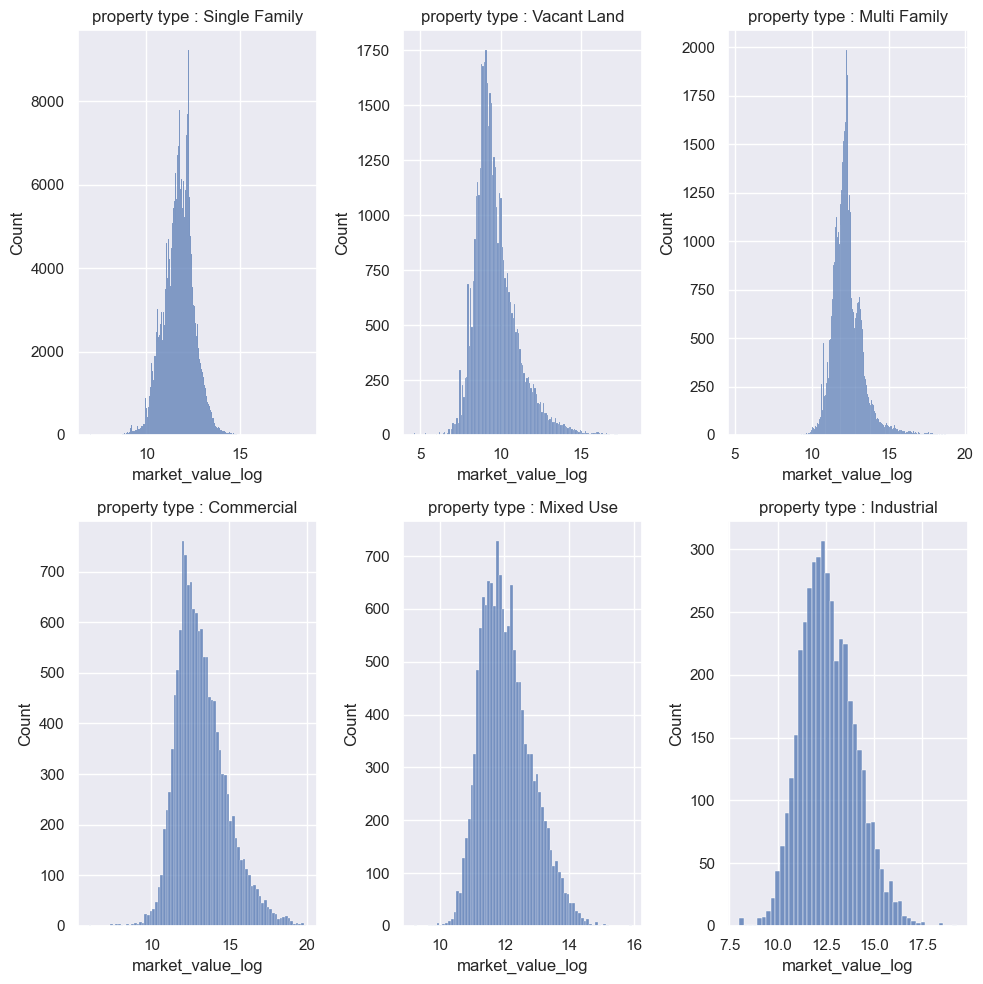

In [10]:
fig, axes = plt.subplots(2,3, figsize=(10,10))

for ax, cat in zip(axes.flatten(), df_initial['category_code_description'].unique()):
    ax.set_title(f"property type : {cat}")
    sns.histplot(ax=ax, x=np.log(df_initial[df_initial['category_code_description']==cat]['market_value']))
    ax.set_xlabel('market_value_log')

fig.tight_layout()

Selanjutnya untuk bahan analisis kita akan liat tipe properti Residentials/Single Family

In [11]:
df_res = df_initial[df_initial['category_code_description']=="Single Family"]

In [12]:
# Cek info lebih detail untuk setiap fitur untuk kategori residentials/SIngle Family
listItem = []

for col in df_res.columns:
    listItem.append([col, df_res[col].dtype, df_res[col].isna().sum()*100/len(df_res), round((df_res[col].isna().sum()/len(df_res[col]))*100, 2),
                    df_res[col].nunique(), list(df_res[col].drop_duplicates().sample(1).values)])

df_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)

df_desc = df_desc.sort_values(by='null', ascending=False)
df_desc

dataFeatures dataType       null  nullPct  unique  \
30                    owner_2   object  62.853546    62.85  136357   
9             geographic_ward  float64   1.326767     1.33      66   
25                  view_type   object   0.259331     0.26       8   
11         interior_condition  float64   0.026648     0.03       8   
31                 state_code  float64   0.011266     0.01       3   
5          exterior_condition  float64   0.006500     0.01       8   
18                  sale_date   object   0.005200     0.01   22074   
28                     zoning   object   0.003466     0.00      35   
14        number_of_bathrooms  float64   0.000433     0.00      16   
26                 year_built   object   0.000433     0.00     299   
24         total_livable_area  float64   0.000433     0.00    5148   
17             number_stories  float64   0.000433     0.00      57   
15         number_of_bedrooms  float64   0.000433     0.00      22   
16            number_of_rooms  float64   0.000433     0.00      33   
8               garage_spaces  float64   0.000433     0.00      30   
6                  fireplaces  float64   0.000433     0.00       7   
23                 total_area  float64   0.000217     0.00   77938   
7                    frontage  float64   0.000217     0.00    8054   
4                       depth  float64   0.000217     0.00   15665   
2               category_code    int64   0.000000     0.00       1   
29                    owner_1   object   0.000000     0.00  375511   
3   category_code_description   object   0.000000     0.00       1   
27                   zip_code   object   0.000000     0.00   37308   
13               market_value  float64   0.000000     0.00   10859   
12                   location   object   0.000000     0.00  429407   
22                street_name   object   0.000000     0.00    2489   
21         street_designation   object   0.000000     0.00      23   
20                street_code    int64   0.000000     0.00    3197   
19                 sale_price  float64   0.000000     0.00   18272   
10            house_extension    int64   0.000000     0.00      99   
1   building_code_description   object   0.000000     0.00     283   
0               building_code   object   0.000000     0.00     283   

                   uniqueSample  
30  [WESTFIELD DONNA MARIE    ]  
9                        [65.0]  
25                          [A]  
11                        [nan]  
31                        [nan]  
5                         [7.0]  
18        [2010-05-13 00:00:00]  
28                      [RSD2 ]  
14                       [11.0]  
26                     [1817.0]  
24                     [3985.0]  
17                        [1.0]  
15                        [2.0]  
16                       [15.0]  
8                         [7.0]  
6                         [nan]  
23                    [4028.47]  
7                      [169.49]  
4                      [198.67]  
2                           [1]  
29  [MCCANN MICHAEL J         ]  
3               [Single Family]  
27                  [191143616]  
13                   [502000.0]  
12              [887 N 27TH ST]  
22                   [NEHEMIAH]  
21                        [PL ]  
20                      [73220]  
19                   [410380.0]  
10                         [96]  
1   [DET 2.5 STY MASONRY+OTHER]  
0                       [593  ]

### 2. Distribusi `market_value` (target)

In [13]:
df_res.describe().T

count           mean           std      min       25%  \
category_code        461573.0       1.000000  0.000000e+00      1.0      1.00   
depth                461572.0      77.814959  2.578914e+02      0.0     56.00   
exterior_condition   461543.0       3.860169  7.249635e-01      0.0      4.00   
fireplaces           461571.0       0.039038  2.585353e-01      0.0      0.00   
frontage             461572.0     956.599658  6.359019e+05      0.0     14.83   
garage_spaces        461571.0       0.381792  6.757479e-01      0.0      0.00   
geographic_ward      455449.0      35.154685  1.930317e+01      1.0     19.00   
house_extension      461573.0       0.813717  5.385030e+00      0.0      0.00   
interior_condition   461450.0       3.857423  7.291318e-01      0.0      4.00   
market_value         461573.0  173642.821721  2.608471e+05      0.0  74500.00   
number_of_bathrooms  461571.0       0.893065  6.033500e-01      0.0      1.00   
number_of_bedrooms   461571.0       2.396286  1.383677e+00      0.0      2.00   
number_of_rooms      461571.0       4.565261  2.738112e+00      0.0      2.00   
number_stories       461571.0       1.737525  1.537403e+00      0.0      2.00   
sale_price           461573.0  301469.458116  1.220165e+07      0.0      1.00   
street_code          461573.0   53502.566732  2.439352e+04  11020.0  31680.00   
total_area           461572.0    1926.258430  4.940645e+03      0.0    848.96   
total_livable_area   461571.0    1336.204679  5.687214e+02      0.0   1056.00   
state_code           461521.0    1012.285398  1.980702e+02   1001.0   1001.00   

                          50%        75%          max  
category_code             1.0       1.00          1.0  
depth                    75.0     100.00     120883.0  
exterior_condition        4.0       4.00          7.0  
fireplaces                0.0       0.00         10.0  
frontage                 16.0      19.91  432026008.0  
garage_spaces             0.0       1.00         72.0  
geographic_ward          36.0      52.00         66.0  
house_extension           0.0       0.00         99.0  
interior_condition        4.0       4.00          7.0  
market_value         130000.0  209600.00  117456100.0  
number_of_bathrooms       1.0       1.00         25.0  
number_of_bedrooms        3.0       3.00         52.0  
number_of_rooms           6.0       6.00         87.0  
number_stories            2.0       2.00         56.0  
sale_price            46000.0  137800.00  948729100.0  
street_code           54200.0   75480.00      89750.0  
total_area             1230.0    1863.57    1591700.0  
total_livable_area     1216.0    1472.00      40628.0  
state_code             1001.0    1001.00       9904.0

<AxesSubplot: title={'center': '(> 1M USD)'}, xlabel='market_value', ylabel='Count'>

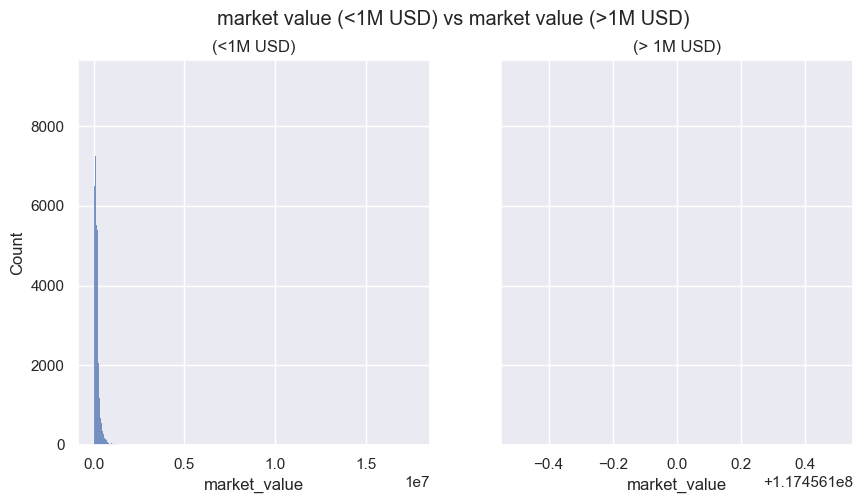

In [14]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10,5))
fig.suptitle('market value (<1M USD) vs market value (>1M USD)')
axes[0].set_title('(<1M USD)')
axes[1].set_title('(> 1M USD)')


#registered
sns.histplot(ax=axes[0], x=df_res[df_res['market_value']<=20000000]['market_value'])
sns.histplot(ax=axes[1], x=df_res[df_res['market_value']>20000000]['market_value'], color='orange')

<AxesSubplot: xlabel='market_value', ylabel='Count'>

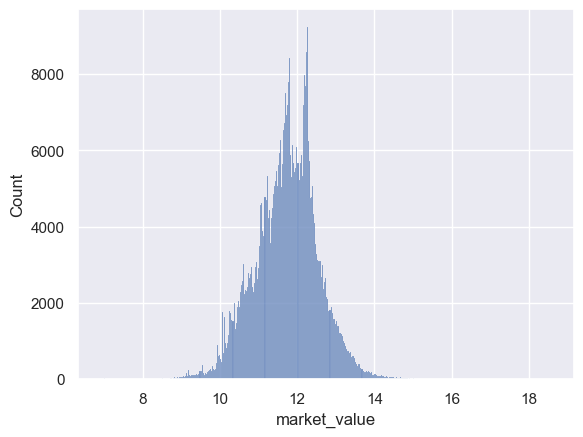

In [15]:
#market_value dalam skala logaritmik
sns.histplot(np.log(df_res['market_value']))

In [16]:
df_res[['market_value']].sort_values(by='market_value', ascending=False)

market_value
128027   117456100.0
570654    17680000.0
563071    13596500.0
558190    12460900.0
559446    10800000.0
...              ...
561136        1100.0
560928        1100.0
580401        1000.0
9425             0.0
159298           0.0

[461573 rows x 1 columns]

Text(0.5, 1.0, 'Market Value distribution (boxplot)')

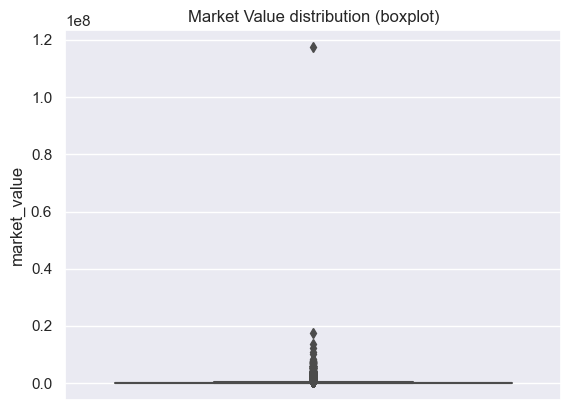

In [17]:
#cek outlier yg ekstrim
plt.figure()
sns.boxplot(y=df_res['market_value'])
plt.title("Market Value distribution (boxplot)")

Text(0.5, 1.0, 'Market Value distribution (boxplot) in logaritmic scale')

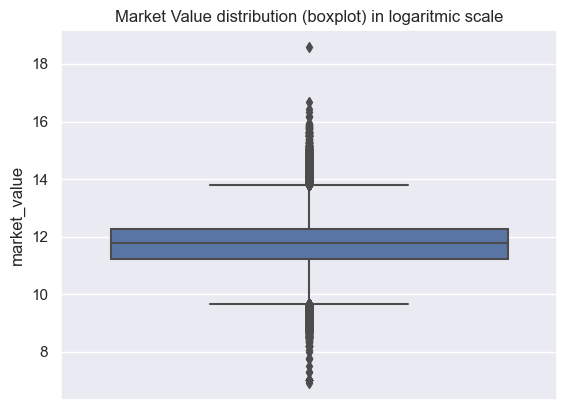

In [18]:
#market_value dalam skala logaritmik
plt.figure()
sns.boxplot(y=np.log(df_res['market_value']))
plt.title("Market Value distribution (boxplot) in logaritmic scale")

In [19]:
# di atas 20 juta dollar --> outlier ekstrim
df_res[df_res['market_value']>20000000][['market_value']]

market_value
128027   117456100.0

Text(0.5, 1.0, 'Market Value distribution (boxplot)')

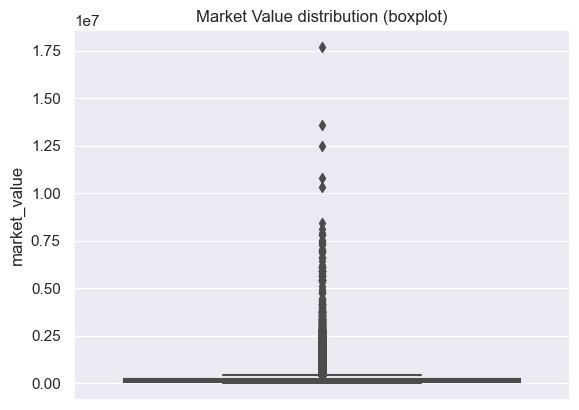

In [20]:
#coba kita drop
df_res = df_res[df_res['market_value']<20000000]

#cek sebaran market value, setelah outlier di drop
plt.figure()
sns.boxplot(y=df_res['market_value'])
plt.title("Market Value distribution (boxplot)")

In [21]:
df_res['market_value'].median()

130000.0

Dimana nilai median dari market_value properti dengan kategori "Single Family" (setelah outlier di hapus) : 130000 USD

Text(0.5, 1.0, 'Market Value distribution (boxplot) in logaritmic scale')

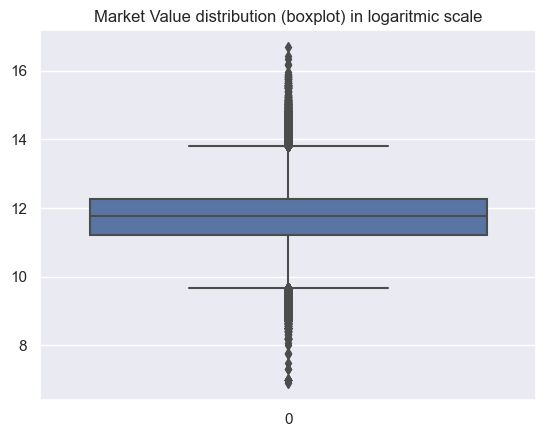

In [22]:
#market_value dalam skala logaritmik seteleah nilai di atas 20 juta USD di drop
plt.figure()
sns.boxplot(np.log(df_res['market_value']))
plt.title("Market Value distribution (boxplot) in logaritmic scale")

untuk analisis yang membutuhkan nilai log market value, kita buat kolom baru `market_value_log`


In [23]:
df_res['market_value_log'] = np.log(df_res['market_value'])

### 3. Nilai market properti berdasarkan kondisi rumah (interior dan exterior)

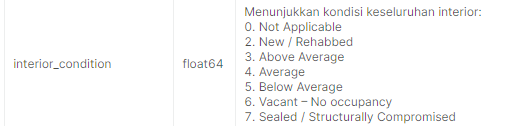

i. `interior_condition`

Text(0.5, 1.0, 'interior_condition distribution')

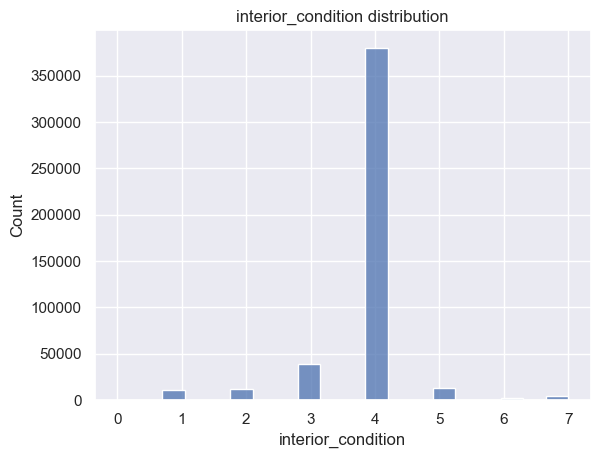

In [24]:
plt.figure()
sns.histplot(x=df_res['interior_condition'])
plt.title('interior_condition distribution')

Sebaran nya tidak seimbang, dimana kondisi average (kategori 4) paling banyak di antara yang lainnya. 

Perlu dicatat, bahwa interior_condition ini merupakan data ordinal, tapi ranknya terbalik --> makin tinggi angkanya makin jelek kondisinya

<AxesSubplot: xlabel='interior_condition', ylabel='market_value'>

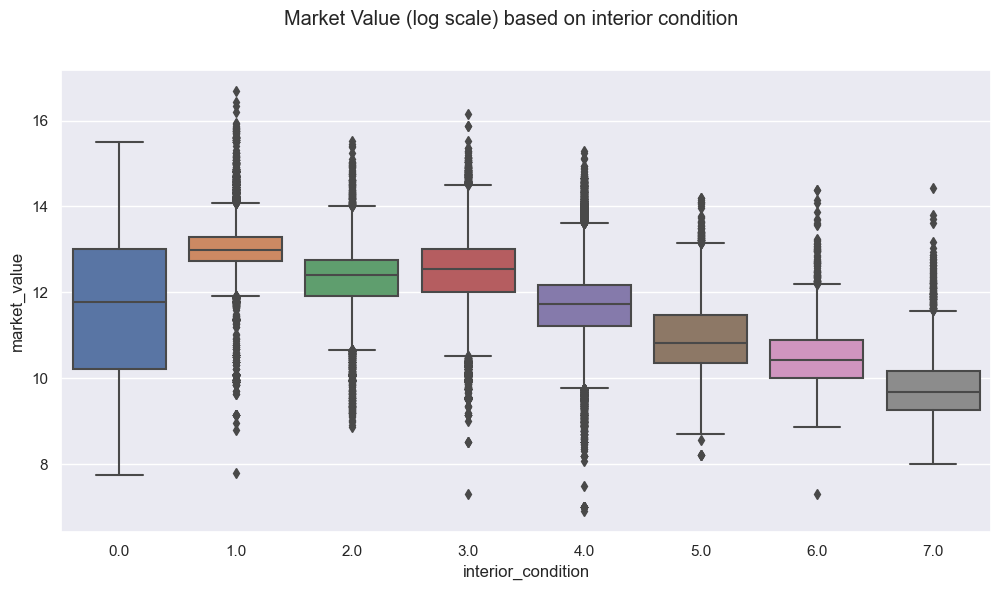

In [25]:
fig = plt.figure(figsize=(12,6))
fig.suptitle("Market Value (log scale) based on interior condition")
sns.boxplot(x=df_res['interior_condition'], y=np.log(df_res['market_value']))

In [26]:
df_res.groupby(['interior_condition'])['market_value'].mean()

interior_condition
0.0    448489.140271
1.0    549354.689219
2.0    286690.018438
3.0    355891.809450
4.0    145838.101403
5.0     79620.436010
6.0     54980.784487
7.0     27217.333623
Name: market_value, dtype: float64

ii. `exterior_condition`

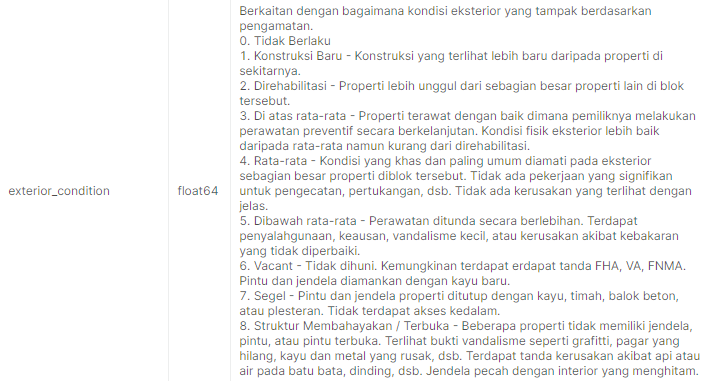

Text(0.5, 1.0, 'exterior_condition distribution')

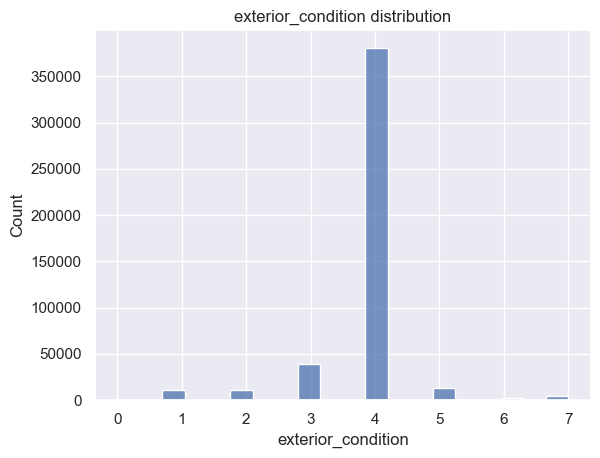

In [27]:
plt.figure()
sns.histplot(x=df_res['exterior_condition'])
plt.title('exterior_condition distribution')

Sebaran nya tidak seimbang, dimana kondisi average (kategori 4) paling banyak di antara yang lainnya. Jika kita lihat sebaran nya mirip dengan kondisi interior rumah

<AxesSubplot: xlabel='exterior_condition', ylabel='market_value'>

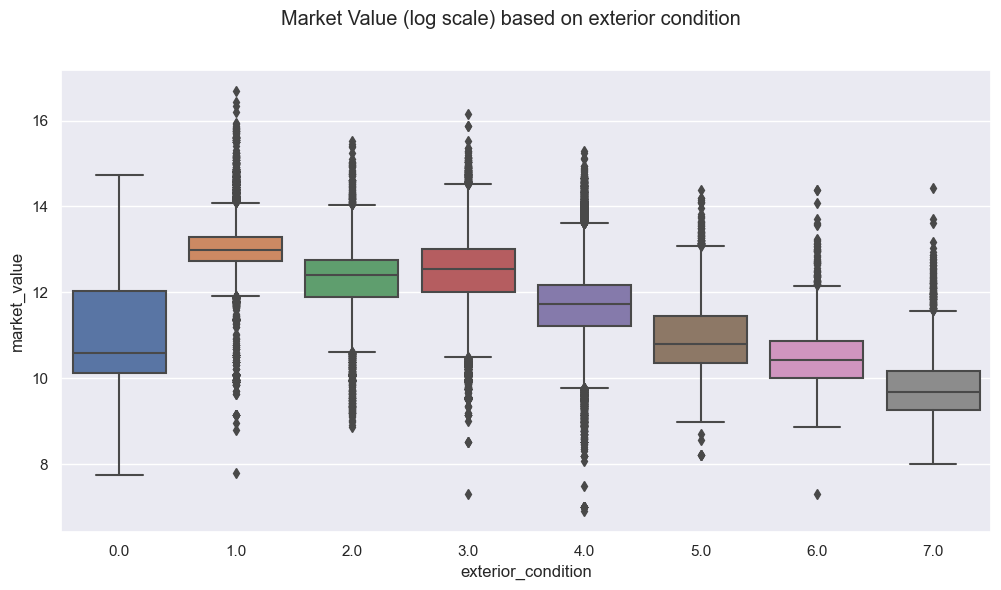

In [28]:
fig = plt.figure(figsize=(12,6))
fig.suptitle("Market Value (log scale) based on exterior condition")
sns.boxplot(x=df_res['exterior_condition'], y=np.log(df_res['market_value']))

mari kita cek, nilai interior dan exterion dengan kondisi yang sama

In [29]:
display(df_res[(df_res['interior_condition'] == df_res['exterior_condition'])][['interior_condition', 'exterior_condition']])


interior_condition  exterior_condition
0                      5.0                 5.0
1                      2.0                 2.0
2                      4.0                 4.0
3                      4.0                 4.0
4                      4.0                 4.0
...                    ...                 ...
581451                 4.0                 4.0
581452                 4.0                 4.0
581453                 4.0                 4.0
581454                 4.0                 4.0
581455                 4.0                 4.0

[456212 rows x 2 columns]

In [30]:
456212/len(df_res)

0.9883875105075698

kebanyakan kondisi interior dan eksterior properti memiliki nilai/kategori yang sama (461.572 baris atau 98.8% dari total baris)

In [31]:
display(df_res[(df_res['interior_condition'] != df_res['exterior_condition'])][['interior_condition', 'exterior_condition']])
print("nilai missing value pada kedua kolom interior dan exterior")
df_res[(df_res['interior_condition'] != df_res['exterior_condition'])][['interior_condition', 'exterior_condition']].isnull().sum()

interior_condition  exterior_condition
265                    4.0                 3.0
464                    4.0                 3.0
910                    5.0                 4.0
1046                   4.0                 3.0
1204                   4.0                 3.0
...                    ...                 ...
581002                 6.0                 4.0
581003                 6.0                 4.0
581004                 6.0                 4.0
581005                 6.0                 4.0
581149                 3.0                 4.0

[5360 rows x 2 columns]

nilai missing value pada kedua kolom interior dan exterior


interior_condition    123
exterior_condition     30
dtype: int64

Kita bisa buat fitur baru, kombinasi dari keduanya yaitu "overall_condition"

- Jika interior dan exteriornya maka nilai "overall_condition" = interior = exterior
- Jika interior dan exterior memiliki nilai yang berbeda, maka ambil saja rata-rata nya
- Hapus Jika kedua nilai kosong
- Jika salah satu kosong, pakai aja overall condition = nilai yg ga kosong

### 4. Nilai market properti berdasarkan `view_type`

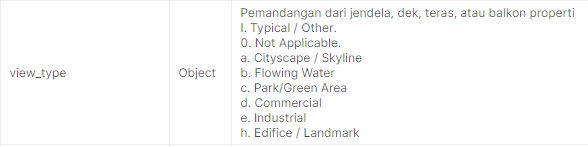

In [32]:
df_res['view_type'].value_counts()

I    428292
A     13894
C      7171
0      2965
H      2443
D      2091
E      1780
B      1739
Name: view_type, dtype: int64

<AxesSubplot: xlabel='view_type', ylabel='Count'>

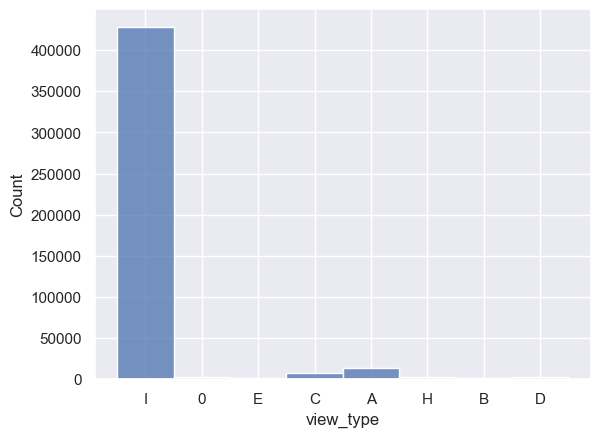

In [33]:
sns.histplot(df_res['view_type'])

sebaran fitur/kolom `view_type` sangat tidak seimbang, kemungkinan kita drop saja

<AxesSubplot: xlabel='view_type', ylabel='market_value'>

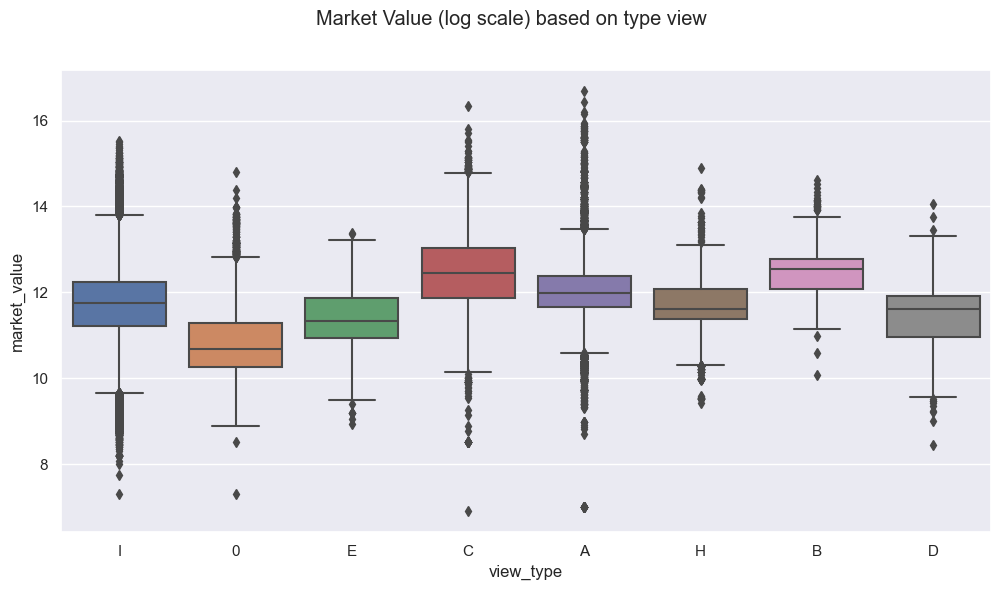

In [34]:
fig = plt.figure(figsize=(12,6))
fig.suptitle("Market Value (log scale) based on type view")
sns.boxplot(x=df_res['view_type'], y=np.log(df_res['market_value']))

Ada dua cara :

1. Kita buat dua kategori view type yaitu kategori I dan non-I
2. Tapi sepertinya ga balance, jadi kemungkinan kita drop saja

### 5. Nilai market properti berdasarkan data lokasi/geografis (`street_name`, `zoning`, `state_code`, `street_designation`, `zip_code`,`street_code`, `building_code`, `building_code_description`, `location`, `geographic_ward`)

#### i. `street_name`

In [35]:
street_df = df_res.groupby(['street_name']).size().reset_index(name='count').sort_values(by='count', ascending=False)
street_df

street_name  count
1377      LOCUST   2760
15          18TH   2247
4           06TH   2243
0           02ND   2019
6           08TH   1885
...          ...    ...
339      BREWERY      1
316       BOLTON      1
177    ARMSTRONG      1
1877       RAUCH      1
788    ERDENHEIM      1

[2489 rows x 2 columns]

In [36]:
street_mean_df = df_res.groupby(['street_name'])['market_value'].median().reset_index(name='market_value_median').sort_values(by='market_value_median', ascending=False)
street_mean_df

street_name  market_value_median
1198  JOHN F KENNEDY            2500000.0
2418        WILLINGS            1540600.0
2133       ST PETERS            1530300.0
2248         TOWANDA            1453000.0
2354        WATERMAN            1270500.0
...              ...                  ...
1206            JUNE              21000.0
339          BREWERY              18500.0
1968             ROY              16900.0
1528          MERION              16900.0
219           BAKERS              15100.0

[2489 rows x 2 columns]

In [37]:
temp_df = street_df.merge(street_mean_df, how='inner').sort_values(by='market_value_median', ascending=False)
temp_df

street_name  count  market_value_median
2481  JOHN F KENNEDY      1            2500000.0
2450        WILLINGS      3            1540600.0
2461       ST PETERS      2            1530300.0
2282         TOWANDA     11            1453000.0
2285        WATERMAN     10            1270500.0
...              ...    ...                  ...
2050            JUNE     20              21000.0
2484         BREWERY      1              18500.0
2357             ROY      7              16900.0
1324          MERION     72              16900.0
2479          BAKERS      1              15100.0

[2489 rows x 3 columns]

Text(0.5, 1.0, 'The market value (median) refers to the number of properties counted based on their respective street names.')

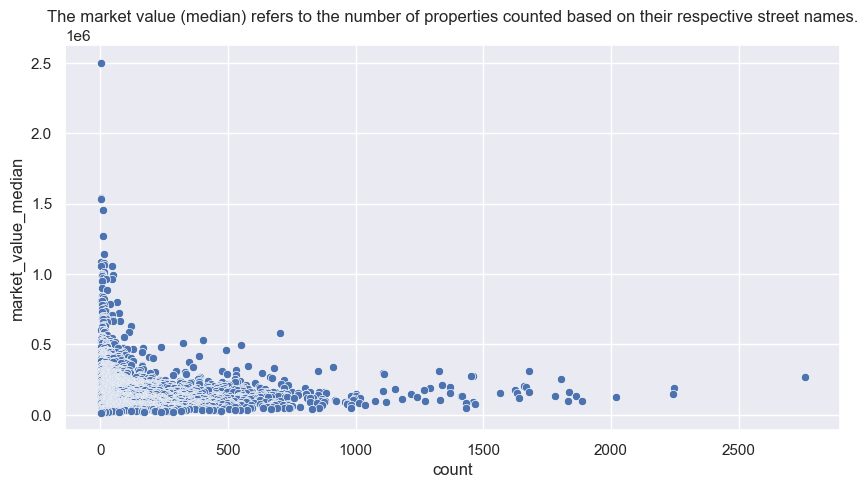

In [38]:
plt.figure(figsize=(10,5))
sns.scatterplot(temp_df, x='count', y='market_value_median')
plt.title('The market value (median) refers to the number of properties counted based on their respective street names.')

- Jumlah properti terbanyak ada di jalan "LOCUST" dengan jumlah 2760 rumah/properti dengan nilai median market value nya 268k USD
- Jika dilihat nilai median market properti yang di atas 1 juta USD tersebar di jalan/street dengan jumlah properti kurang dari 51 rumah
- Hanya ada 1 rumah di jalan JOHN F.KENNEDY dan memiliki nilai market yang paling tinggi yaitu mencapai 2,5juta USD

#### ii. `zoning`

untuk kode zonasi properti di philadelpia bisa diunduh pada laman berikut : 
[https://www.phila.gov/media/20220909084529/ZONING-QUICK-GUIDE_PCPC_9_9_22.pdf]

![zoning ](assets/zoning.PNG)

In [39]:
display(df_res['zoning'].value_counts().reset_index(name='count'))

index   count
0   RSA5   250786
1   RM1     80731
2   RSA3    52386
3   RSD3    12462
4   RSA2    11694
5   RSA4    11239
6   CMX2     5593
7   RM2      5022
8   CMX3     4907
9   CMX5     3790
10  RM4      3471
11  RSD1     2936
12  CMX4     2523
13  RMX3     2110
14  RTA1     1929
15  I2       1402
16  RMX1     1249
17  RSD2     1205
18  RM3      1184
19  RSA1     1124
20  CMX1     1088
21  ICMX      956
22  CMX25     651
23  IRMX      309
24  RMX2      190
25  I1        180
26  CA2       143
27  CA1       102
28  I3         65
29  SPINS      54
30  SPPOA      45
31  CMX2.      14
32  12         12
33  RSA         3
34  IP          1

In [40]:
df_res['zoning'].value_counts().reset_index(name='count').iloc[0,0]

'RSA5 '

format penulisan nya masih ada yang kurang tepat
- ada whitespace/spasi pada beberapa kategori, contoh "RSA5 " 
- pada kategori CMX2. harusnya CMX2
- sepertinya kategori "12" harusnya "I2" 
- CMX25 tidak ada pada list kode zoning di philadelpia (lihat pdf) apa mungkin maksdnya CMX2 atau CMX5?

In [41]:
df_res['zoning'] = df_res['zoning'].str.extract(r"(\s*[^0-9+\s*]+)", expand=True)

In [42]:
display(df_res[['zoning']].value_counts().reset_index(name='count'))

zoning   count
0     RSA  327232
1      RM   90408
2     CMX   18566
3     RSD   16603
4     RMX    3549
5     RTA    1929
6       I    1647
7    ICMX     956
8    IRMX     309
9      CA     245
10  SPINS      54
11  SPPOA      45
12     IP       1

In [43]:
df_res.groupby(['zoning'])[['market_value']].mean().reset_index().sort_values(by='market_value', ascending=False)

zoning   market_value
4      IP  739900.000000
7     RMX  390532.741617
1     CMX  342004.106970
9     RSD  340881.786424
3    ICMX  325528.974895
11  SPINS  306364.814815
5    IRMX  286012.297735
10    RTA  208208.449974
12  SPPOA  178860.000000
8     RSA  158810.534728
2       I  155240.619308
6      RM  149755.183170
0      CA  136537.142857

- single-family house : "RSD", "RSA"
- multi-family house : "RTA", "RM"
- commercial or industrial : "CMX", "RMX", "CA", "IRMX", "ICMX", "I", "IP" (tapi sepertinya IP kita exclude/drop saja jumlahnya hanya 1)
- pecial-purpose : "SPINS", "SPPOA" (ini juga sepertinya nanti kita gabung aja ke commercial or industrial)

In [44]:
df_res.loc[df_res['zoning'].isin(["RSD", "RSA"]), 'zoning'] = 'single-family-house'
df_res.loc[df_res['zoning'].isin(["RTA", "RM"]), 'zoning'] = 'multi-family-house'
df_res.loc[df_res['zoning'].isin(["CMX", "RMX", "CA", "IRMX", "ICMX", "I", "IP","SPINS", "SPPOA"]), 'zoning'] = 'commercial-industrial-specialpurpose'


<AxesSubplot: xlabel='zoning', ylabel='market_value_log'>

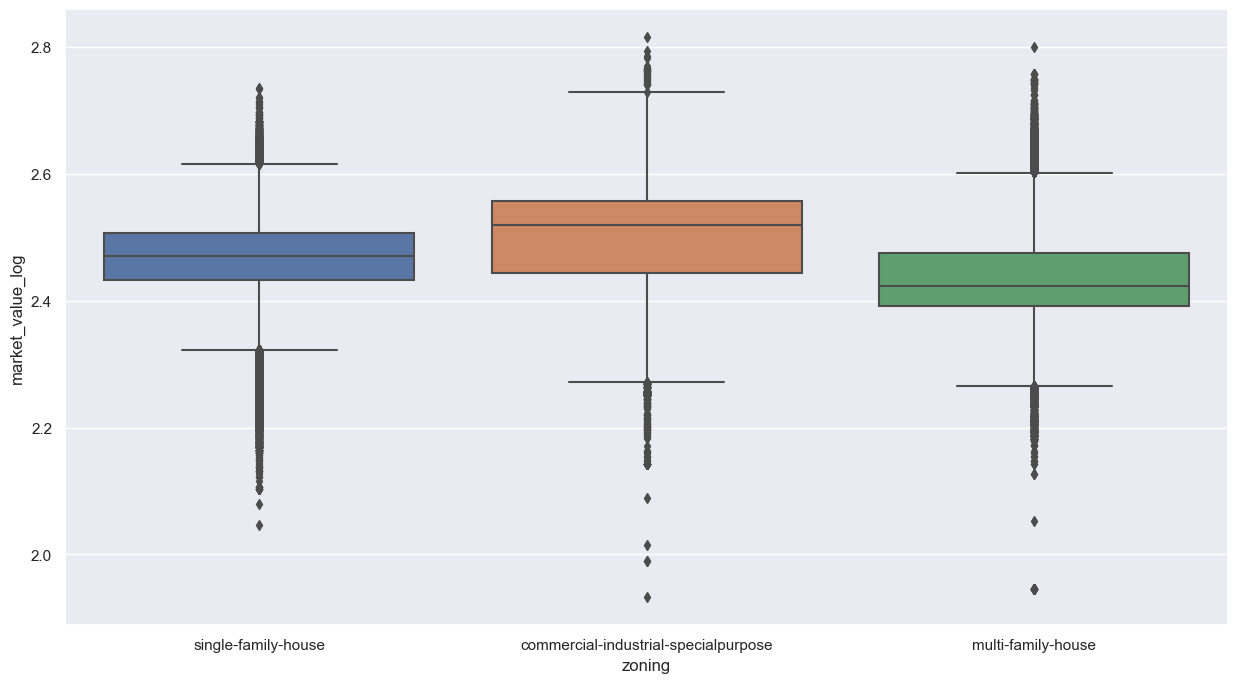

In [45]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df_res['zoning'], y=np.log(df_res['market_value_log']))

#### iii. `state_code`

In [46]:
df_res['state_code'].value_counts()

1001.0    460004
4404.0      1507
9904.0         9
Name: state_code, dtype: int64

- tidak ada informasi maksud dari angka tersebut, kalaupun nama daerah atau negara bagian harusnya 3 angka
- selain itu, kolom ini juga sangat tidak seimbang, kemungkinan kita drop saja
- tapi bisa juga kita hanya gunakan satu state saja yaitu 1001 --> limitasi model

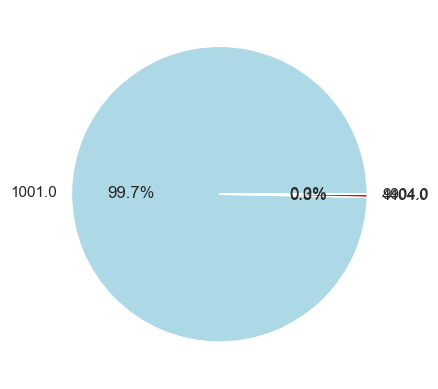

In [47]:
plt.pie(df_res.state_code.value_counts(),
		labels=df_res.state_code.value_counts().index,
		autopct='%.1f%%',
        colors=['lightblue', 'red', 'silver'])
plt.show()

Tidak ada informasi yang kami dapatkan dari angka tersebut, kalaupun nama daerah atau negara bagian seharusnya terdiri dari 3 angka saja. Persebaran datanya pun sangat tidak seimbang dengan kode 1001 mendominasi sampai 99.7%, maka kemungkinan kami akan menghapus fitur ini. Fakta ini dapat menjadi limitasi model, dengan batasan bahwa data yang dapat diprediksi model adalah properti dengan `state_code` 10001 saja.

#### iv. `street_designation`

In [48]:
df_res['street_designation'].value_counts(dropna=False)

ST     342609
AVE     64030
RD      27375
LA       7384
DR       5318
PL       5229
SQ       2347
BLV      1978
TER      1255
CT       1089
WAY       994
CIR       728
PK        486
PKY       321
LN         98
PLZ        90
MEW        86
ALY        58
WLK        55
HTS        22
PTH        15
ROW         4
ML          1
Name: street_designation, dtype: int64

<AxesSubplot: xlabel='street_designation', ylabel='market_value_log'>

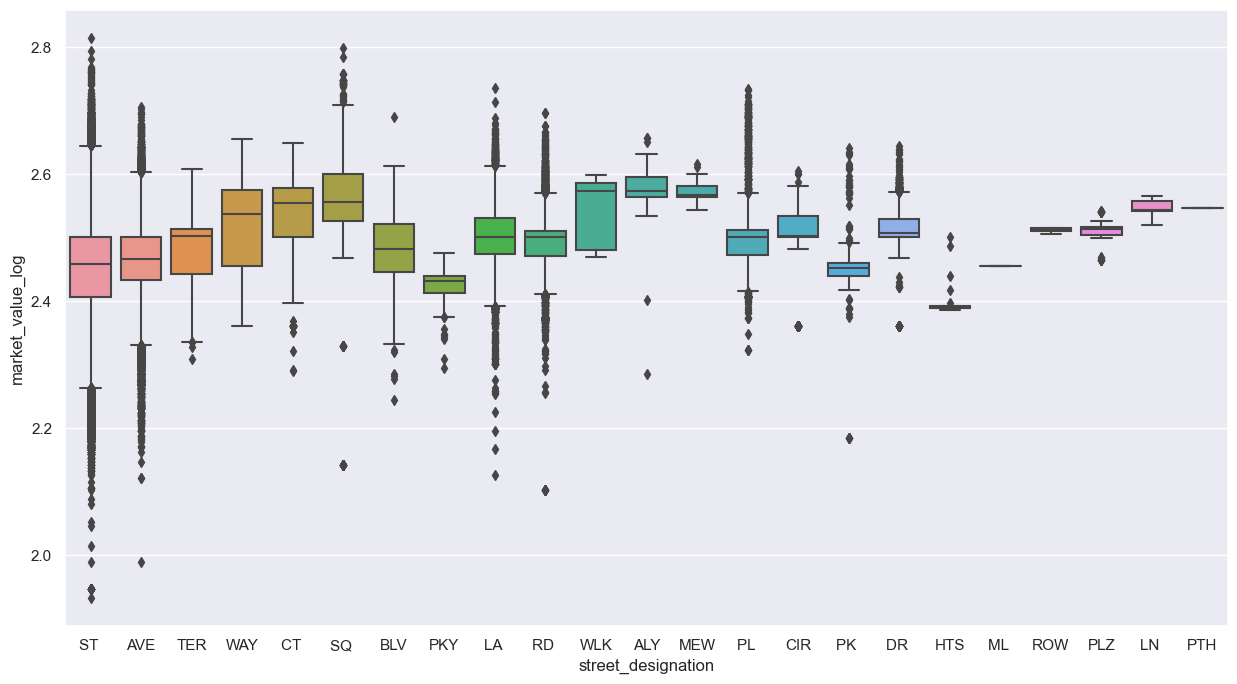

In [49]:
plt.figure(figsize=(15,8))
sns.boxplot(df_res, x=df_res['street_designation'], y=np.log(df_res['market_value_log']))

street_designation   count           mean
0                 ALY      58  568920.689655
1                 AVE   64030  161579.778229
2                 BLV    1978  214384.428716
3                 CIR     728  233047.939560
4                 CT     1089  395893.572084
5                 DR     5318  251869.405792
6                 HTS      22   69081.818182
7                 LA     7384  245329.550379
8                 LN       98  351615.306122
9                 MEW      86  500362.790698
10                ML        1  115100.000000
11                PK      486  143075.102881
12                PKY     321   84429.283489
13                PL     5229  260911.703959
14                PLZ      90  226955.555556
15                PTH      15  349900.000000
16                RD    27375  201576.701370
17                ROW       4  226950.000000
18                SQ     2347  686430.379207
19                ST   342609  164014.158560
20                TER    1255  201578.486056
21                WAY     994  316542.555332
22                WLK      55  371298.181818

<AxesSubplot: xlabel='street_designation', ylabel='mean'>

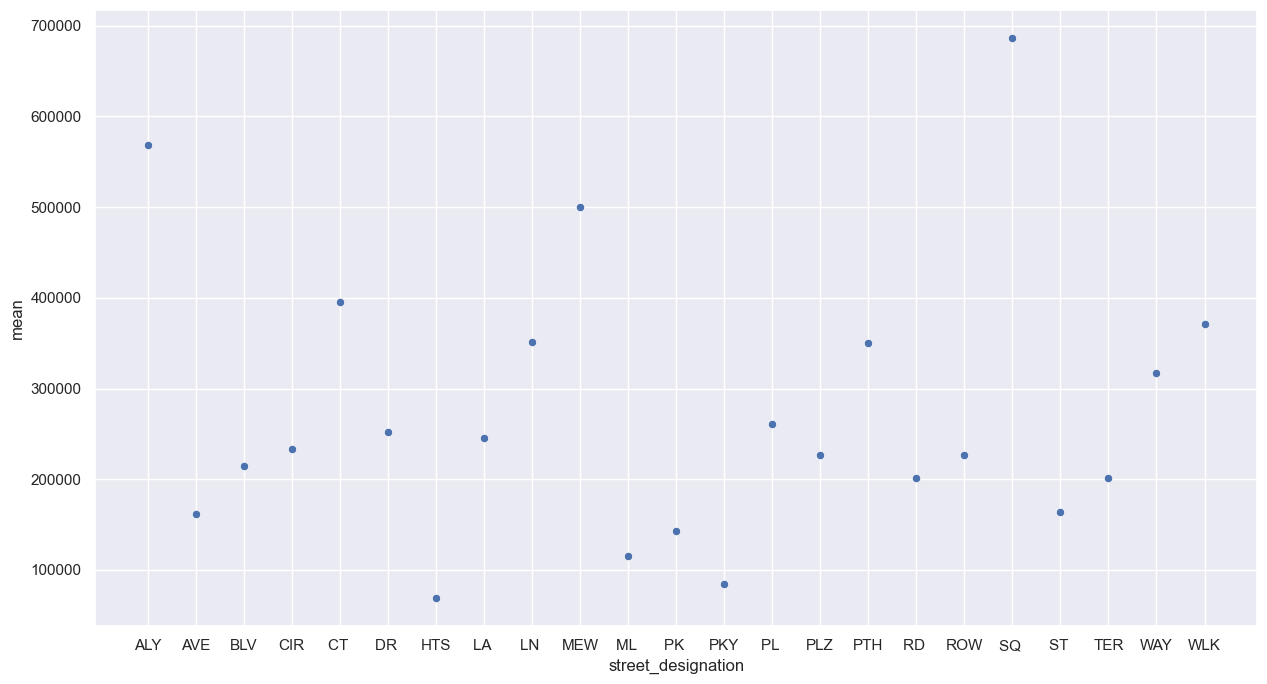

In [50]:
temp_df_2 = df_res.groupby(['street_designation'])['market_value'].agg(['count', 'mean']).reset_index()
display(temp_df_2)

plt.figure(figsize=(15,8))
sns.scatterplot(x=temp_df_2['street_designation'], y=temp_df_2['mean'])

In [51]:
display(temp_df_2[temp_df_2['mean']<200000])
print("total count", temp_df_2[temp_df_2['mean']<200000]['count'].sum())

street_designation   count           mean
1                 AVE   64030  161579.778229
6                 HTS      22   69081.818182
10                ML        1  115100.000000
11                PK      486  143075.102881
12                PKY     321   84429.283489
19                ST   342609  164014.158560

total count 407469


In [52]:
display(temp_df_2[temp_df_2['mean']>200000])
print("total count", temp_df_2[temp_df_2['mean']>200000]['count'].sum())

street_designation  count           mean
0                 ALY     58  568920.689655
2                 BLV   1978  214384.428716
3                 CIR    728  233047.939560
4                 CT    1089  395893.572084
5                 DR    5318  251869.405792
7                 LA    7384  245329.550379
8                 LN      98  351615.306122
9                 MEW     86  500362.790698
13                PL    5229  260911.703959
14                PLZ     90  226955.555556
15                PTH     15  349900.000000
16                RD   27375  201576.701370
17                ROW      4  226950.000000
18                SQ    2347  686430.379207
20                TER   1255  201578.486056
21                WAY    994  316542.555332
22                WLK     55  371298.181818

total count 54103


Kita drop saja, karena kekurangan informasi mengenai definisi dari setiap nilainya


#### iv. `zip_code`

In [53]:
df_res['zip_code'].value_counts()

191500000    2111
191380000    1823
191190000    1740
191200000    1649
191420000    1114
             ... 
191285234       1
191271211       1
191322900       1
191322912       1
191233310       1
Name: zip_code, Length: 37308, dtype: int64

In [54]:
list_zip = []
for idx in df_res.index :    
    list_zip.append(re.findall(r'^[0-9]{5}', str(df_res.loc[idx, 'zip_code']))[0])

In [55]:
df_res['zip_code_extract'] = list_zip

In [56]:
len(df_res['zip_code_extract'].unique())

48

- Ada 48 Kode Pos di Philadelphia, Pennsylvania [https://namecensus.com/zip-codes/pennsylvania/city/philadelphia/]
- Mungkin kita juga bisa buat fitur baru (luas area) dari link di atas

In [57]:
df_res[['zip_code_extract']].value_counts()

zip_code_extract
19143               20894
19134               20333
19124               18893
19120               18660
19148               18355
19140               16959
19146               16598
19149               16554
19145               16171
19111               15931
19132               14847
19147               12865
19139               12232
19128               11859
19131               11782
19138               11270
19154               10782
19135               10130
19125               10017
19144                9767
19136                9655
19151                9648
19142                9596
19115                9575
19152                9046
19121                9019
19114                8810
19119                8598
19116                8487
19130                8427
19150                8128
19141                7916
19133                7842
19103                6420
19106                5740
19104                5694
19122                4932
19123                

<AxesSubplot: xlabel='zip_code_extract', ylabel='Count'>

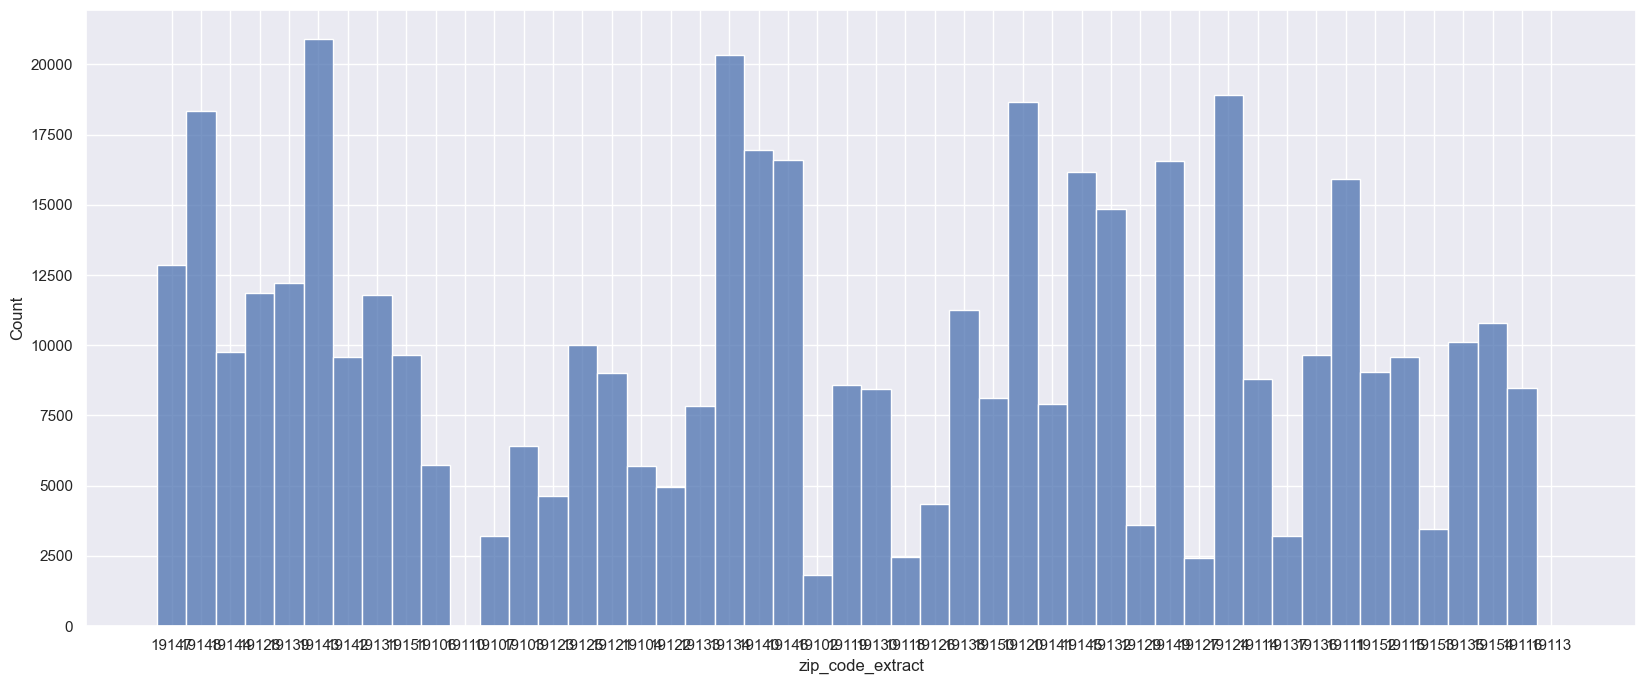

In [58]:
plt.figure(figsize=(20,8))
sns.histplot(df_res, x='zip_code_extract')

- sebaran fitur `zip_code_extract` terlihat cukup uniform, kecuali pada kode pos "19113" (hanya 2 properti) dan "19110" (hanya 1 properti)
- setelah kami cari [https://www.unitedstateszipcodes.org/19113/], kode pos 19113 merupakan pos daerah sekitar di Philadelpia International Airport

<AxesSubplot: xlabel='zip_code_extract', ylabel='market_value_log'>

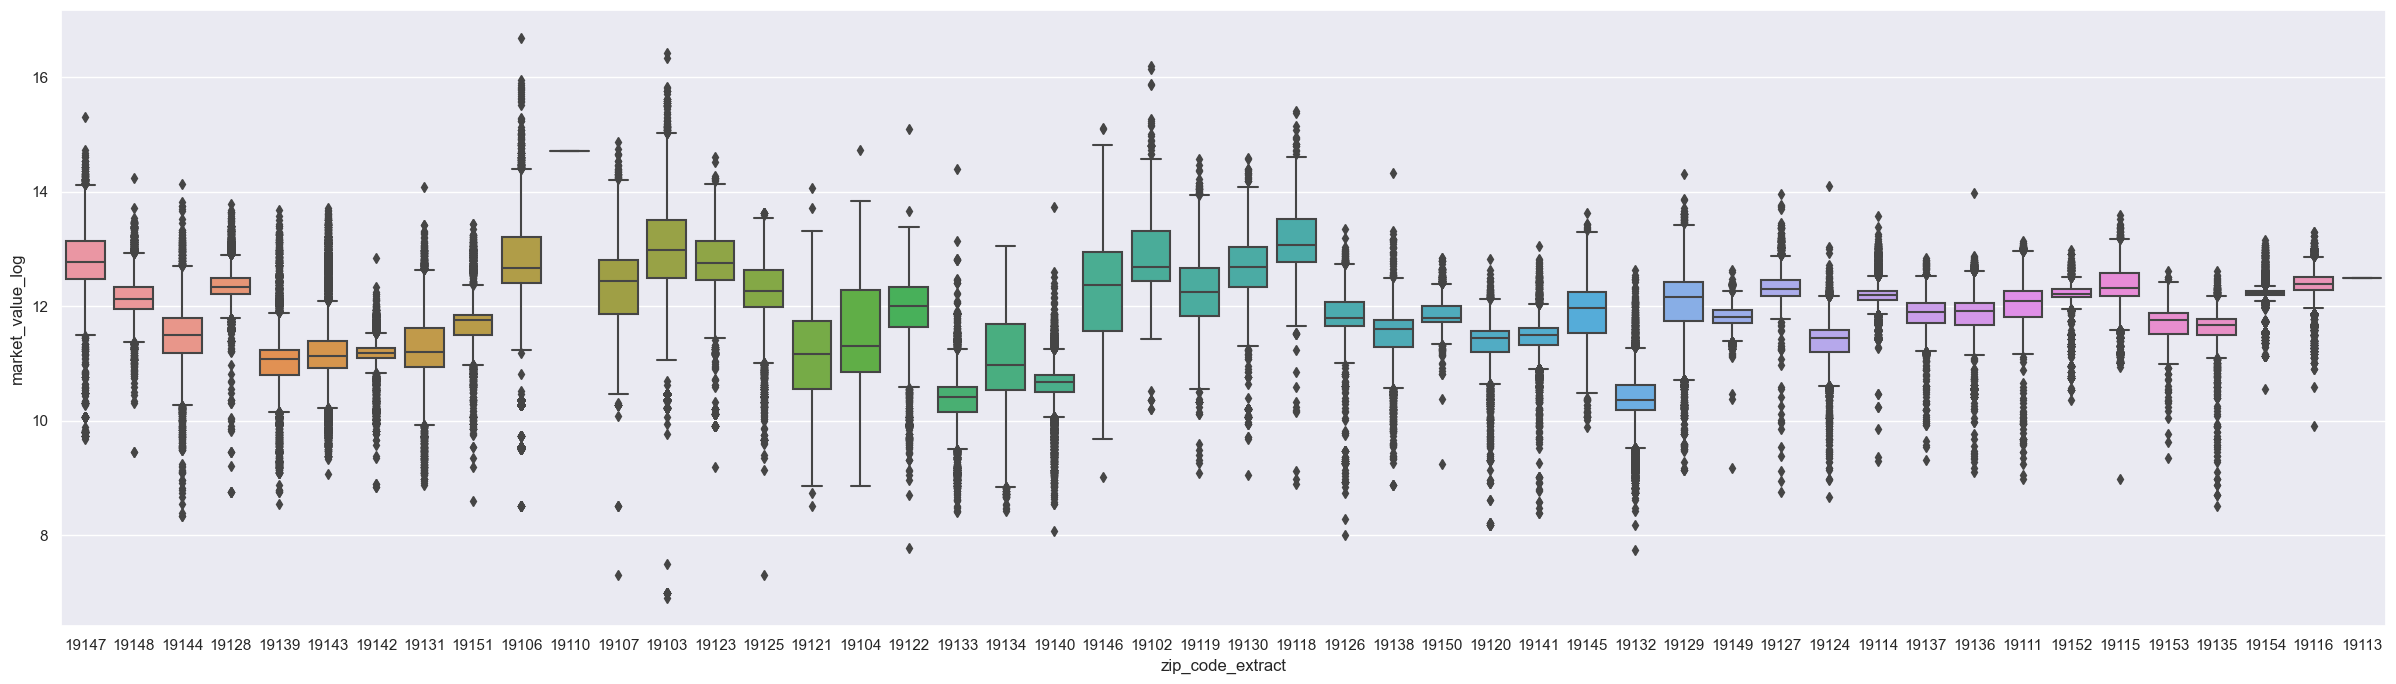

In [59]:
plt.figure(figsize=(30,8))
sns.boxplot(x=df_res['zip_code_extract'], y=df_res['market_value_log'])

#### v. `street_code`

In [60]:
len(df_res['street_code'].unique())

3197

In [61]:
len(df_res['street_name'].unique())

2489

In [62]:
a= df_res.groupby(['street_code', 'street_name']).size().reset_index(name='count')

a[a.duplicated(subset='street_name', keep=False)]

street_code  street_name  count
1           11060  ABBOTTSFORD      7
2           11080  ABBOTTSFORD    164
6           11160     ABINGTON     45
7           11180     ABINGTON     22
8           11185      ACADEMY    144
...           ...          ...    ...
3187        89540         77TH     11
3188        89550         78TH    149
3189        89570         78TH     61
3191        89610         80TH     15
3192        89630         80TH     41

[1287 rows x 3 columns]

Kita Drop kolom `street_code`, karena terlihat redundan dengan `street_name`

#### vi. `building_code` dan `building_code_description`

In [63]:
df_res[['building_code', 'building_code_description']].sample(20)

building_code  building_code_description
2176           O30            ROW 2 STY MASONRY
238460         O30            ROW 2 STY MASONRY
112810         R30      ROW B/GAR 2 STY MASONRY
41976          O30            ROW 2 STY MASONRY
249086         R30      ROW B/GAR 2 STY MASONRY
6287           O30            ROW 2 STY MASONRY
376764         R30      ROW B/GAR 2 STY MASONRY
256020         O30            ROW 2 STY MASONRY
391880         R30      ROW B/GAR 2 STY MASONRY
126569         K10    S/D W/B GAR 1 STY MASONRY
181804         O30            ROW 2 STY MASONRY
217379         O30            ROW 2 STY MASONRY
142043         O50            ROW 3 STY MASONRY
429952         P36        ROW W/GAR 2 STY FRAME
118388         O30            ROW 2 STY MASONRY
174735         O50            ROW 3 STY MASONRY
420384         K10    S/D W/B GAR 1 STY MASONRY
321632         O30            ROW 2 STY MASONRY
469157         R30      ROW B/GAR 2 STY MASONRY
104261         O50            ROW 3 STY MASONRY

sepertinya kedua fitur ini tidak relevan dijadikan fitur --> kita drop aja

#### viii. `location`

In [64]:
df_res['location']

0           108 WHARTON ST
1           110 WHARTON ST
2           112 WHARTON ST
3           114 WHARTON ST
4           116 WHARTON ST
                ...       
581451    237-47 S 18TH ST
581452    237-47 S 18TH ST
581453    237-47 S 18TH ST
581454    237-47 S 18TH ST
581455    237-47 S 18TH ST
Name: location, Length: 461572, dtype: object

sudah ada di kolom yang lain 

#### ix. `geographic_ward`

mari kita lihat distibusi dari fitur ini

<AxesSubplot: xlabel='geographic_ward', ylabel='Count'>

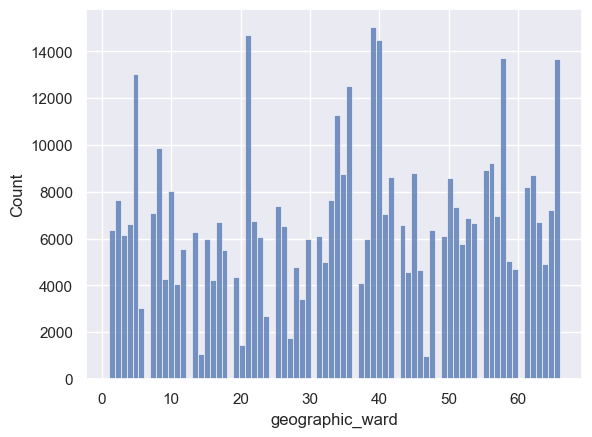

In [65]:
sns.histplot(df_res['geographic_ward'])

In [66]:
df_res.groupby(['geographic_ward']).size().reset_index(name='count').sort_values(by='count', ascending=True)

geographic_ward  count
46             47.0    997
13             14.0   1065
19             20.0   1452
26             27.0   1774
23             24.0   2686
..              ...    ...
65             66.0  13687
57             58.0  13706
39             40.0  14507
20             21.0  14685
38             39.0  15044

[66 rows x 2 columns]

sebaran nya cukup beragam (uniform) terlihat dari grafik dan tabel di atas

selanjutnya mari kita cek kaitannya dengan harga market properti

In [67]:
df_res.groupby(['geographic_ward'])['market_value'].median().reset_index(name='median')

geographic_ward    median
0               1.0  234800.0
1               2.0  376500.0
2               3.0   70100.0
3               4.0   63600.0
4               5.0  323600.0
..              ...       ...
61             62.0  104500.0
62             63.0  238100.0
63             64.0  173500.0
64             65.0  146100.0
65             66.0  206000.0

[66 rows x 2 columns]

<AxesSubplot: xlabel='geographic_ward', ylabel='median'>

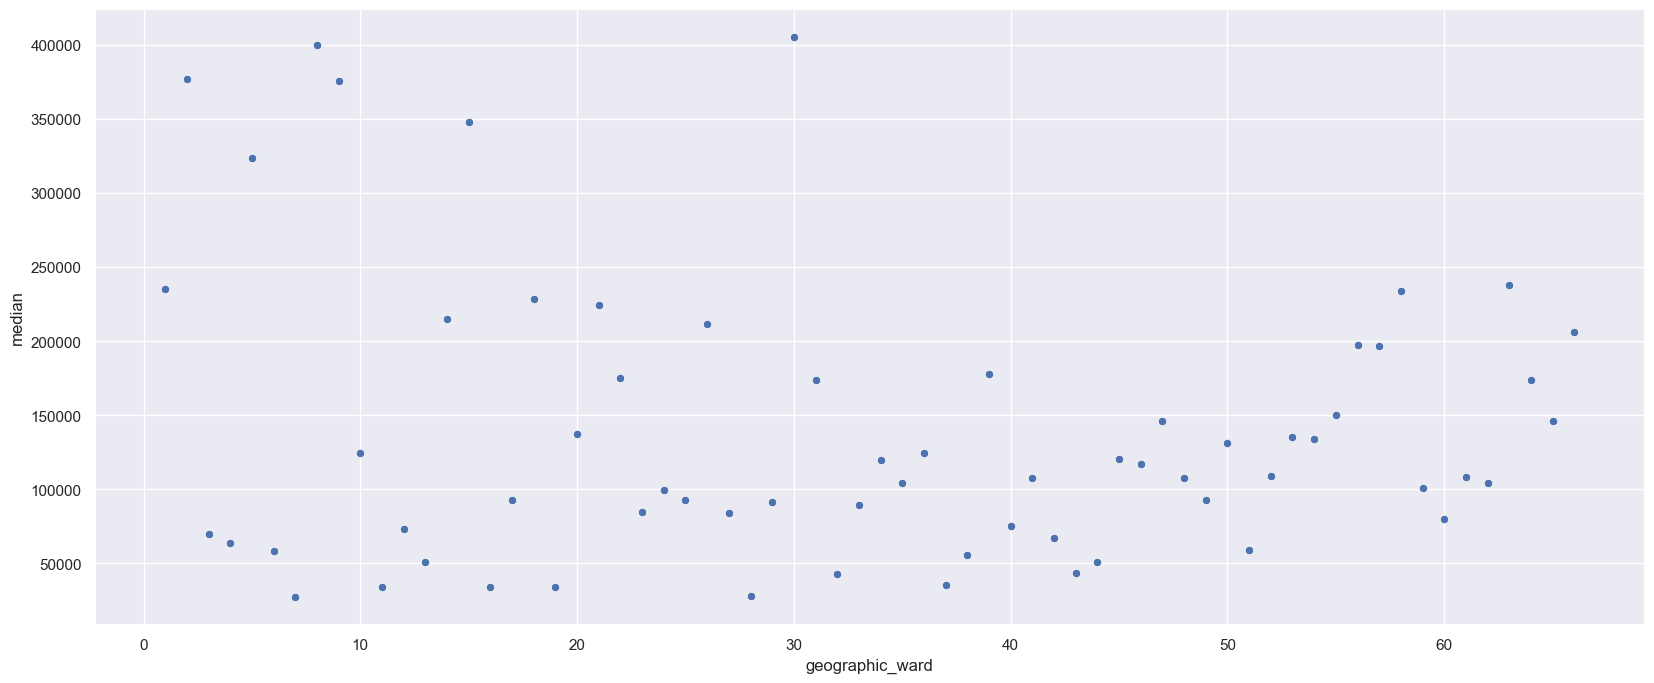

In [68]:
plt.figure(figsize=(20,8))
sns.scatterplot(df_res.groupby(['geographic_ward'])['market_value'].median().reset_index(name='median'), x='geographic_ward', y='median')

<AxesSubplot: xlabel='geographic_ward', ylabel='market_value_log'>

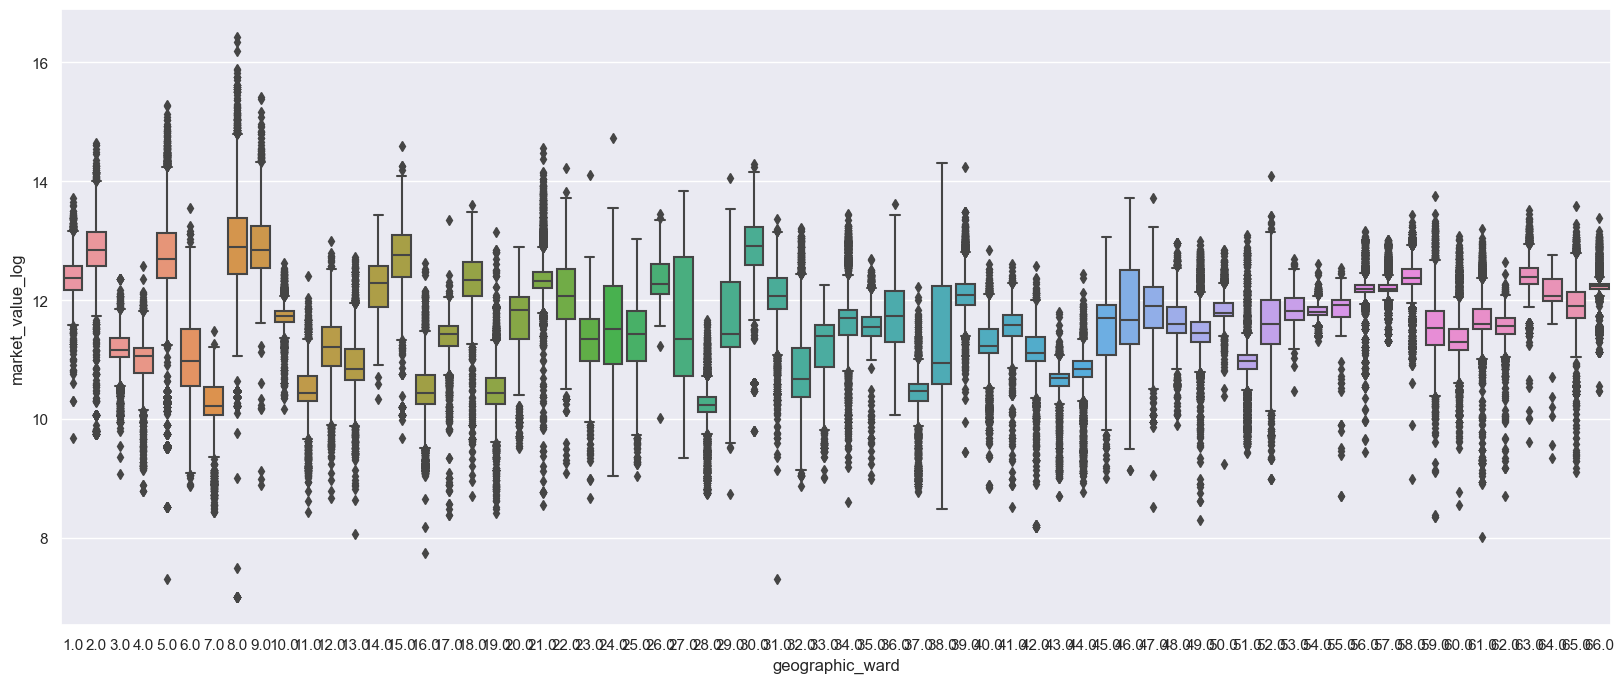

In [69]:
plt.figure(figsize=(20,8))
sns.boxplot(df_res, x='geographic_ward', y='market_value_log')

karena keterbatasan informasi mengenai geographic_ward, dan juga sebarannya yang terlalu random, maka kita drop kolom ini

### 6. Nilai market properti berdasarkan waktu (`sale_date` dan `year_built`)

#### i. `sale_date`

Berdasarkan tahun jual 

In [70]:
df_res['sale_date'] = pd.to_datetime(df_res['sale_date'])
df_res['sale_year'] = df_res['sale_date'].dt.year

In [71]:
df_res['sale_year'][0]

1951.0

In [72]:
df_market_time = df_res.groupby(['sale_year'])['market_value'].agg(['size', 'median']).reset_index()
df_market_time.head(10)

sale_year  size    median
0     1918.0     2  136000.0
1     1919.0     9  173800.0
2     1920.0    17  103800.0
3     1921.0     2  143250.0
4     1922.0    12  435650.0
5     1923.0    10  115100.0
6     1924.0     7   56800.0
7     1925.0    25  109200.0
8     1926.0    11  143800.0
9     1927.0    10  154000.0

Text(0.5, 1.0, 'median of market value throughout the year sale')

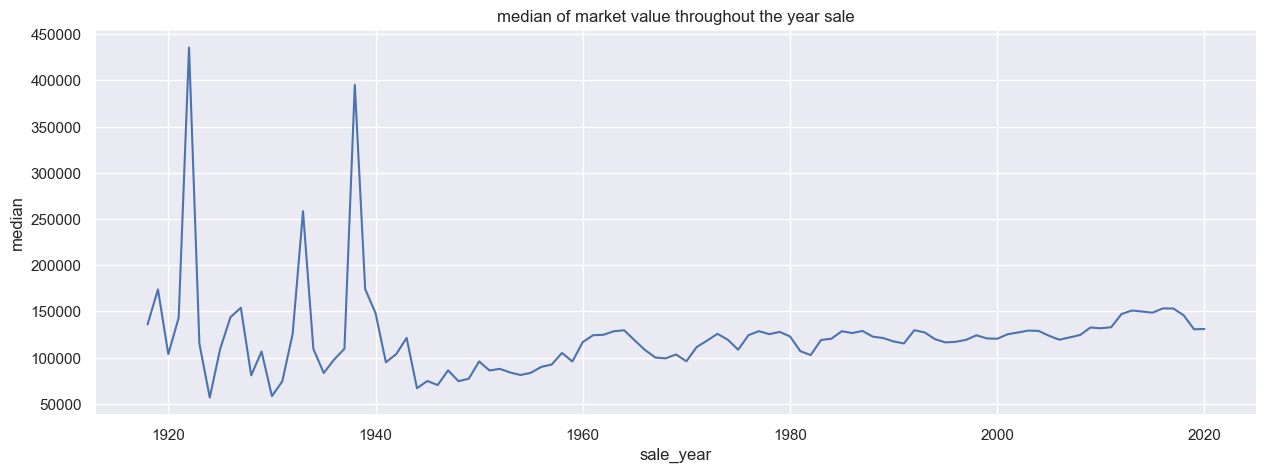

In [73]:
plt.figure(figsize=(15,5))
sns.lineplot(df_market_time, x='sale_year', y='median')
plt.title('median of market value throughout the year sale')

In [74]:
#total data yang kita drop (< 1944)
df_market_time[df_market_time['sale_year']<1944]['size'].sum()

637

- Jika dilihat, terjadi fluktuasi harga yang tidak menentu pada rentang tahun 1918-1944 --> selain karena jumlah data pada rentang tahun ini sangat mungkin juga efek karena PD1 dan PD2
- kita bisa membatasi data properti di Kota Philadelpia yang tahun penjualan nya (sale date) di atas tahun 1944. Ini akan menjadi limitasi dari model yang akan kita bangun.

Berdasarkan bulan jual 

Text(0.5, 1.0, 'median of market value based on month sale')

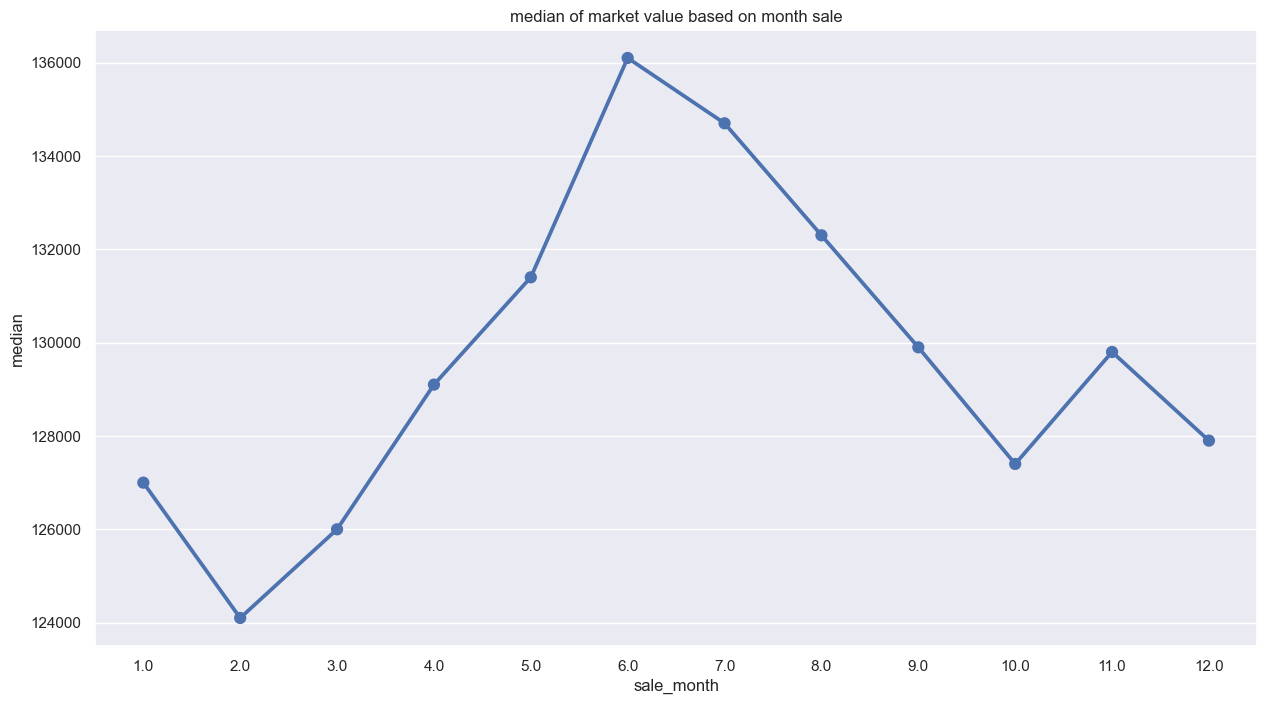

In [75]:
df_res['sale_date'] = pd.to_datetime(df_res['sale_date'])
df_res['sale_month'] = df_res['sale_date'].dt.month

plt.figure(figsize=(15,8))
sns.pointplot(df_res[df_res['sale_year']>=1944].groupby(['sale_month'])['market_value'].median().reset_index(name='median'), x='sale_month', y='median')
plt.title('median of market value based on month sale')

- harga market properti memiliki nilai median tertinggi di bulan Juni-Juli
- harga market properti memiliki nilai median terendah pada bulan ke-2 atau Februari

#### ii. `year_built`

In [76]:
df_res['year_built'] = df_res[df_res['year_built'].notnull()]['year_built'].astype(float)

Text(0.5, 1.0, 'median of market value throughout the year sale')

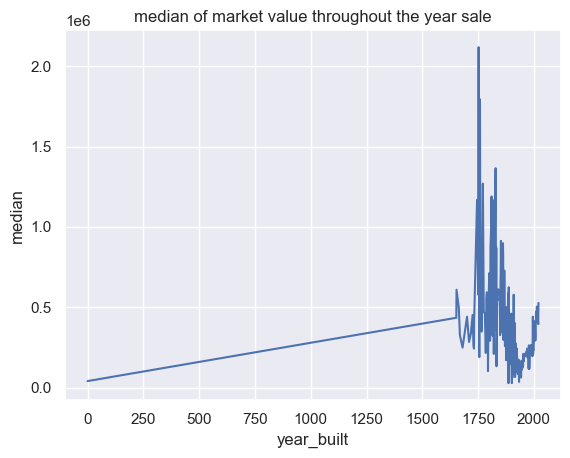

In [77]:
plt.figure()
sns.lineplot(df_res.groupby(['year_built'])['market_value'].agg(['size', 'median']).reset_index(), x='year_built', y='median')
plt.title('median of market value throughout the year sale')

- ada beberapa properti yang tahun dibangun/dibuat nya tidak masuk akal (tahun 0 susah didefinisikan)
- kita bisa asumsikan hanya menggunakan data properti yang dibangun di atas tahun 0 (tahun nya terdefinisi)

In [78]:
# kita hanya drop 670 baris 
df_res[df_res['year_built']==0]

building_code building_code_description  category_code  \
2802           O30           ROW 2 STY MASONRY              1   
6033           V30      PRIV GAR 2 STY MASONRY              1   
6788           B10     DET W/GAR 1 STY MASONRY              1   
9425           V10      PRIV GAR 1 STY MASONRY              1   
9531           P50     ROW W/GAR 3 STY MASONRY              1   
...              ...                       ...            ...   
578845         5R          CONDO PARKING SPACE              1   
578846         5R          CONDO PARKING SPACE              1   
578847         5R          CONDO PARKING SPACE              1   
578848         5R          CONDO PARKING SPACE              1   
578849         5R          CONDO PARKING SPACE              1   

       category_code_description  depth  exterior_condition  fireplaces  \
2802               Single Family  53.00                 4.0         0.0   
6033               Single Family  45.79                 4.0         0.0   
6788               Single Family  32.00                 4.0         0.0   
9425               Single Family   0.00                 NaN         0.0   
9531               Single Family  70.00                 0.0         0.0   
...                          ...    ...                 ...         ...   
578845             Single Family   0.00                 0.0         0.0   
578846             Single Family   0.00                 0.0         0.0   
578847             Single Family   0.00                 0.0         0.0   
578848             Single Family   0.00                 0.0         0.0   
578849             Single Family   0.00                 0.0         0.0   

        frontage  garage_spaces  geographic_ward  ...  year_built    zip_code  \
2802       16.00            0.0              1.0  ...         0.0   191481327   
6033       12.05            1.0              1.0  ...         0.0   191481607   
6788       43.00            1.0              1.0  ...         0.0   191475709   
9425        0.00            0.0              NaN  ...         0.0  19147-6601   
9531       16.00            0.0              2.0  ...         0.0   191475231   
...          ...            ...              ...  ...         ...         ...   
578845      0.00            0.0             18.0  ...         0.0   191254205   
578846      0.00            0.0             18.0  ...         0.0   191254205   
578847      0.00            0.0             18.0  ...         0.0   191254205   
578848      0.00            0.0             18.0  ...         0.0   191254205   
578849      0.00            0.0             18.0  ...         0.0   191254205   

                                      zoning                    owner_1  \
2802                     single-family-house  PETRONIS ANDREW             
6033                     single-family-house  DIFELICIANTONIO JOHN        
6788                     single-family-house  BRESSLER PETER              
9425                     single-family-house    SALTER MEWS HOMEOWNER'S   
9531                     single-family-house  COMARA MUHAMED L            
...                                      ...                        ...   
578845  commercial-industrial-specialpurpose  CANDY FACTORY HOLDINGS      
578846  commercial-industrial-specialpurpose  CANDY FACTORY HOLDINGS      
578847  commercial-industrial-specialpurpose  CANDY FACTORY HOLDINGS      
578848  commercial-industrial-specialpurpose  CANDY FACTORY HOLDINGS      
578849  commercial-industrial-specialpurpose  ACUNA RICHARD               

                          owner_2  state_code  market_value_log  \
2802    PETRONIS ANNA MARIE            1001.0         12.327405   
6033    DIFELICIANTONIO MICHELLE       4404.0         12.015517   
6788                          NaN      1001.0         11.797352   
9425                         ASSO      4404.0              -inf   
9531                          NaN      1001.0         13.253392   
...                           ...         ...    

Text(0.5, 1.0, 'median of market value throughout the year sale (where year sale > 0)')

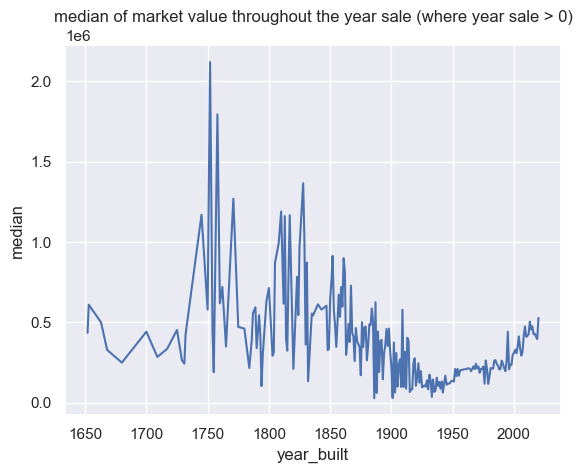

In [79]:
plt.figure()
sns.lineplot(df_res[df_res['year_built']>0].groupby(['year_built'])['market_value'].agg(['size', 'median']).reset_index(), x='year_built', y='median')
plt.title('median of market value throughout the year sale (where year sale > 0)')

DIbagi jadi 5-10 kategori dengan binning (quartil)

Selanjutnya mari kita lihat sebaran harga market berdasarkan "year_sale_built_gap" dari properti. 

**Disini kami definisikan "year_sale_built_gap" ini sebagai `year_sale` - `year_built`, dengan asumsi properti harusnya selesai dibuat/dibagun baru dijual**

In [80]:
df_prop_gap = df_res[(df_res['sale_year']>=1944) & (df_res['year_built']>0)].groupby(['sale_year','year_built'])['market_value'].agg(['size', 'median']).reset_index()
df_prop_gap

sale_year  year_built  size    median
0        1944.0      1875.0     1  206800.0
1        1944.0      1900.0     1   93800.0
2        1944.0      1905.0     2   37300.0
3        1944.0      1915.0    10   54900.0
4        1944.0      1917.0     1   80400.0
...         ...         ...   ...       ...
6754     2020.0      2016.0    34  406100.0
6755     2020.0      2017.0    42  415000.0
6756     2020.0      2018.0    42  437900.0
6757     2020.0      2019.0    32  407250.0
6758     2020.0      2020.0     1  526400.0

[6759 rows x 4 columns]

In [81]:
df_prop_gap['year_sale_built_gap'] = df_prop_gap['sale_year'] - df_prop_gap['year_built']

In [82]:
df_prop_gap[df_prop_gap['year_sale_built_gap']<0].sort_values(by='year_sale_built_gap')

sale_year  year_built  size    median  year_sale_built_gap
167      1951.0      2009.0     1  311600.0                -58.0
138      1950.0      2005.0     1  277200.0                -55.0
1030     1969.0      2019.0     1   23500.0                -50.0
1029     1969.0      2018.0     1  761100.0                -49.0
1100     1970.0      2019.0     1  315000.0                -49.0
...         ...         ...   ...       ...                  ...
2069     1983.0      1984.0     4  268900.0                 -1.0
1984     1982.0      1983.0     1  212400.0                 -1.0
1902     1981.0      1982.0     1  212000.0                 -1.0
1664     1978.0      1979.0     1  207100.0                 -1.0
6463     2018.0      2019.0    60  371050.0                 -1.0

[635 rows x 5 columns]

<AxesSubplot: xlabel='year_sale_built_gap', ylabel='size'>

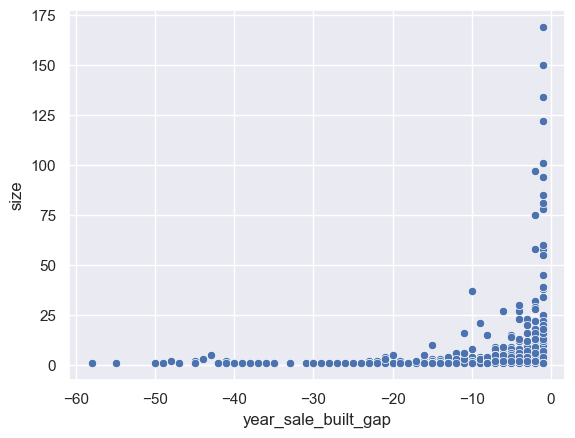

In [83]:
sns.scatterplot(df_prop_gap[df_prop_gap['year_sale_built_gap']<0].sort_values(by='year_sale_built_gap'), x='year_sale_built_gap', y='size')

In [84]:
df_prop_gap[df_prop_gap['year_sale_built_gap']<0]['size'].sum()

3983

- ada sebanyak 3983 properti yang sudah mulai dijual/dipasarkan sebelum dibangun secara fisik (nilai year_sale_built_gap nya negatif)
- ada beberapa properti yang selisih waktu antara tahun dijual dan dibangun nya di atas -1 tahun, bahkan ada yang sampai -99 tahun --> Anomali
- pada pemodelan kali ini kita hanya menggunakan data yang tahun dijual nya lebih besar dari yahun dibangun nya (artinya bangunan jadi dulu secara fisik baru dijual)

catatan : jika kita drop yang selisih year sale dan year built nya bernilai negatif maka ada `3983 baris` yang kita buang + `637 baris` yang di bawah tahun 1944 + `462 baris` yang tahun dibangun nya sama dengan 0 --> Jadi  total `5081 baris` yang kita drop

Mari kita plot harga properti berdasarkan `year_sale_built_gap` properti yang positif

<AxesSubplot: xlabel='year_sale_built_gap', ylabel='median'>

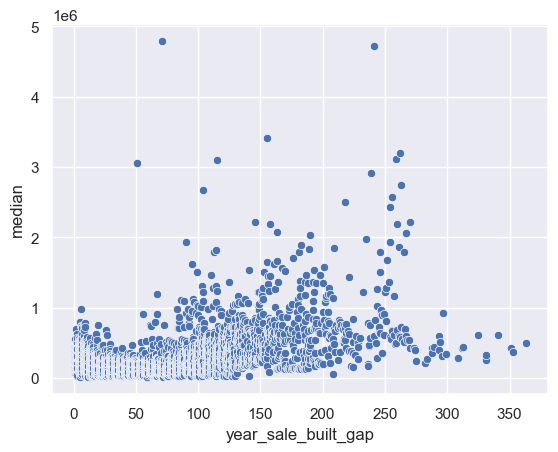

In [85]:
sns.scatterplot(df_prop_gap[df_prop_gap['year_sale_built_gap']>0].sort_values(by='year_sale_built_gap'), x='year_sale_built_gap', y='median')

- jika dilihat terlihat nilai market value cenderung sedikit meningkat saat gap antara tahun dijual dan dibangun nya tinggi

Selain itu pada tahap preprocessing, kita bisa juga membuat fitur baru --> `property_age` yang dimana merupakan umur bangunan tersebut semenjak tanggal dibangun tanggal_sekarang - tanggal_dibangun (dalam skala tahun)

### 7. Nilai market properti berdasarkan data numerik (`number_of_bathrooms`, `total_liveable_area`, `number_stories`, `number_of_rooms`, `number_of_bedrooms`, `garage_spaces`, `fireplaces`, `total_area`, `frontage`, `depth`)

##### i. Berdasarkan geometri tanah properti (luas tanah, kedalaman, lebar kavling dll)

`total_liveable_area` dan `total_area`

<AxesSubplot: title={'center': 'total_liveable_area (log scale)'}, xlabel='total_livable_area', ylabel='Count'>

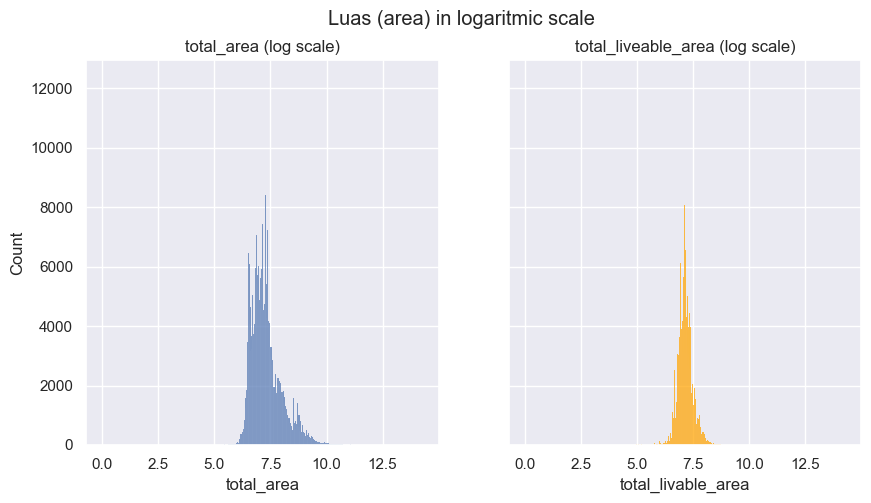

In [86]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))
fig.suptitle('Luas (area) in logaritmic scale')
axes[0].set_title('total_area (log scale)')
axes[1].set_title('total_liveable_area (log scale)')


sns.histplot(ax=axes[0],x=np.log(df_res['total_area']))
sns.histplot(ax=axes[1], x=np.log(df_res['total_livable_area']), color='orange')

- Sebaran `total_liveable_area` dan `total_area` terlihat tidak normal atau condong ke kanan
- Jika kita lakukan transformasi ke skala logaritma --> skewness nya berkurang (terlihat lebih "normal")

<AxesSubplot: title={'center': 'total_area'}, xlabel='total_area', ylabel='market_value_log'>

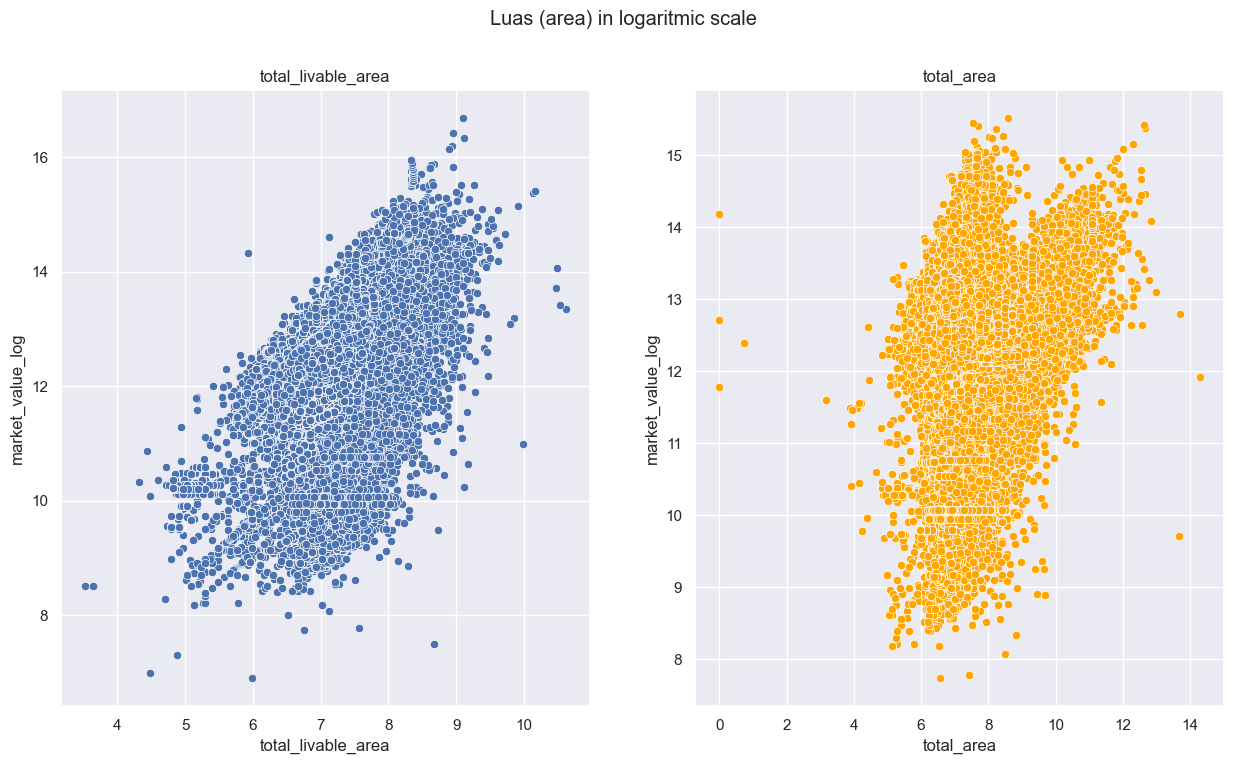

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(15,8))
fig.suptitle('Luas (area) in logaritmic scale')
axes[0].set_title('total_livable_area')
axes[1].set_title('total_area')

sns.scatterplot(ax=axes[0], x=np.log(df_res['total_livable_area']), y=df_res['market_value_log'])
sns.scatterplot(ax=axes[1], x=np.log(df_res['total_area']), y=df_res['market_value_log'], color='orange')

- ada korelasi yang cukup positif antara harga market properti dengan luas area (baik yang luas bangunan atau luas tanah), karena secara teori semakin luas area properti harga market nya makin tinggi (dengan asumsi tidak ada faktor lain yang mempengaruhi)

Tapi ada beberapa catatan yang perlu digaris bawahi pada kedua fitur ini

In [88]:
df_res[df_res['total_area']==0][['total_area', 'total_livable_area']]

total_area  total_livable_area
383            0.0              2134.0
5603           0.0                 0.0
9013           0.0              2257.0
9425           0.0                 0.0
11442          0.0                 0.0
...            ...                 ...
581451         0.0              2750.0
581452         0.0              2200.0
581453         0.0              3950.0
581454         0.0              2860.0
581455         0.0              2120.0

[33704 rows x 2 columns]

In [89]:
df_res[df_res['total_livable_area']==0][['total_area', 'total_livable_area']]

total_area  total_livable_area
1980        791.84                 0.0
3163       2850.00                 0.0
5603          0.00                 0.0
6806        903.20                 0.0
7343        630.00                 0.0
...            ...                 ...
579657        0.00                 0.0
579658        0.00                 0.0
579659        0.00                 0.0
579660        0.00                 0.0
579661        0.00                 0.0

[469 rows x 2 columns]

Jika kita lihat ada dua kondisi khusus pada kedua kolom ini :

- Luas bangunan (total_area) bernilai 0 (sebenarnya tidak benar-benar 0 melainkan mendekati 0), tapi luas bangunan TIDAK 0 itu artinya bangunan/properti tersebut di bangun di atas lahan yang sempit. Contoh : apartemen, rumah susun kecil dll 
- Luas bangunan (total_area) TIDAK 0, tapi luas bangunan nya 0 itu artinya bangunan/properti yang dibangun di atas lahan tersebut ukuran luas bangunan nya sangatlah kecil (mungkin hanya kamar mandi umum atau sejenisnya)

`depth`

<AxesSubplot: xlabel='depth', ylabel='Count'>

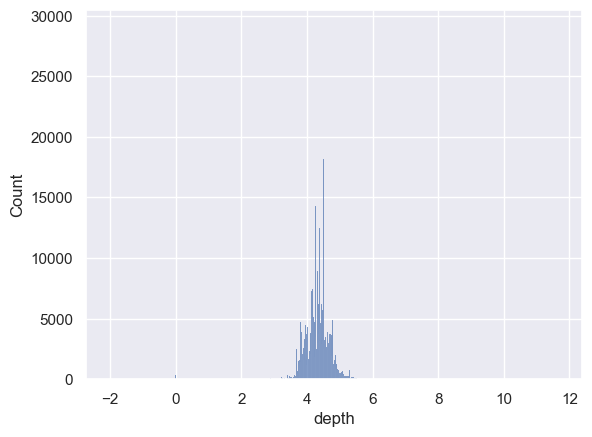

In [90]:
sns.histplot(np.log(df_res['depth']))

<AxesSubplot: xlabel='depth', ylabel='market_value_log'>

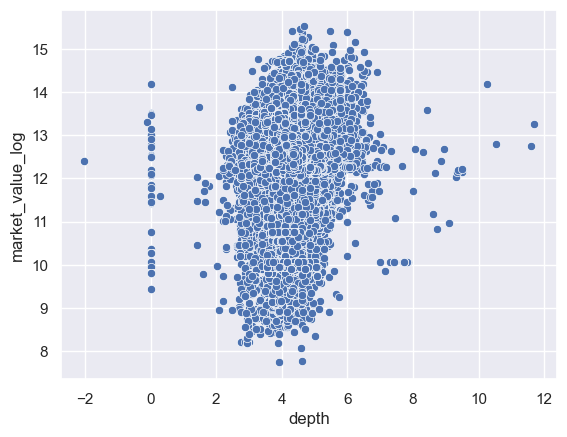

In [91]:
sns.scatterplot(x=np.log(df_res['depth']), y=df_res['market_value_log'])

`frontage`

In [92]:
df_res.describe().T.loc[['frontage']]

count        mean           std  min    25%   50%    75%  \
frontage  461571.0  956.601698  635902.63185  0.0  14.83  16.0  19.91   

                  max  
frontage  432026008.0

In [93]:
df_res['frontage'].quantile(0.995)

120.0

- persentil 99,5% berada pada nilai 120 --> artinya 99.5% dari total data yang ada nilainya dibawah atau sama dengan 120 
- 0.05% sisanya bisa dianggap nilai ekstrim --> efeknya mengurangi efektifitas model
- kita bisa batasi nilai `frontage` pada rentang 0-120 saja

In [94]:
df_res[df_res['frontage']<=120].shape

(459355, 36)

In [95]:
df_res[df_res['frontage']>120]['frontage']

826        126.44
9537      2375.00
9538      2269.00
11097     1157.00
11098      886.00
           ...   
572043     392.00
572044     392.00
572045     392.00
576383    1143.00
577561    1193.00
Name: frontage, Length: 2216, dtype: float64

<AxesSubplot: xlabel='frontage', ylabel='Count'>

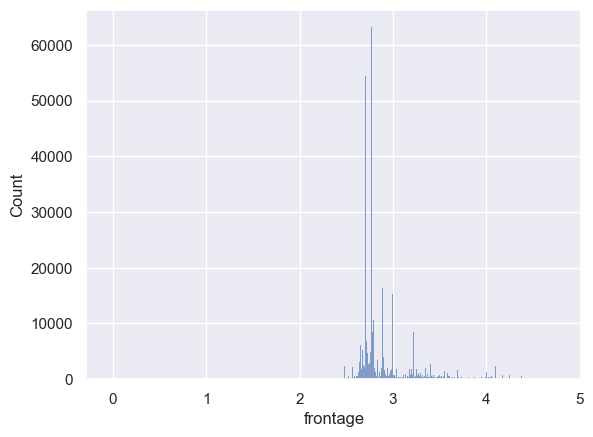

In [96]:
sns.histplot(np.log(df_res[df_res['frontage']<=120]['frontage']))

#### ii. Berdasarkan desain bangunan (jumlah ruangan, furnitur, jumlah lantai/tingkat bangunan)

jumlah ruangan --> `number_of_rooms`, `number_of_bedrooms`, dan `number_of_bathrooms`

pertama kita pastikan dulu definisi dari room apakah total ruangan atau kamar kosong

In [97]:
df_res[['number_of_rooms', 'number_of_bedrooms', 'number_of_bathrooms']].sample(10)

number_of_rooms  number_of_bedrooms  number_of_bathrooms
38090               4.0                 2.0                  1.0
324214              6.0                 3.0                  1.0
428437              0.0                 0.0                  0.0
57681               6.0                 3.0                  1.0
265977              6.0                 3.0                  1.0
325225              6.0                 3.0                  1.0
491650              6.0                 3.0                  1.0
162902              0.0                 0.0                  0.0
282119              6.0                 3.0                  1.0
303715              6.0                 3.0                  1.0

<AxesSubplot: title={'center': 'bathrooms'}, xlabel='number_of_bathrooms', ylabel='Count'>

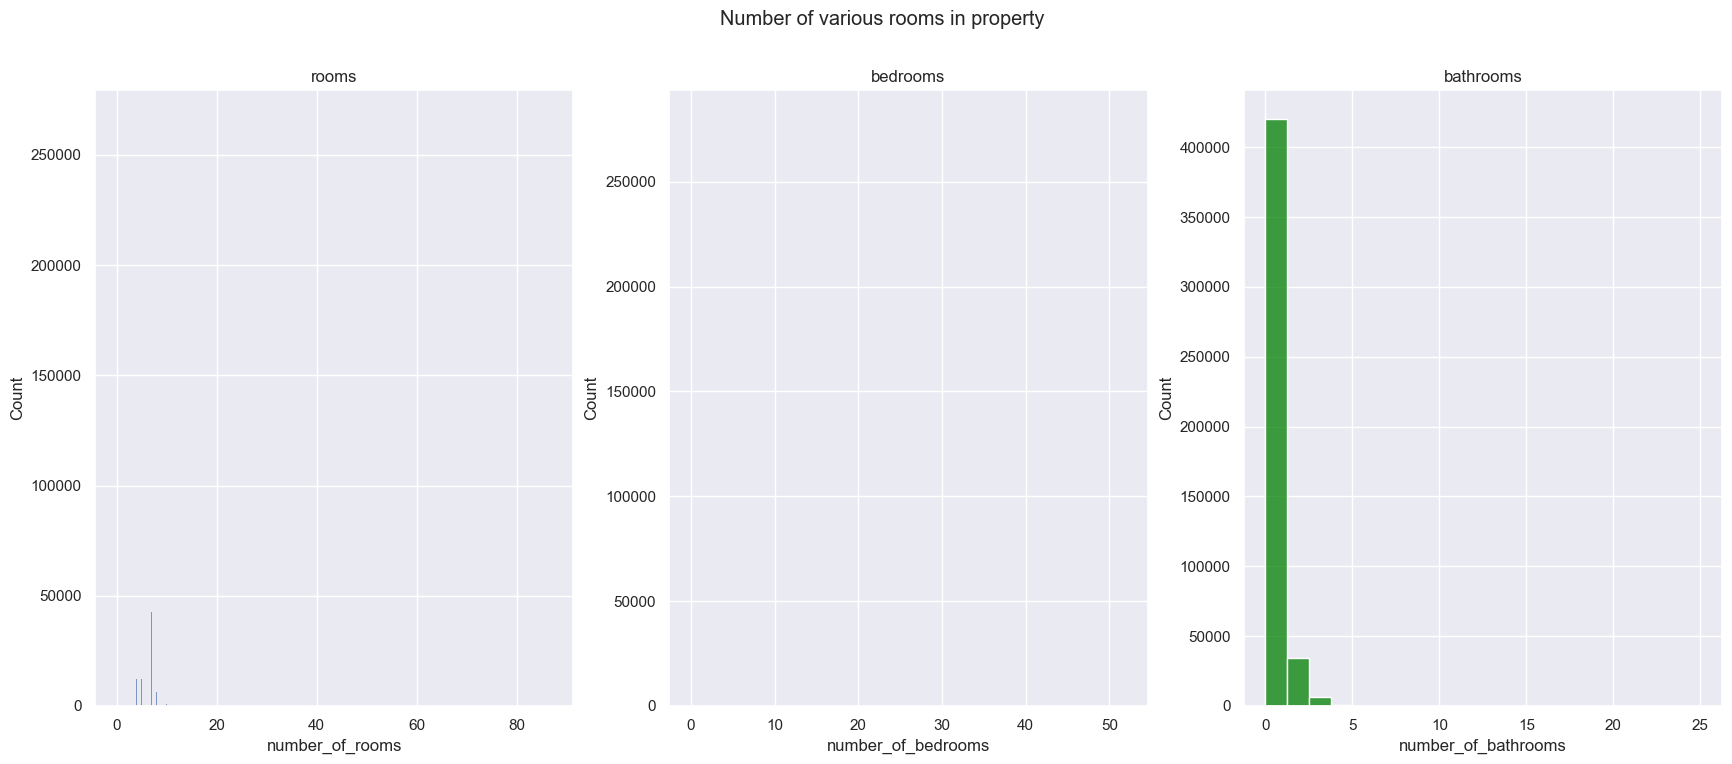

In [98]:
fig, axes = plt.subplots(1, 3, figsize=(21,8))
fig.suptitle('Number of various rooms in property')
axes[0].set_title('rooms')
axes[1].set_title('bedrooms')
axes[2].set_title('bathrooms')

sns.histplot(ax=axes[0], x=df_res['number_of_rooms'])
sns.histplot(ax=axes[1], x=df_res['number_of_bedrooms'], color='orange')
sns.histplot(ax=axes[2], x=df_res['number_of_bathrooms'], color='green')

terlihat pada kamar kosong (rooms), kamar tidur (bedrooms) dan kamar mandi (bathrooms) ada yang jumlahnya mencapai puluhan --> mari kita cek satu per satu

In [99]:
#rooms
display(df_res.describe().T.loc[['number_of_rooms']])
print("persentil 99.5% : ", df_res['number_of_rooms'].quantile(0.995))

count      mean       std  min  25%  50%  75%   max
number_of_rooms  461570.0  4.565258  2.738114  0.0  2.0  6.0  6.0  87.0

persentil 99.5% :  9.0


In [100]:
#bedrooms
display(df_res.describe().T.loc[['number_of_bedrooms']])
print("persentil 99.5% : ", df_res['number_of_bedrooms'].quantile(0.995))

count      mean       std  min  25%  50%  75%   max
number_of_bedrooms  461570.0  2.396284  1.383678  0.0  2.0  3.0  3.0  52.0

persentil 99.5% :  5.0


In [101]:
#bathrooms
display(df_res.describe().T.loc[['number_of_bathrooms']])
print("persentil 99.5% : ", df_res['number_of_bathrooms'].quantile(0.995))

count      mean       std  min  25%  50%  75%   max
number_of_bathrooms  461570.0  0.893065  0.603351  0.0  1.0  1.0  1.0  25.0

persentil 99.5% :  3.0


Terlihat bahwa nilai ruangan yang lebih dari 10 bisa kita drop --> kita anggap sebagai outlier ekstrim atau anomali sehingga kita bisa batasi nilai kamar sesuai dengan persentil 99.5% di atas (tujuan nya agar baris yang kita drop tidak terlalu banyak). Ini juga akan menjadi limitasi model nantinya

<AxesSubplot: title={'center': 'bathrooms'}, xlabel='number_of_bathrooms', ylabel='Count'>

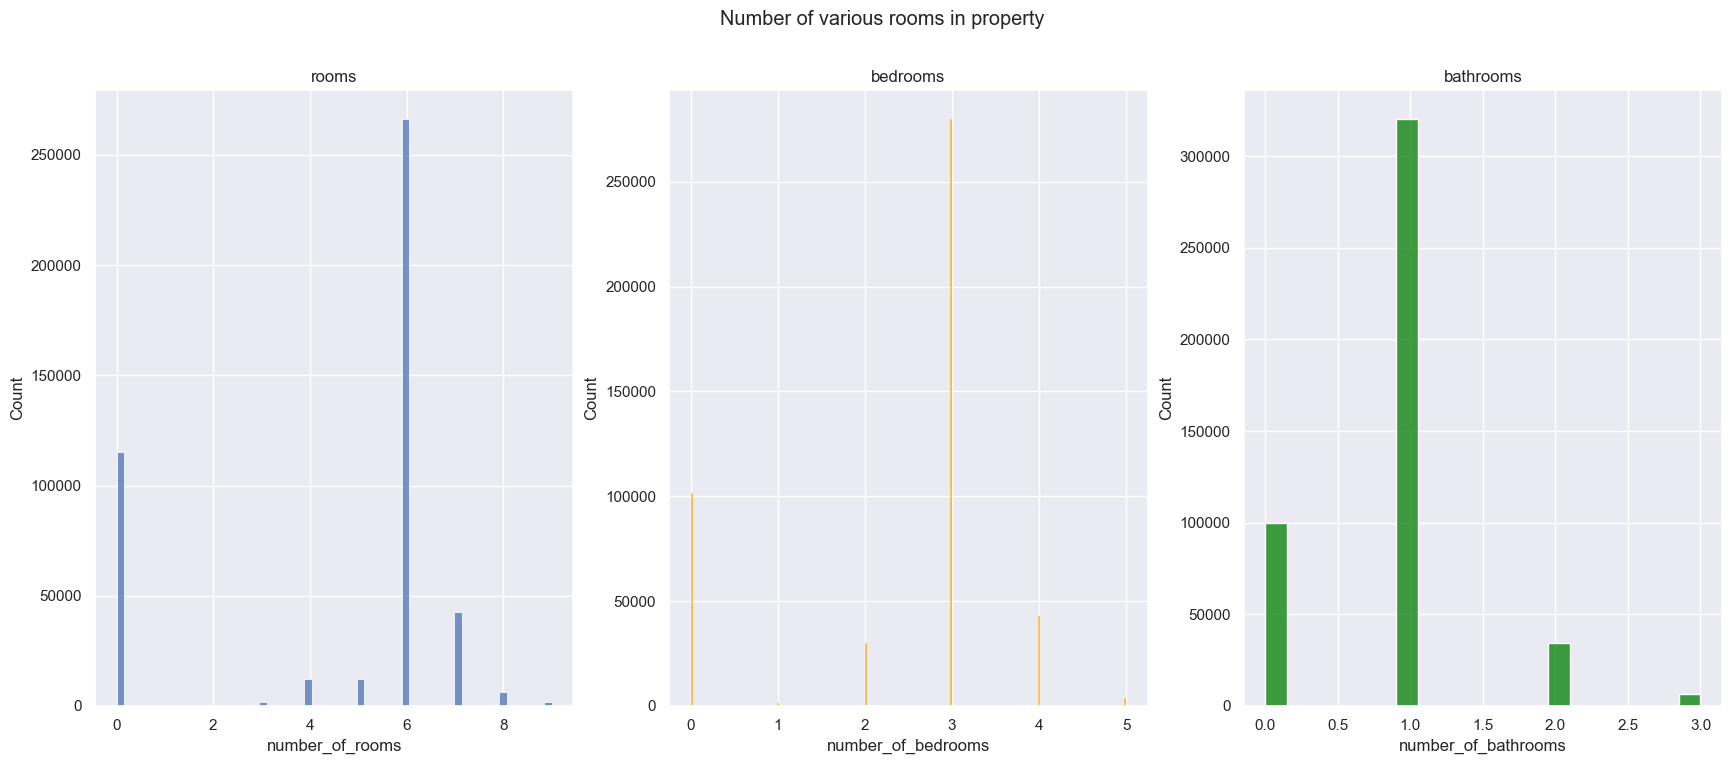

In [102]:
fig, axes = plt.subplots(1, 3, figsize=(21,8))
fig.suptitle('Number of various rooms in property')
axes[0].set_title('rooms')
axes[1].set_title('bedrooms')
axes[2].set_title('bathrooms')

sns.histplot(ax=axes[0], x=df_res[df_res['number_of_rooms']<=9]['number_of_rooms'])
sns.histplot(ax=axes[1], x=df_res[df_res['number_of_bedrooms']<=5]['number_of_bedrooms'], color='orange')
sns.histplot(ax=axes[2], x=df_res[df_res['number_of_bathrooms']<=3]['number_of_bathrooms'], color='green')

- untuk rooms kebanyakan berjumlah 6, bedrooms --> 3 dan bathrooms --> 1

lalu berikut sebaran harga market (log scale) terhadap jumlah ruangan

<AxesSubplot: title={'center': 'bathrooms'}, xlabel='number_of_bathrooms', ylabel='market_value_log'>

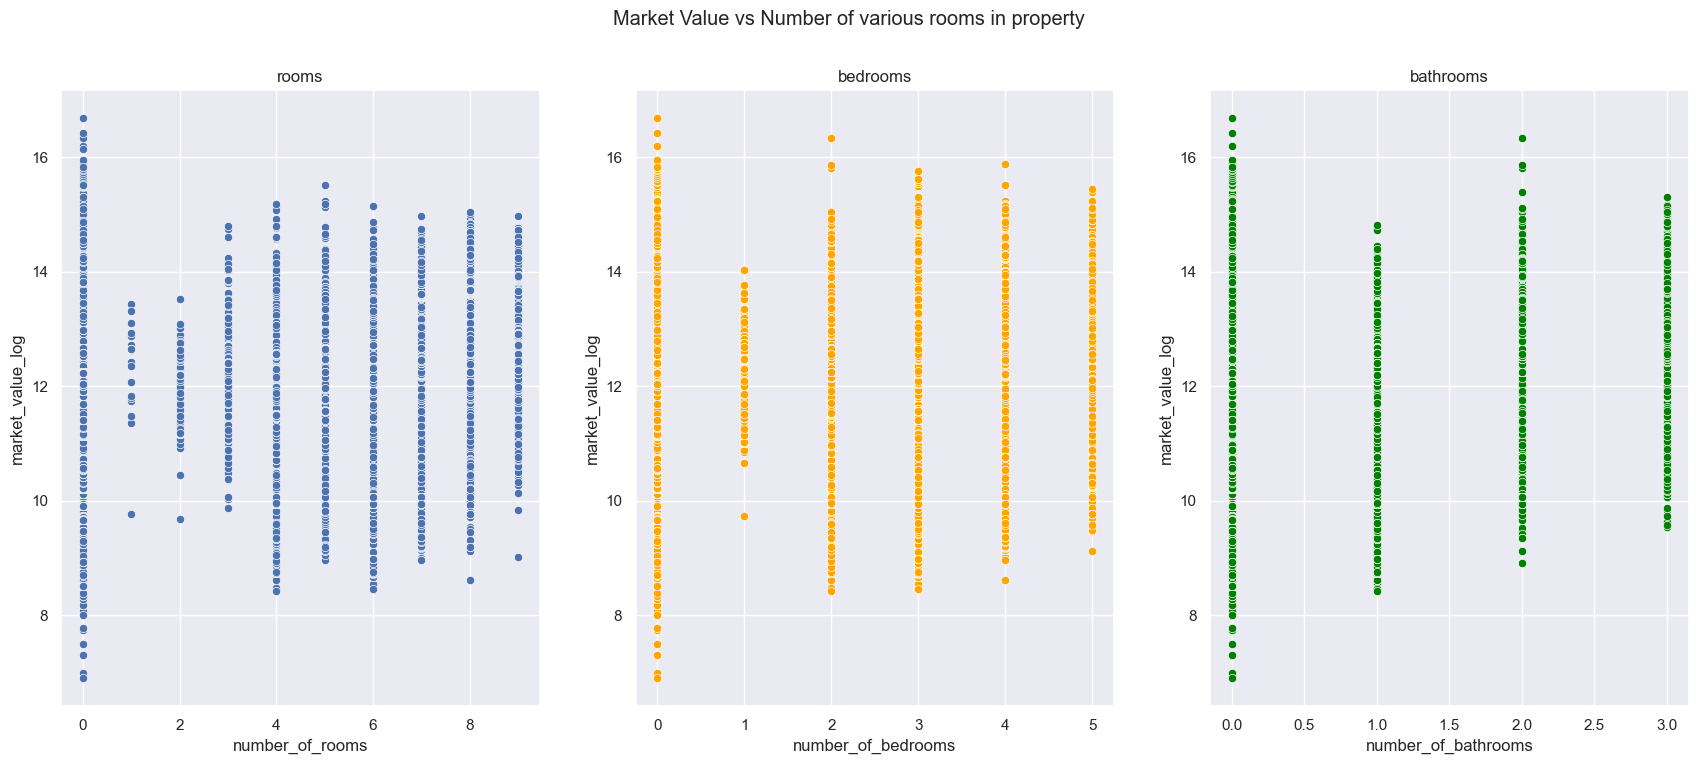

In [103]:
fig, axes = plt.subplots(1, 3, figsize=(21,8))
fig.suptitle('Market Value vs Number of various rooms in property')
axes[0].set_title('rooms')
axes[1].set_title('bedrooms')
axes[2].set_title('bathrooms')

sns.scatterplot(ax=axes[0], x=df_res[df_res['number_of_rooms']<=9]['number_of_rooms'], y=df_res['market_value_log'])
sns.scatterplot(ax=axes[1], x=df_res[df_res['number_of_bedrooms']<=5]['number_of_bedrooms'], y=df_res['market_value_log'], color='orange')
sns.scatterplot(ax=axes[2], x=df_res[df_res['number_of_bathrooms']<=3]['number_of_bathrooms'], y=df_res['market_value_log'], color='green')

Pada tahap preprocessing juga bisa kita buat fitur baru --> `total_rooms` yang merupakan total ruangan yang ada

#### iii. garasi --> `garace_space`

In [104]:
#garage_spaces
display(df_res.describe().T.loc[['garage_spaces']])
print("persentil 99.5% : ", df_res['garage_spaces'].quantile(0.995))

count      mean       std  min  25%  50%  75%   max
garage_spaces  461570.0  0.381793  0.675748  0.0  0.0  0.0  1.0  72.0

persentil 99.5% :  2.0


99.5% dari data yang ada memiliki nilai <=2 maka kita bisa drop sisanya

<AxesSubplot: xlabel='garage_spaces', ylabel='Count'>

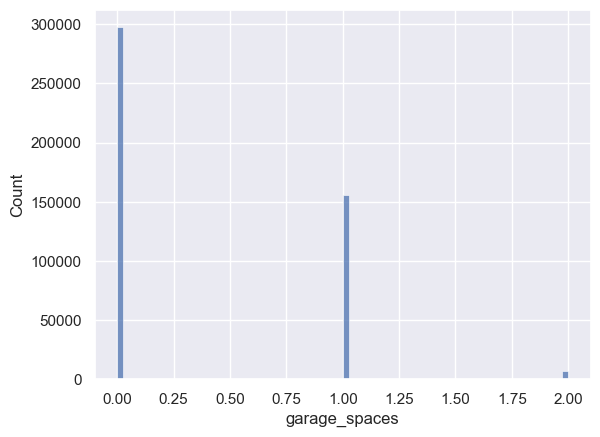

In [105]:
sns.histplot(df_res[df_res['garage_spaces']<=2]['garage_spaces'])

<AxesSubplot: xlabel='garage_spaces', ylabel='market_value_log'>

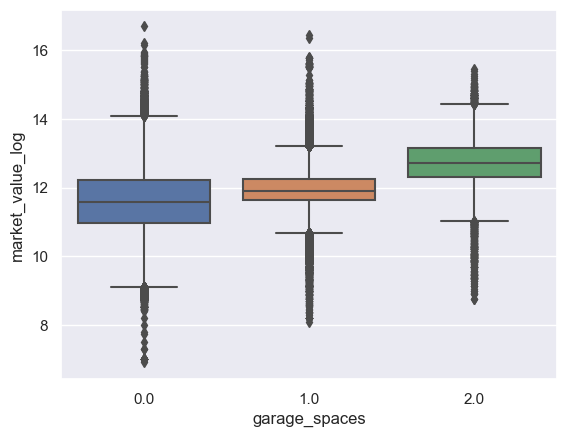

In [106]:
sns.boxplot(df_res[df_res['garage_spaces']<=2], x='garage_spaces', y='market_value_log')

In [107]:
np.exp(12)

162754.79141900392

karena jumlah nya yang tidak balance, pada tahap preprocessing kita bisa memodifikasi kolom menjadi fitur baru yaitu -- `is_garage` yang menunjukkan apakah properti tersebut mempunyai garasi atau tidak

#### iv. tingkat/jumlah lantai --> `number_of_stories`

In [108]:
#number_stories
display(df_res.describe().T.loc[['number_stories']])
print("persentil 99.5% : ", df_res['number_stories'].quantile(0.995))

count      mean       std  min  25%  50%  75%   max
number_stories  461570.0  1.737524  1.537404  0.0  2.0  2.0  2.0  56.0

persentil 99.5% :  4.0


<AxesSubplot: xlabel='number_stories', ylabel='Count'>

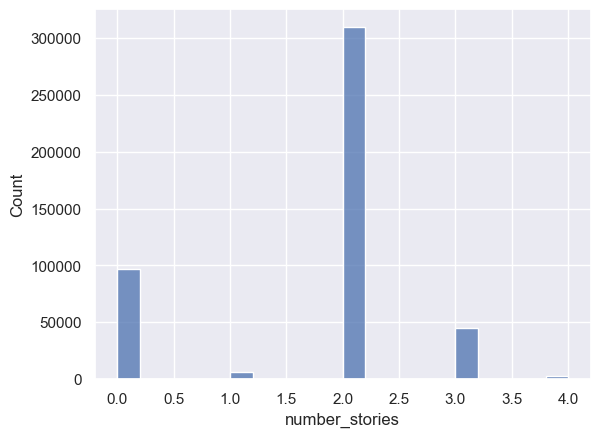

In [109]:
sns.histplot(df_res[df_res['number_stories']<=4]['number_stories'])

karena jumlah nya yang tidak balance, pada tahap preprocessing kita bisa memodifikasi kolom menjadi fitur baru yaitu -- `is_oneFloor` yang menunjukkan apakah properti tersebut bertingkat atau tidak

#### v. jumlah perapian dalam rumah/fireplace --> `fireplaces`

In [110]:
#fire_places
display(df_res.describe().T.loc[['fireplaces']])
print("persentil 99.5% : ", df_res['fireplaces'].quantile(0.995))

count      mean       std  min  25%  50%  75%   max
fireplaces  461570.0  0.039038  0.258536  0.0  0.0  0.0  0.0  10.0

persentil 99.5% :  2.0


<AxesSubplot: xlabel='fireplaces', ylabel='Count'>

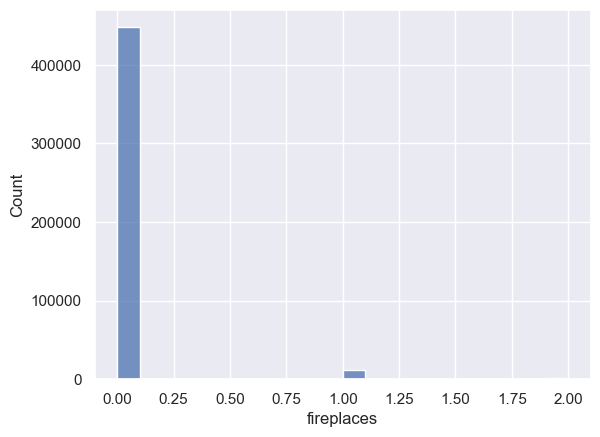

In [111]:
sns.histplot(df_res[df_res['fireplaces']<=2]['fireplaces'])

karena jumlah nya yang sangat tidak balance, kita akan drop kolom ini 

### 8. Nilai market properti berdasarkan harga jual (`sale_price`)

In [112]:
display(df_res.describe().T.loc[['sale_price']])

count           mean           std  min  25%      50%  \
sale_price  461572.0  301470.071172  1.220166e+07  0.0  1.0  46000.0   

                 75%          max  
sale_price  137800.0  948729100.0

<AxesSubplot: xlabel='sale_price', ylabel='Count'>

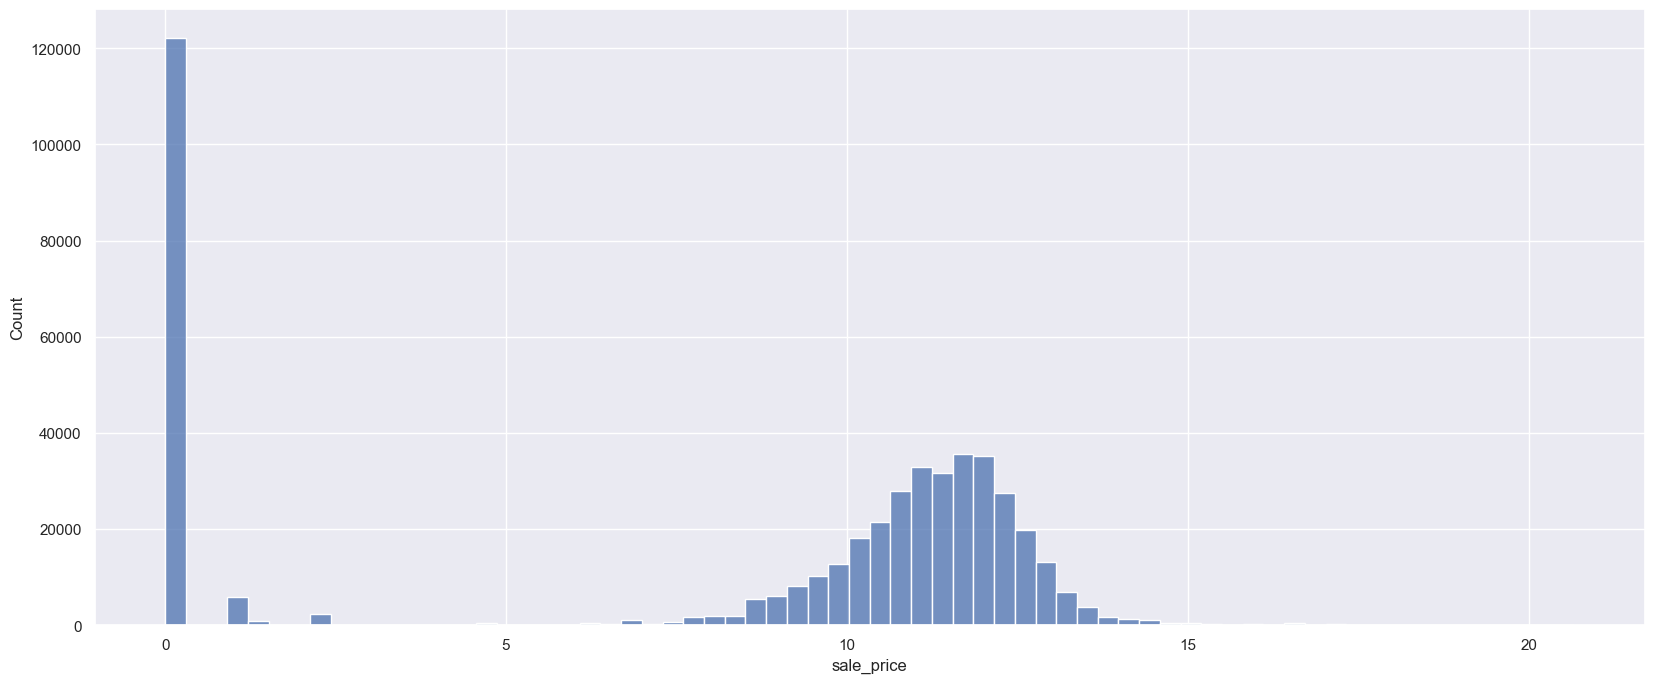

In [113]:
plt.figure(figsize=(20,8))
sns.histplot(np.log(df_res['sale_price']))

- Sepertinya definisi dari `sale_price` disini adalah harga jual yang ditetapkan oleh pemilik properti --> sehingga banyak nilai terlihat tidak masuk akal (contoh sale price nya banyak yang bernilai 0 dan 1)
- Selain itu menurut kami, jika kita gunakan `sale_price` sebagai fitur untuk pemodelan, bisa menyebabkan **data leakage**, karena biasanya penetapan harga jual oleh pemilik properti berdasarkan pengamatan baik individu/kelompok tentang "harga pasar" yang ada di kota philadelpia --> jadi nilai market terekspos

### 9. Nilai market properti berdasarkan `house_extension`

mari kita cek sebaran dai fitur/kolom ini

<AxesSubplot: xlabel='house_extension', ylabel='Count'>

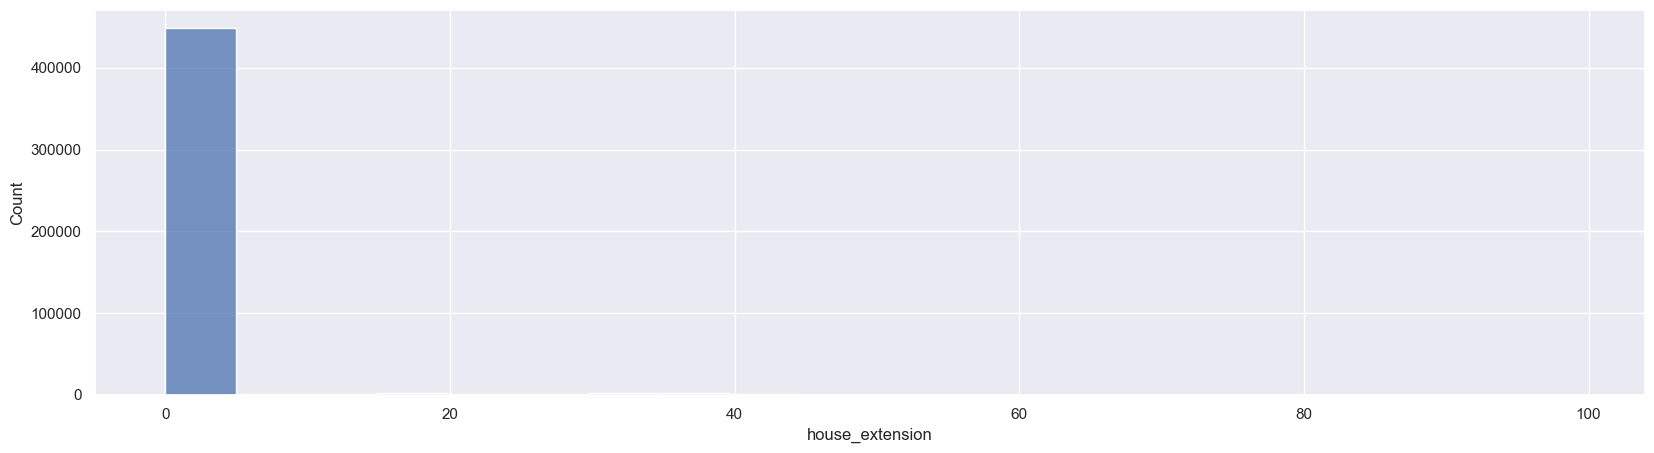

In [114]:
plt.figure(figsize=(20,5))
sns.histplot(df_res['house_extension'])

sangat tidak seimbang --> kita drop saja

### 10. Nilai market properti berdasarkan `owner_1` dan `owner_2`

mari kita cek dulu datanya

In [115]:
display(df_res[['owner_1', 'owner_2']].sample(10))
print("missing value pada kolom owner_2 : ", df_res['owner_2'].isnull().sum()*100/len(df_res), "%")

owner_1                    owner_2
340971  BOCK BRANDON W             BOCK DINORA VILLALTA DE  
456670  WAAS MARK E                                      NaN
175334  FREEDMAN NOAH B                                  NaN
6193    XUE JIANWEI                                      NaN
58870   JOHNSON DORIS T P          WHALEY ROBIN RENEE'      
203331  SANTIAGO ENRIQUE                                 NaN
177642  OSCAR BALLARD              MADELINE BALLARD         
386384  TAYLOR LEROY                                     NaN
543590  HUANG TIFFANY                                    NaN
391501  WRIGHT JERMAINE W                                NaN

missing value pada kolom owner_2 :  62.853682632395376 %


- Jika kita perhatikan banyak nilai kosong pada kolom owner_2 dikarenakan pemilinya masih sama yaitu owner_1
- Pada tahap data preprocessing kita bisa isi nilai kosong ini dengan nama yang sama pada owner_1
- Kita bisa mengekstrak fitur baru yaitu --> `is_SingleOwner` (dengan nilai 1 jika sama dan 0 jika berbeda)

# Data Preprocessing

Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk pemodelan. Beberapa hal yang dilakukan adalah:

1) Data Cleaning
- Drop data duplikat jika ada.
- Cek format penulisan data apakah sudah benar atau belum (jika ada).
- Drop fitur yang tidak memiliki relevansi terhadap harga properti.
- Melakukan treatment terhadap missing value jika ada. Bisa dengan cara men-drop fiturnya jika memang tidak dibutuhkan atau bisa juga dengan mengimputasi dengan nilai yang paling masuk baik secara *domain knowledge* maupun secara statistik.
- Pengecekan Outliers

2) Feature engineering adalah proses membuat, memilih, atau mengekstraksi fitur (features) yang relevan dari data mentah (raw data) untuk digunakan dalam proses pembelajaran mesin (machine learning). Tujuan utama dari feature engineering adalah meningkatkan kualitas data yang akan digunakan oleh algoritma pembelajaran mesin sehingga menghasilkan model yang lebih baik dan performa yang lebih baik pula. Kita akan melakukan :
   - ekstraksi fitur (**feature extraction**) 
   - konstruksi fitur (**feature construction**) atau pembuatan fitur (**feature creation**)
   

3) Data Transformation
- langkah ini melibatkan pengubahan data ke dalam format yang lebih cocok untuk pemodelan regresi untuk memprediksi harga properti single-family di philadelphia. Ini dapat mencakup normalisasi data numerik, membuat variabel dummy, dan mengkodekan data kategorikal.

Sebelum kita mulau tahap pertama, mari kita cek kolom apa saja yang akan kita gunakan dalam pemodelan (beberapa fitur akan diseleksi/didrop berdasarkan hasil analisis EDA)

In [116]:
features = ['depth', 'exterior_condition', 'frontage', 'garage_spaces',
            'interior_condition', 'number_of_bathrooms', 'number_of_bedrooms',
            'number_of_rooms', 'number_stories', 'sale_date', 'street_name',
            'total_area', 'total_livable_area', 'year_built',
            'zip_code', 'zoning', 'owner_1', 'owner_2', 'market_value']

In [117]:
#hanya gunakan kategori banguna Single Family
df_model = df_raw[df_raw['category_code_description']=='Single Family'][features]

In [118]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isnull().sum()*100/len(df_model), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(1).values)])

df_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)

df_desc = df_desc.sort_values(by='null', ascending=False).reset_index(drop=True)
df_desc

dataFeatures dataType       null  nullPct  unique  \
0               owner_2   object  62.853546    62.85  136357   
1    interior_condition  float64   0.026648     0.03       8   
2    exterior_condition  float64   0.006500     0.01       8   
3             sale_date   object   0.005200     0.01   22074   
4                zoning   object   0.003466     0.00      35   
5    total_livable_area  float64   0.000433     0.00    5148   
6         garage_spaces  float64   0.000433     0.00      30   
7   number_of_bathrooms  float64   0.000433     0.00      16   
8    number_of_bedrooms  float64   0.000433     0.00      22   
9       number_of_rooms  float64   0.000433     0.00      33   
10       number_stories  float64   0.000433     0.00      57   
11           year_built   object   0.000433     0.00     299   
12                depth  float64   0.000217     0.00   15665   
13           total_area  float64   0.000217     0.00   77938   
14             frontage  float64   0.000217     0.00    8054   
15             zip_code   object   0.000000     0.00   37308   
16          street_name   object   0.000000     0.00    2489   
17              owner_1   object   0.000000     0.00  375511   
18         market_value  float64   0.000000     0.00   10859   

                   uniqueSample  
0   [LECOMPTE FRAN            ]  
1                         [5.0]  
2                         [4.0]  
3         [2017-08-28 00:00:00]  
4                       [CMX4 ]  
5                      [4343.0]  
6                         [8.0]  
7                         [1.0]  
8                         [nan]  
9                        [10.0]  
10                       [56.0]  
11                       [2015]  
12                       [90.4]  
13                     [8669.0]  
14                       [60.6]  
15                  [191036709]  
16                        [NEW]  
17  [LIGGINS WILLIE MAY       ]  
18                   [136400.0]

Untuk menghindari data leakage (terutama saat imputasi missing value dengan median/mean/modus) kita akan split data train dan test disini dengan komposisi 80% data train dan 20% data test

In [119]:
# Splitting data training dan test dengan proporsi 80:20
df_train, df_test= train_test_split(
    df_model, 
    test_size=0.2,
    random_state=1)

### 1. Data Cleaning

#### 1.1 Duplicated data

cek apakah ada data/baris duplikat

In [120]:
print("train :", df_train.duplicated().sum())
print("test :", df_test.duplicated().sum())

train : 2163
test : 292


drop data duplikat

In [121]:
df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()

#### 1.2 Format Penulisan Data dan Missing value handling

##### i. `interior_condition` dan `exterior_condition`

- Dari hasil EDA kita ketahui bahwa kebanyakan kondisi interior dan eksterior properti memiliki nilai/kategori yang sama (461.572 baris atau 98.8% dari total baris keseluruhan)
- Maka disini kami akan mengisi nilai kosong pada kolom `interior_condition` dengan nilai (tidak kosong) pada kolom `exterior_condition` dan begitu sebaliknya.
- Jika keduanya kosong maka, kami akan drop baris tersebut

In [122]:
#mengisi nilai kosong pada kolom interior_condition
df_train.loc[(df_train['interior_condition'].isnull()) & (df_train['exterior_condition'].notnull()), 'interior_condition'] = df_train[(df_train['interior_condition'].isnull()) & (df_train['exterior_condition'].notnull())]['exterior_condition'].values

#mengisi nilai kosong pada kolom interior_condition
df_test.loc[(df_test['interior_condition'].isnull()) & (df_test['exterior_condition'].notnull()), 'interior_condition'] = df_test[(df_test['interior_condition'].isnull()) & (df_test['exterior_condition'].notnull())]['exterior_condition'].values


In [123]:
#mengisi nilai kosong pada kolom exterior_condition
df_train.loc[(df_train['exterior_condition'].isnull()) & (df_train['interior_condition'].notnull()), 'exterior_condition'] = df_train[(df_train['exterior_condition'].isnull()) & (df_train['interior_condition'].notnull())]['interior_condition']

#mengisi nilai kosong pada kolom exterior_condition
df_test.loc[(df_test['exterior_condition'].isnull()) & (df_test['interior_condition'].notnull()), 'exterior_condition'] = df_test[(df_test['exterior_condition'].isnull()) & (df_test['interior_condition'].notnull())]['interior_condition']


In [124]:
#drop baris yang memiliki nilai kosong pada kedua kolom interior_condition dan exterior_condition
df_train = df_train.dropna(subset=['interior_condition', 'exterior_condition'])

df_test = df_test.dropna(subset=['interior_condition', 'exterior_condition'])

In [125]:
df_train[['interior_condition', 'exterior_condition']].isnull().sum()

interior_condition    0
exterior_condition    0
dtype: int64

In [126]:
df_test[['interior_condition', 'exterior_condition']].isnull().sum()

interior_condition    0
exterior_condition    0
dtype: int64

##### ii. `zoning`

Dari hasil EDA kita dapat melihat ada beberapa penulisan yang tidak konsisten dan ada typo.
Mari kita cek kembali

In [127]:
display(df_train['zoning'].value_counts().reset_index(name='count'))

index   count
0   RSA5   200288
1   RM1     64452
2   RSA3    41740
3   RSD3    10023
4   RSA2     9298
5   RSA4     8924
6   CMX2     4358
7   RM2      3927
8   CMX3     3651
9   CMX5     2696
10  RM4      2596
11  RSD1     2370
12  CMX4     1944
13  RMX3     1607
14  RTA1     1463
15  RMX1      975
16  RSD2      969
17  I2        955
18  RM3       913
19  RSA1      901
20  CMX1      879
21  ICMX      731
22  CMX25     512
23  IRMX      252
24  I1        147
25  RMX2      143
26  CA2       116
27  CA1        84
28  I3         49
29  SPINS      45
30  SPPOA      35
31  CMX2.      12
32  12          8
33  RSA         2
34  IP          1

In [128]:
display(df_test['zoning'].value_counts().reset_index(name='count'))

index  count
0   RSA5   50099
1   RM1    15962
2   RSA3   10565
3   RSD3    2439
4   RSA2    2370
5   RSA4    2315
6   CMX2    1160
7   RM2     1043
8   CMX3     907
9   CMX5     695
10  RM4      676
11  RSD1     566
12  CMX4     493
13  RMX3     418
14  RTA1     370
15  RMX1     267
16  I2       259
17  RSD2     236
18  RSA1     223
19  RM3      211
20  CMX1     209
21  ICMX     174
22  CMX25    136
23  IRMX      51
24  RMX2      46
25  I1        33
26  CA2       27
27  CA1       18
28  I3        16
29  SPPOA     10
30  SPINS      9
31  12         4
32  CMX2.      2
33  RSA        1

In [129]:
#strip (remove whitespaces)
df_train['zoning'] = df_train['zoning'].str.strip()
df_test['zoning'] = df_test['zoning'].str.strip()

#ubah 12 ke I2
df_train.loc[df_train['zoning']=="12", 'zoning'] = "I2"
df_test.loc[df_test['zoning']=="12", 'zoning'] = "I2"

Selanjutnya kita isi nilai yang kosong menggunakan modus dari kolom zoning untuk masing-masing data train dan test

In [130]:
df_train['zoning'].mode().values[0]

'RSA5'

In [131]:
df_train['zoning'] = df_train['zoning'].fillna(df_train['zoning'].mode().values[0])
df_test['zoning'] = df_test['zoning'].fillna(df_test['zoning'].mode().values[0])

##### iii. `sale_date` dan `year_built`

In [132]:
print('sale_date')
print(df_train['sale_date'].isnull().sum())
print(df_test['sale_date'].isnull().sum())

sale_date
16
8


In [133]:
print('year_built')
print(df_train['year_built'].isnull().sum())
print(df_test['year_built'].isnull().sum())

year_built
0
0


karena tidak ada cara yang tepat untuk mengisi nilai kosong ini (dan juga porsi nya yang sangat sedikit jika dibandingkan data utama) maka kita akan drop missing value pada kedua fitur ini

In [134]:
df_train = df_train[df_train['sale_date'].notnull()]
df_test = df_test[df_test['sale_date'].notnull()]

In [135]:
df_train['year_built'] = df_train['year_built'].dropna()
df_test['year_built'] = df_test['year_built'].dropna()

##### iv. `number_of_bathrooms`, `total_liveable_area`, `number_stories`, `number_of_rooms`, `number_of_bedrooms`, `garage_spaces`, `total_area`, `frontage`, `depth`

In [136]:
num_col = ['number_of_bathrooms', 'total_livable_area', 'number_stories', 'number_of_rooms', 
           'number_of_bedrooms', 'garage_spaces', 'total_area', 'frontage', 'depth']

num_miss_train = pd.DataFrame({"columns" : num_col, "count_missing" : [df_train[col].isnull().sum() for col in num_col]})
num_miss_train

columns  count_missing
0  number_of_bathrooms              0
1   total_livable_area              0
2       number_stories              0
3      number_of_rooms              0
4   number_of_bedrooms              0
5        garage_spaces              0
6           total_area              0
7             frontage              0
8                depth              0

In [137]:
num_miss_test = pd.DataFrame({"columns" : num_col, "count_missing" : [df_test[col].isnull().sum() for col in num_col]})
num_miss_test

columns  count_missing
0  number_of_bathrooms              0
1   total_livable_area              0
2       number_stories              0
3      number_of_rooms              0
4   number_of_bedrooms              0
5        garage_spaces              0
6           total_area              0
7             frontage              0
8                depth              0

tidak ada data yang kosong pada fitur-fitur ini

##### v. `owner_1` dan `owner_2`

In [138]:
print("data train :")
display(df_train[['owner_1', 'owner_2']])
print("missing value owner_1 :", df_train['owner_1'].isnull().sum())
print("missing value owner_2 :", df_train['owner_2'].isnull().sum())

print("*"*50)

print("data test :")
display(df_test[['owner_1', 'owner_2']])
print("missing value owner_1 :", df_test['owner_1'].isnull().sum())
print("missing value owner_2 :", df_test['owner_2'].isnull().sum())

data train :


owner_1                    owner_2
480193  SHIELDS JOHN               ACHUFF HELENE            
53068   WAGNER DANIEL A            ENO MARY M               
248476  LAUREL A TINNEY                                  NaN
355362  SMITH ROSA LEE                                   NaN
70966   LEIGH DORIS                                      NaN
...                           ...                        ...
87819   GIANNASCOLI MATTHEW                              NaN
440969  KENKELEN JAMES F                                 NaN
373726  SOUND HIVE CORPORATION                           NaN
321162  BAWA MAWIYAH                                     NaN
156464  GULLE JEAN PAUL                                  NaN

[367056 rows x 2 columns]

missing value owner_1 : 0
missing value owner_2 : 230221
**************************************************
data test :


owner_1                    owner_2
60754   RICHARD L QUICK JR         TAMARA F                 
359726  MILYAVSKY ALEX                                   NaN
51099   SCHOTSCH KENNETH M         SISLE ELLEN              
123875  DANGELO DENISE                                   NaN
179834  DELTA FUND 1 PHILLY LLC                          NaN
...                           ...                        ...
492973  STONE MARIE ANN                                  NaN
422050  GRAD DEBRA                                       NaN
303005  WONG-DANSSOKO TAMIKA                             NaN
268453  JONES TOMMY T                                    NaN
366456  WILSON DEBRA                                     NaN

[92010 rows x 2 columns]

missing value owner_1 : 0
missing value owner_2 : 57736


Sesuai hasil EDA, kita ketahui bahwa nilai kosong pada kolom owner_2 dapat kita isi dengan nilai yang sama pada kolom owner_1 karena artinya properti tersebut memang dimiliki oleh satu orang (single owner)

In [139]:
#train
owner_1_values = df_train[df_train.index.isin(df_train[df_train['owner_2'].isnull()].index)]['owner_1'].values
df_train.loc[df_train.index.isin(df_train[df_train['owner_2'].isnull()].index), 'owner_2'] = owner_1_values

#test
owner_1_values = df_test[df_test.index.isin(df_test[df_test['owner_2'].isnull()].index)]['owner_1'].values
df_test.loc[df_test.index.isin(df_test[df_test['owner_2'].isnull()].index), 'owner_2'] = owner_1_values

#### 1.3 Outliers Detection and Removal

##### i. `market_value` (target)

Text(0.5, 1.0, 'market value box plot')

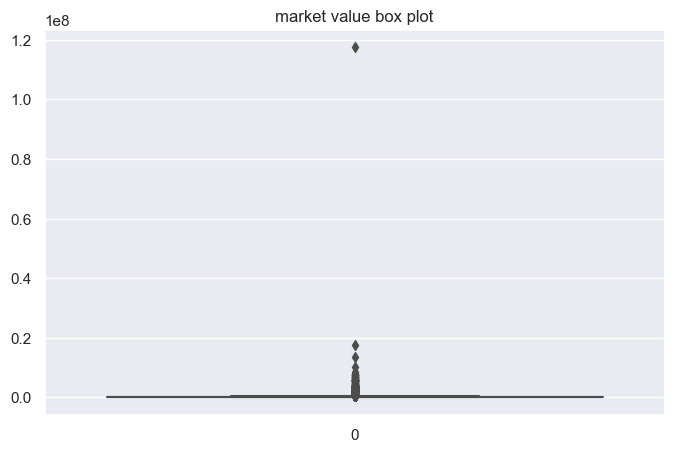

In [140]:
#cek outlier yg ekstrim pada data train
plt.figure(figsize=(8,5))
sns.boxplot(df_train['market_value'])
plt.title('market value box plot')

Dari Hasil EDA, kita melihat bahwa ada 1 properti dengan kategori Single Family yang memiliki nilai tinggi yang ekstrim dari yang lainnya --> yaitu 117,45 juta USD (outlier ekstrim atau anomali)

In [141]:
#dari gambar kita lihat tidak ada nilai market yang melebihi 20 juta USD kecuali satu rumah yng kita anggap sebagai outlier
df_train = df_train.drop(df_train[df_train['market_value']>20000000].index, axis=0)
df_test = df_test.drop(df_test[df_test['market_value']>20000000].index, axis=0)

Selain itu pada pemodelan kali ini kami berasumsi bahwa semua properti memiliki nilai market lebih besar dari 0 (`market_value` > 0) 

In [142]:
#nilai market_value <= 0 di drop (jika ada)
df_train = df_train.drop(df_train[df_train['market_value']<=0].index, axis=0)
df_test = df_test.drop(df_test[df_test['market_value']<=0].index, axis=0)

##### ii. `sale_date`

kita ubah dulu ke format datetime 

In [143]:
df_train['sale_date'] = pd.to_datetime(df_train['sale_date'])
df_test['sale_date'] = pd.to_datetime(df_test['sale_date'])

In [144]:
df_train['sale_year'] = df_train['sale_date'].dt.year
df_test['sale_year'] = df_test['sale_date'].dt.year

In [145]:
df_train[df_train['sale_year'] < 1944]

depth  exterior_condition  frontage  garage_spaces  \
304683   90.00                 4.0     14.00            0.0   
389697  100.00                 5.0     20.00            1.0   
380102  108.75                 4.0     18.08            1.0   
353610   60.00                 4.0     15.00            0.0   
264677  145.33                 4.0    127.06            1.0   
...        ...                 ...       ...            ...   
258050   45.00                 4.0     16.00            0.0   
51965    63.01                 4.0     23.50            0.0   
283113   85.00                 4.0     14.00            0.0   
78500    97.50                 4.0     15.50            0.0   
24993    66.00                 4.0     15.00            0.0   

        interior_condition  number_of_bathrooms  number_of_bedrooms  \
304683                 4.0                  1.0                 3.0   
389697                 5.0                  1.0                 3.0   
380102                 4.0                  1.0                 3.0   
353610                 4.0                  1.0                 3.0   
264677                 4.0                  0.0                 4.0   
...                    ...                  ...                 ...   
258050                 4.0                  1.0                 3.0   
51965                  4.0                  2.0                 4.0   
283113                 4.0                  1.0                 3.0   
78500                  4.0                  1.0                 4.0   
24993                  4.0                  1.0                 3.0   

        number_of_rooms  number_stories  sale_date street_name  total_area  \
304683              6.0             2.0 1940-07-27     MARSDEN     1260.00   
389697              6.0             2.0 1920-05-14   ARLINGTON     2000.00   
380102              6.0             2.0 1939-05-15     ROBBINS     1966.20   
353610              6.0             2.0 1920-04-30        21ST      900.00   
264677              8.0             3.0 1941-08-20      WARDEN    18465.00   
...                 ...             ...        ...         ...         ...   
258050              6.0             2.0 1943-01-01       ALTER      720.00   
51965               0.0             3.0 1938-06-01     BENEZET     1480.73   
283113              6.0             2.0 1943-01-01        09TH     1190.00   
78500               7.0             2.0 1926-10-19        16TH     1511.25   
24993               6.0             0.0 1935-02-18      SUMMER      990.00   

        total_livable_area year_built   zip_code zoning  \
304683              1104.0       1920  191352709   RSA5   
389697              1280.0       1965  191313117   RSA5   
380102              1158.0       1950  191492750   RSA5   
353610              1110.0       1920  191452821    RM1   
264677              2160.0       1945  191291417   RSD3   
...                    ...        ...        ...    ...   
258050               896.0       1923  191463005   RSA5   
51965               1717.0       1925  191183515   RSA3   
283113              1240.0       1925  191484521   RSA5   
78500               1688.0       1940  191403605    RM1   
24993                960.0     1920.0  191391232   RSA5   

                          owner_1                    owner_2  market_value  \
304683  EDWARD G RILEY             ANNA M                          84600.0   
389697  LORETTA G COLES TR FR      FAUSTINA COLES                  76900.0   
380102  THEODORE C MALCHMAN        ETHEL H MALCHMAN               122200.0   
353610  PRATICO DOMENICO           DALLAO BARBARA                  93700.0   
264677  MC KEEGAN THOMAS R         MARGARET ETAL                  444400.0   
...                           ...                        ...           ...   
258050  LOUIS HERNANDEZ S/M        LOUIS HERNANDEZ S/M            132800.0   
51965   GEORGE WOODWARD INC        GEORGE WOODWARD INC            361500.0   
283113  DONALD P IANNACE SR        MARIA           

Dari hasil EDA, kita hanya akan menggunakan data properti yang dijual di atas (atau sama dengan) tahun 1944 --> limitasi model

In [146]:
df_train = df_train[df_train['sale_year'] >= 1944]
df_test = df_test[df_test['sale_year'] >= 1944]

##### iii. `year_built`

Text(0.5, 1.0, 'median of market value (train data) based on year_built')

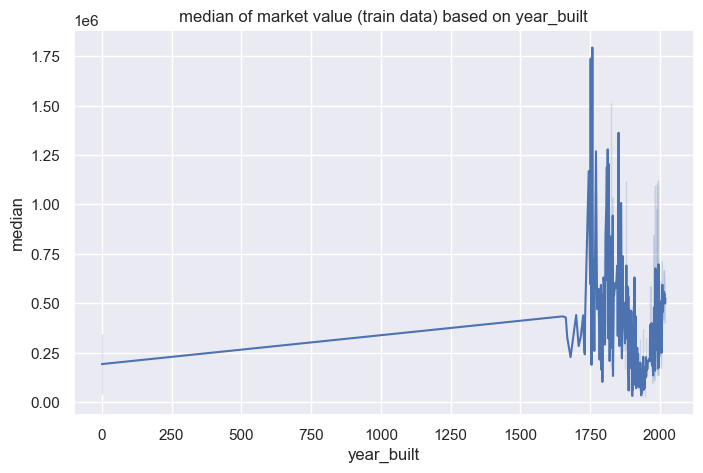

In [147]:
plt.figure(figsize=(8,5))
sns.lineplot(df_train.groupby(['year_built'])['market_value'].agg(['size', 'median']).reset_index(), x='year_built', y='median')
plt.title("median of market value (train data) based on year_built")

Text(0.5, 1.0, 'median of market value (train data) based on year_built')

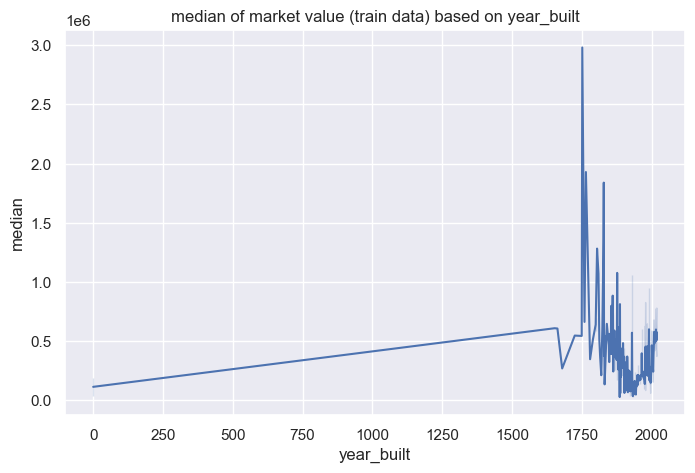

In [148]:
plt.figure(figsize=(8,5))
sns.lineplot(df_test.groupby(['year_built'])['market_value'].agg(['size', 'median']).reset_index(), x='year_built', y='median')
plt.title("median of market value (train data) based on year_built")

- Dari hasil EDA juga kita bisa melihat ada beberapa properti yang memiliki nilai 0 --> susah didefinisikan (dapat dilihat juga dari kedua grafik di atas) atau kita bisa anggap sebagai outlier
- Maka pada pemodelan ini, kami hanya menggunakan data properti yang tahun dibuat/dibangun nya **tidak sama dengan 0**


In [149]:
df_train = df_train[df_train['year_built'].astype(float)>0]
df_test = df_test[df_test['year_built'].astype(float)>0]

##### iv.  `number_of_bathrooms`, `number_stories`, `number_of_rooms`, `number_of_bedrooms`, `garage_spaces`, `frontage`

Dari hasil EDA kita dapatkan bahwa ada beberapa properti pada tipe Single Family yang nilai dari fitur  `number_of_bathrooms`, `number_stories`, `number_of_rooms`, `number_of_bedrooms`, `garage_spaces`, `frontage` merupakan outlier ekstrim, marik kita cek kembali summary nya

In [150]:
train_stats = df_train[['number_of_bathrooms', 'number_stories', 'number_of_rooms', 
          'number_of_bedrooms', 'garage_spaces', 'frontage']].describe(percentiles=[.25, .50, .75, .90, .995]).T.reset_index(names='column')
train_stats

column     count         mean            std  min    25%  \
0  number_of_bathrooms  366296.0     0.897130       0.600474  0.0   1.00   
1       number_stories  366296.0     1.745935       1.543778  0.0   2.00   
2      number_of_rooms  366296.0     4.588827       2.723882  0.0   3.00   
3   number_of_bedrooms  366296.0     2.408042       1.377466  0.0   2.00   
4        garage_spaces  366296.0     0.383777       0.678101  0.0   0.00   
5             frontage  366296.0  1200.234880  713828.348895  0.0  14.94   

    50%    75%    90%      99.5%          max  
0   1.0   1.00   1.00    3.00000         21.0  
1   2.0   2.00   3.00    4.00000         56.0  
2   6.0   6.00   7.00    9.00000         83.0  
3   3.0   3.00   4.00    5.00000         50.0  
4   0.0   1.00   1.00    2.00000         72.0  
5  16.0  19.92  31.67  119.39575  432026008.0

In [151]:
train_stats[train_stats['column']=='frontage']['99.5%'].values[0]

119.39575000000069

Catatan : kita akan gunakan nilai persentil ke 99.5% sebagai batas atas untuk melihat nilai outlier ekstrim agar data yang kita drop tidak terlalu banyak

In [152]:
for col in ['number_of_bathrooms', 'number_stories', 'number_of_rooms', 
          'number_of_bedrooms', 'garage_spaces', 'frontage'] :
    df_train = df_train.drop(df_train[df_train[col]> train_stats[train_stats['column']==col]['99.5%'].values[0]].index, axis=0)
    df_test = df_test.drop(df_test[df_test[col]> train_stats[train_stats['column']==col]['99.5%'].values[0]].index, axis=0)

##### v. `total_livable_area` dan `total_area`

Mari kita cek dulu nilai persenti ke 99.5% dari kedua kolom ini

In [153]:
area_stats = df_train[['total_livable_area', 'total_area']].describe(percentiles=[.25, .50, .75, .90, .995]).T.reset_index(names='column')
area_stats

column     count         mean          std  min      25%  \
0  total_livable_area  359753.0  1316.126679   474.900422  0.0  1056.00   
1          total_area  359753.0  1758.888473  2130.462656  0.0   857.46   

       50%     75%     90%     99.5%        max  
0  1212.00  1460.0  1824.0   3499.24   21737.00  
1  1229.89  1836.0  3290.0  12693.24  152388.73

<AxesSubplot: xlabel='total_area'>

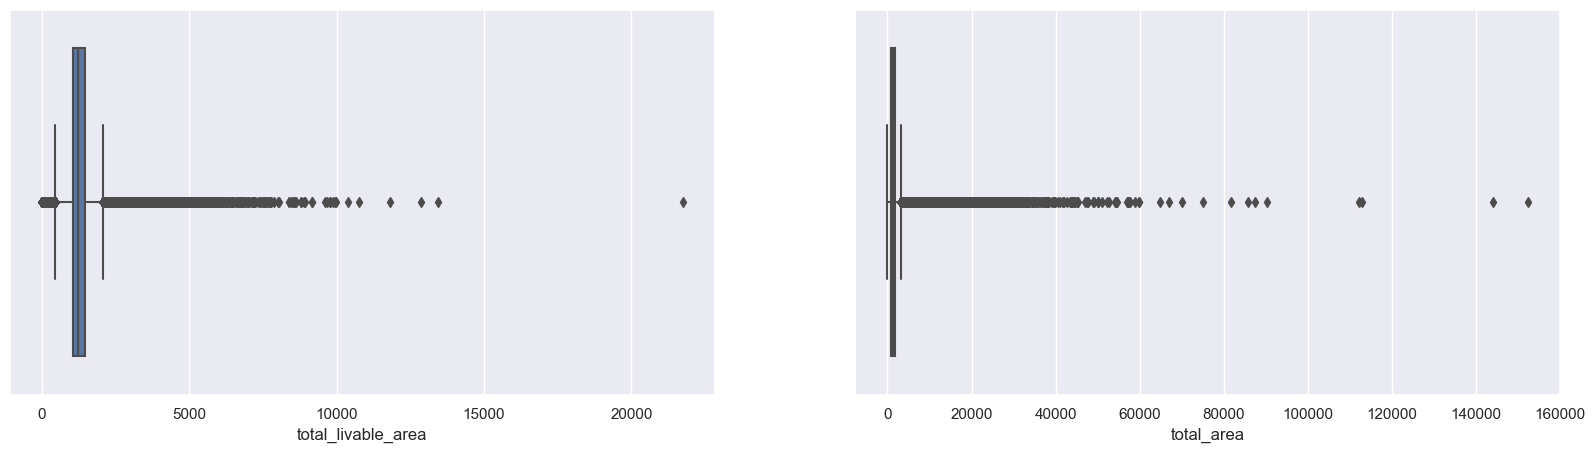

In [154]:
fig, axes = plt.subplots(1,2, figsize=(20,5))

sns.boxplot(ax=axes[0], x=df_train['total_livable_area'])
sns.boxplot(ax=axes[1], x=df_train['total_area'])

Jika dilihat dari tabel deskripsi statistik dan gambar di atas, maka ada beberapa poin yang kita dapatkan :

- 99.5% dari data yang ada memiliki luas bangunan (total_livable_area) dibawah 3883 sqft
- 99.5% dari data yang ada memiliki luas tanah (total_area) dibawah 12600 sqft
- Maka pada pemodelan ini, kami membatasi nilai kedua kolom/fitur ini dengan angka di atas, bisa kita anggap sebagai outliers ekstrim --> limitasi model

In [155]:
#total_livable_area outlier removal
df_train = df_train[df_train['total_livable_area']<=area_stats[area_stats['column']=='total_livable_area']['99.5%'].values[0]]
df_test = df_test[df_test['total_livable_area']<=area_stats[area_stats['column']=='total_livable_area']['99.5%'].values[0]]

In [156]:
#total_livable_area outlier removal
df_train = df_train[df_train['total_area']<=area_stats[area_stats['column']=='total_area']['99.5%'].values[0]]
df_test = df_test[df_test['total_area']<=area_stats[area_stats['column']=='total_area']['99.5%'].values[0]]

<AxesSubplot: xlabel='total_area'>

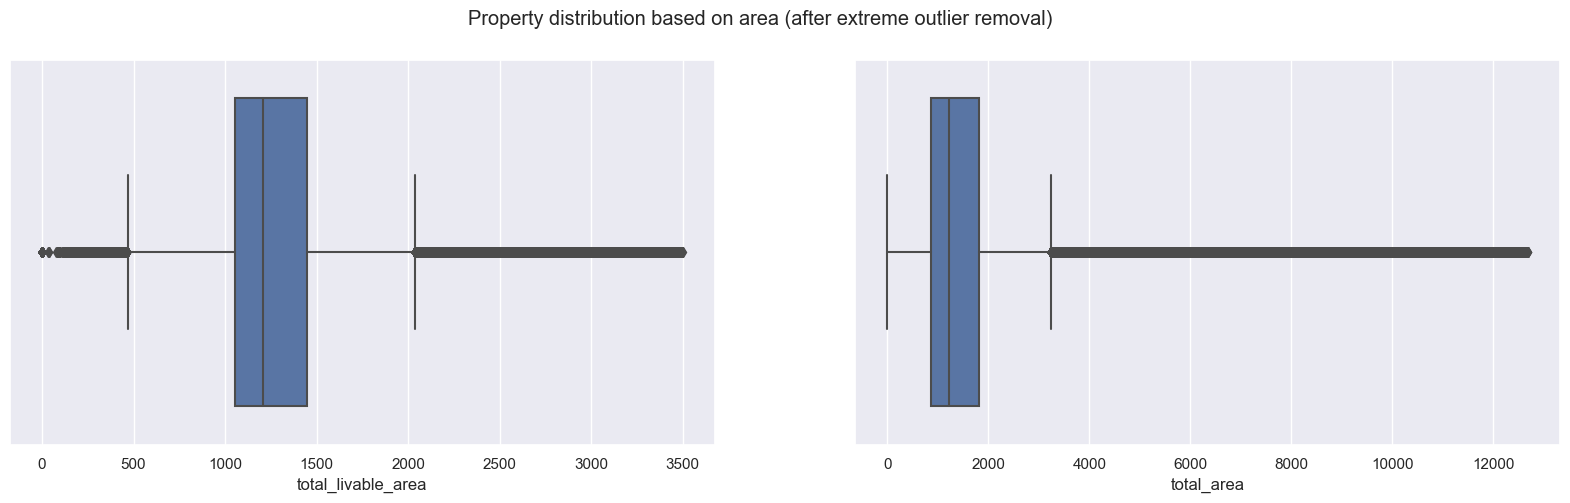

In [157]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
fig.suptitle('Property distribution based on area (after extreme outlier removal)')

sns.boxplot(ax=axes[0], x=df_train['total_livable_area'])
sns.boxplot(ax=axes[1], x=df_train['total_area'])

##### vi. `depth`

In [158]:
print("persentil 99.5% for depth : ", df_res['depth'].quantile(0.995))

persentil 99.5% for depth :  218.0


Text(0.5, 1.0, 'depth feature distribution')

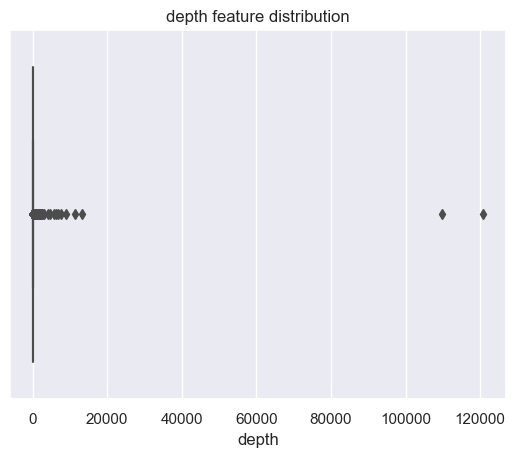

In [159]:
plt.figure()
sns.boxplot(x=df_train['depth'])
plt.title('depth feature distribution')

Sama seperti sebelumnya, kami akan mendrop nilai outlier ekstrim dari kolom `depth`

- 99.5% dari data yang ada memiliki nilai depth kurang dari 218 ft
- Pada pemodelan ini, kami hanya menggunakan data properti dengan depth kurang dari 218



In [160]:
#total_livable_area outlier removal
df_train = df_train[df_train['depth']<=df_res['depth'].quantile(0.995)]
df_test = df_test[df_test['depth']<=df_res['depth'].quantile(0.995)]

Text(0.5, 1.0, 'depth feature distribution (after extreme outlier removal)')

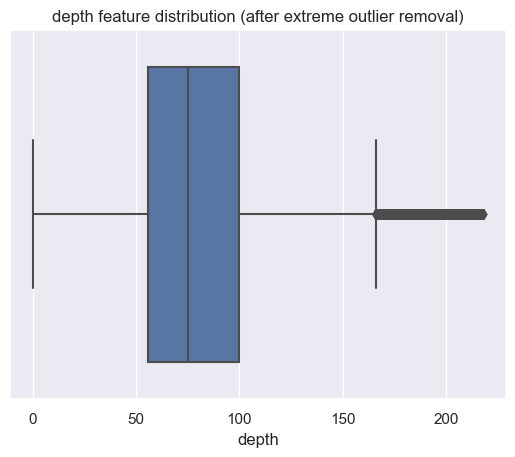

In [161]:
plt.figure()
sns.boxplot(x=df_train['depth'])
plt.title('depth feature distribution (after extreme outlier removal)')

### 2. Feature Engineering

#### 2.1 Feature Extraction

##### i. `region` dari kolom `zip_code`

In [162]:
df_train['zip_code']

480193    191111420
248476    191115303
355362    191381333
70966     191441319
337181    191432441
            ...    
87819     191302505
440969    191431411
373726    191435005
321162    191391418
156464    191344121
Name: zip_code, Length: 356006, dtype: object

Sesuai dengan penamaan kode pos di kota philadelpia (di EDA sudah dijelaskan juga) ada 48 kode pos unik yang terdiri dari 5 digit pertama[https://www.ciclt.net/sn/clt/capitolimpact/gw_ziplist.aspx?FIPS=42101]

Mari kita ekstrak terlebih dahulu 5 digit pertama dari kolom `zip_code`

In [163]:
#train
list_zip_train = []
for idx in df_train.index :    
    list_zip_train.append(re.findall(r'^[0-9]{5}', str(df_train.loc[idx, 'zip_code']))[0])
df_train['zip_code_5Digit'] = list_zip_train

#test
list_zip_test = []
for idx in df_test.index :    
    list_zip_test.append(re.findall(r'^[0-9]{5}', str(df_test.loc[idx, 'zip_code']))[0])
df_test['zip_code_5Digit'] = list_zip_test

In [164]:
df_train[['zip_code_5Digit']].value_counts()

zip_code_5Digit
19143              16477
19134              16096
19124              15041
19120              14908
19148              14623
19140              13371
19149              13203
19145              12949
19146              12703
19111              12495
19132              11785
19147               9851
19139               9627
19131               9111
19138               8870
19128               8740
19154               8405
19135               8015
19125               7789
19136               7677
19142               7619
19151               7459
19152               7186
19144               7163
19115               6936
19121               6895
19114               6872
19116               6469
19130               6449
19150               6449
19141               6218
19133               6193
19119               5819
19104               4354
19103               3985
19106               3883
19122               3827
19123               3484
19126               3096
19153    

Sebagai catatan : saat kami mencari kode pos dengan 5 digit tersebut ternyata terjadi perubahan kode pos untuk 19113 dan 19110  menjadi : 19113--> 19112 dan 19110 --> 19109.

Mari kita ganti

In [165]:
df_train.loc[df_train['zip_code_5Digit']=="19113", 'zip_code_5Digit'] = "19112"
df_train.loc[df_train['zip_code_5Digit']=="19110", 'zip_code_5Digit'] = "19109"

df_test.loc[df_test['zip_code_5Digit']=="19113", 'zip_code_5Digit'] = "19112"
df_test.loc[df_test['zip_code_5Digit']=="19110", 'zip_code_5Digit'] = "19109"

Karena ada 48 kode pos (5 digit) unik, kami akan mengelompokkan kode pos tersebut  sesuai region atau neigborhoods pada kota philadelpia.  

neighborhoods atau region di Philadelpia : https://en.wikipedia.org/wiki/List_of_Philadelphia_neighborhoods

![zip_code map](assets/zip_code.PNG)
sumber : [https://www.usmapguide.com/pennsylvania/philadelphia-zip-code-map/]

![region](assets/region.png)
sumber : [https://www.philageohistory.org/rdic-images/common/help/PhilaRegions.cfm]

- "northwest" = ["19118", "19119", "19127", "19128", "19129", "19138", "19144"]
- "center_city" = ["19102", "19103", "19106", "19107", "19109"]
- "south" = ["19112", "19145", "19146", "19147", "19148"]
- "west" = ["19104", "19131", "19139", "19151"]
- "southwest" = ["19142", "19143", "19153"]
- "north" = ["19120", "19121", "19122", "19123", "19125", "19126", "19130", "19132", "19133", "19134", "19137", "19140", "19141", "19150"]
- "northeast" = ["19111", "19114", "19115", "19116", "19124", "19135", "19136", "19149", "19152", "19154" ]


In [166]:
northwest = ["19118", "19119", "19127", "19128", "19129", "19138", "19144"]
center_city = ["19102", "19103", "19106", "19107", "19109"]
south = ["19112", "19145", "19146", "19147", "19148"]
west = ["19104", "19131", "19139", "19151"]
southwest = ["19142", "19143", "19153"]
north = ["19120", "19121", "19122", "19123", "19125", "19126", "19130", "19132", "19133", "19134", "19137", "19140", "19141", "19150"]
northeast = ["19111", "19114", "19115", "19116", "19124", "19135", "19136", "19149", "19152", "19154" ]

In [167]:
#Train
df_train.loc[df_train['zip_code_5Digit'].isin(northwest), 'region'] = "northwest"
df_train.loc[df_train['zip_code_5Digit'].isin(center_city), 'region'] = "center_city"
df_train.loc[df_train['zip_code_5Digit'].isin(south), 'region'] = "south"
df_train.loc[df_train['zip_code_5Digit'].isin(west), 'region'] = "west"
df_train.loc[df_train['zip_code_5Digit'].isin(southwest), 'region'] = "southwest"
df_train.loc[df_train['zip_code_5Digit'].isin(north), 'region'] = "north"
df_train.loc[df_train['zip_code_5Digit'].isin(northeast), 'region'] = "northeast"

#Test
df_test.loc[df_test['zip_code_5Digit'].isin(northwest), 'region'] = "northwest"
df_test.loc[df_test['zip_code_5Digit'].isin(center_city), 'region'] = "center_city"
df_test.loc[df_test['zip_code_5Digit'].isin(south), 'region'] = "south"
df_test.loc[df_test['zip_code_5Digit'].isin(west), 'region'] = "west"
df_test.loc[df_test['zip_code_5Digit'].isin(southwest), 'region'] = "southwest"
df_test.loc[df_test['zip_code_5Digit'].isin(north), 'region'] = "north"
df_test.loc[df_test['zip_code_5Digit'].isin(northeast), 'region'] = "northeast"

Text(0.5, 1.0, 'property distribution based on region (train data)')

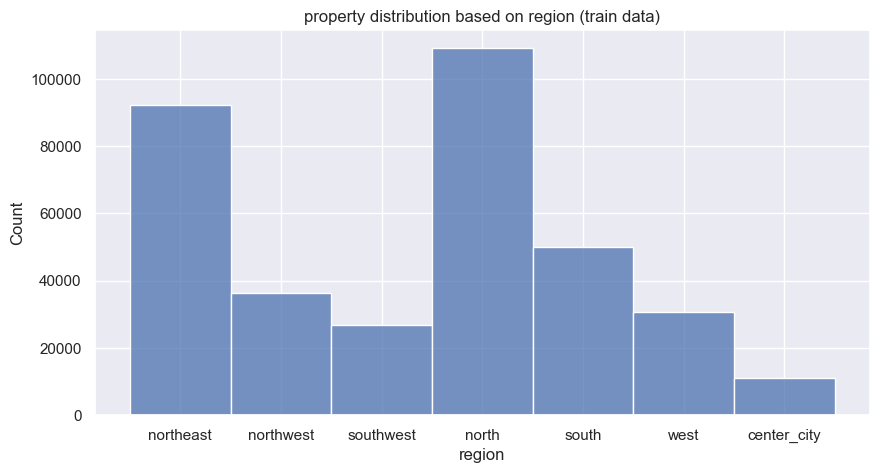

In [168]:
plt.figure(figsize=(10,5))
sns.histplot(df_train['region'])
plt.title("property distribution based on region (train data)")

<AxesSubplot: xlabel='region', ylabel='market_value'>

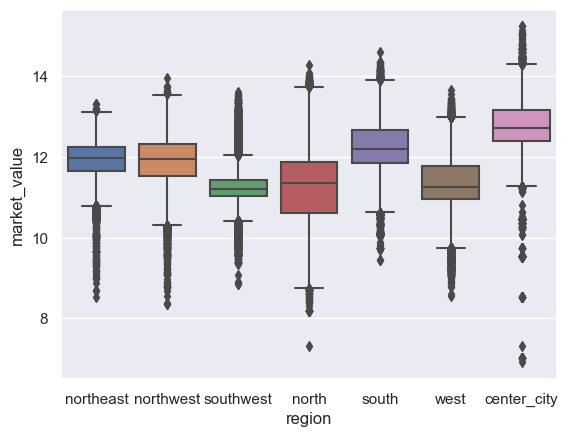

In [169]:
sns.boxplot(x=df_train['region'], y=np.log(df_train['market_value']))

Text(0.5, 1.0, 'property distribution based on region (test data)')

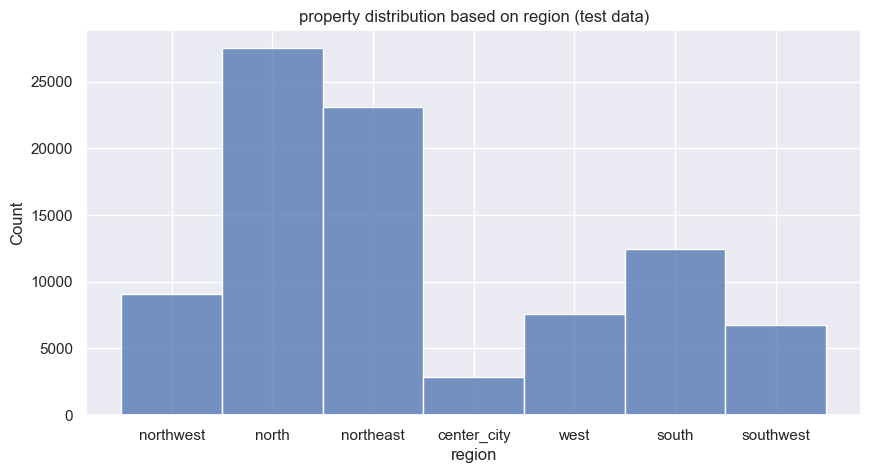

In [170]:
plt.figure(figsize=(10,5))
sns.histplot(df_test['region'])
plt.title("property distribution based on region (test data)")

Selanjutnya kita drop kolom `zip_code` dan `zip_code_5Digit`

In [171]:
df_train = df_train.drop(['zip_code', 'zip_code_5Digit'], axis=1)
df_test = df_test.drop(['zip_code', 'zip_code_5Digit'], axis=1)

##### ii. `sale_quarter` dari kolom `sale_date`

In [172]:
df_train['sale_quarter'] = df_train['sale_date'].dt.quarter
df_test['sale_quarter'] = df_test['sale_date'].dt.quarter

<AxesSubplot: xlabel='sale_quarter', ylabel='median'>

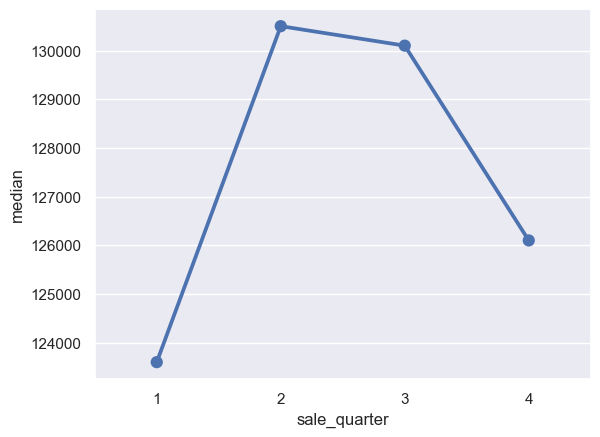

In [173]:
sns.pointplot(df_train.groupby(['sale_quarter'])['market_value'].median().reset_index(name='median'), x='sale_quarter', y='median')

##### iii. `new_zoning` dari kolom `zoning`

In [174]:
df_train['zoning'].value_counts()

RSA5     198630
RM1       63525
RSA3      40320
RSA4       8883
RSA2       8622
RSD3       8101
CMX2       4056
RM2        3909
CMX3       3256
RM4        2548
CMX5       1850
CMX4       1682
RTA1       1379
RMX3       1378
I2          941
RM3         902
RMX1        887
CMX1        842
RSD1        822
RSD2        811
ICMX        701
RSA1        664
CMX25       452
IRMX        239
I1          146
RMX2        142
CA2         115
CA1          80
I3           49
SPINS        30
SPPOA        29
CMX2.        12
RSA           2
IP            1
Name: zoning, dtype: int64

selanjutnya kita akan ekstrak zoning sesuai dengan kategori utamanya saja (misalkan CMX2 dan CMX3 masuk ke CMX)

In [175]:
#ekstrak penamaan sesuai zoning. contoh CMX2 --> CMX dst.
df_train['new_zoning'] = df_train['zoning'].str.extract(r"(\s*[^0-9+\s*]+)", expand=True)
df_test['new_zoning'] = df_test['zoning'].str.extract(r"(\s*[^0-9+\s*]+)", expand=True)

In [176]:
df_train['new_zoning'].value_counts()

RSA      257121
RM        70884
CMX       12150
RSD        9734
RMX        2407
RTA        1379
I          1136
ICMX        701
IRMX        239
CA          195
SPINS        30
SPPOA        29
IP            1
Name: new_zoning, dtype: int64

Selanjutnya kami akan mengelompokkan lagi kategori di atas menjadi 3 kategori yaitu : 

- single-family house : "RSD", "RSA"
- multi-family house : "RTA", "RM"
- commercial-industrial-specialpurpose : "CMX", "RMX", "CA", "IRMX", "ICMX", "I", "IP", "SPINS", "SPPOA" 

In [177]:
#train
df_train.loc[df_train['new_zoning'].isin(["RSD", "RSA"]), 'new_zoning'] = 'single-family-house'
df_train.loc[df_train['new_zoning'].isin(["RTA", "RM"]), 'new_zoning'] = 'multi-family-house'
df_train.loc[df_train['new_zoning'].isin(["CMX", "RMX", "CA", "IRMX", "ICMX", "I", "IP","SPINS", "SPPOA"]), 'new_zoning'] = 'commercial-industrial-specialpurpose'

#test
df_test.loc[df_test['new_zoning'].isin(["RSD", "RSA"]), 'new_zoning'] = 'single-family-house'
df_test.loc[df_test['new_zoning'].isin(["RTA", "RM"]), 'new_zoning'] = 'multi-family-house'
df_test.loc[df_test['new_zoning'].isin(["CMX", "RMX", "CA", "IRMX", "ICMX", "I", "IP","SPINS", "SPPOA"]), 'new_zoning'] = 'commercial-industrial-specialpurpose'


Text(0.5, 1.0, 'property distribution based on new_zoning')

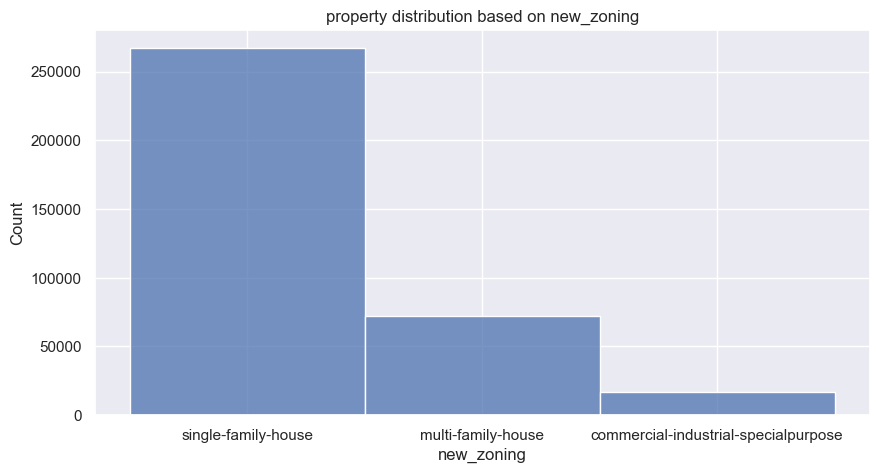

In [178]:
plt.figure(figsize=(10,5))
sns.histplot(df_train['new_zoning'])
plt.title('property distribution based on new_zoning')

Selanjutnya kita drop kolom `zoning`

In [179]:
df_train = df_train.drop('zoning', axis=1)
df_test = df_test.drop('zoning', axis=1)

In [180]:
df_train.head()

depth  exterior_condition  frontage  garage_spaces  \
480193  121.00                 4.0     24.75            1.0   
248476  112.50                 4.0     26.41            0.0   
355362   71.40                 4.0     19.91            1.0   
70966   119.45                 4.0     14.00            0.0   
337181   87.00                 4.0     16.00            0.0   

        interior_condition  number_of_bathrooms  number_of_bedrooms  \
480193                 4.0                  0.0                 0.0   
248476                 4.0                  0.0                 0.0   
355362                 4.0                  1.0                 3.0   
70966                  4.0                  1.0                 3.0   
337181                 4.0                  1.0                 3.0   

        number_of_rooms  number_stories  sale_date  ... total_area  \
480193              0.0             2.0 2001-08-28  ...    3099.00   
248476              0.0             2.0 1977-08-31  ...    2971.12   
355362              6.0             2.0 2004-08-24  ...    1421.57   
70966               6.0             2.0 1972-08-02  ...    1672.30   
337181              6.0             0.0 2019-05-17  ...    1392.00   

        total_livable_area  year_built                    owner_1  \
480193              1386.0        1967  SHIELDS JOHN                
248476              1200.0        1935  LAUREL A TINNEY             
355362              1304.0        1930  SMITH ROSA LEE              
70966               1070.0        1925  LEIGH DORIS                 
337181              1200.0        1925  TOWER EQUITY LLC            

                          owner_2 market_value  sale_year     region  \
480193  ACHUFF HELENE                 234300.0       2001  northeast   
248476  LAUREL A TINNEY               135000.0       1977  northeast   
355362  SMITH ROSA LEE                118900.0       2004  northwest   
70966   LEIGH DORIS                    61300.0       1972  northwest   
337181  TOWER EQUITY LLC               84700.0       2019  southwest   

       sale_quarter           new_zoning  
480193            3  single-family-house  
248476            3  single-family-house  
355362            3  single-family-house  
70966             3  single-family-house  
337181            2   multi-family-house  

[5 rows x 21 columns]

#### 2.2 Feature construction or creation

##### i. `overall_condition`

fitur `overall_condition` merupakan fitur yang menjelaskan tentang kondisi rumah secara keseluruhan baik interior maupun eksteriornya dengan ketentuan :

- Jika nilai interior_condition dan exterior_condition nya berbeda, maka akan diambil nilai average nya (dibulatkan ke atas)

In [181]:
df_train['overall_condition'] = (df_train['interior_condition'] + df_train['exterior_condition'])/2
df_train['overall_condition'] = df_train['overall_condition'].astype(int)

df_test['overall_condition'] = (df_test['interior_condition'] + df_test['exterior_condition'])/2
df_test['overall_condition'] = df_test['overall_condition'].astype(int)

In [182]:
df_train['overall_condition'].value_counts()

4    295262
3     29308
5      9627
2      8653
1      7700
7      3540
6      1723
0       193
Name: overall_condition, dtype: int64

In [183]:
df_train.groupby(['overall_condition'])['market_value'].median().reset_index()

overall_condition  market_value
0                  0      316000.0
1                  1      427750.0
2                  2      241300.0
3                  3      265400.0
4                  4      121400.0
5                  5       47800.0
6                  6       32300.0
7                  7       15800.0

Text(0.5, 1.0, 'median market value based on property condition')

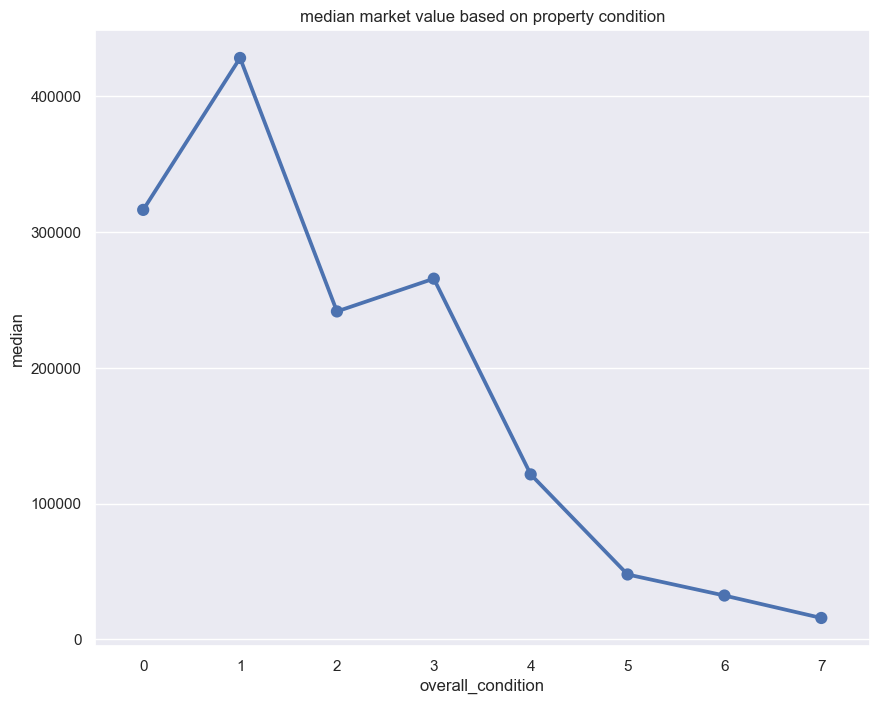

In [184]:
plt.figure(figsize=(10,8))
sns.pointplot(df_train.groupby('overall_condition')['market_value'].median().reset_index(name='median'), x='overall_condition', y='median')
plt.title('median market value based on property condition')

Dari sini terlihat jelas bahwa makin tinggi nilai overall_condition makin kecil nilai median dari market_value tersebut. Karena urutan nilai dari kondisi properti pada dataset ini "terbalik", sehingga nilai market_value memiliki korelasi yang negatif dengan kondisi properti 

##### ii. `property_age`

Melansir dari sumber data properti philadelpia [https://opendataphilly.org/datasets/philadelphia-properties-and-assessment-history/],  kita lihat data ini dibuat pada oktober 2020. Artinya kita bisa asumsikan semua data properti dicatat pada tahun yang sama juga, sehingga kita bisa membaut fitur baru `property_age` yaitu umur properti (sampai dengan tahun 2020)

In [185]:
df_train['property_age'] = 2020 - df_train['year_built'].astype(int)
df_test['property_age'] = 2020 - df_test['year_built'].astype(int)

Text(0.5, 1.0, 'median market value vs property_age')

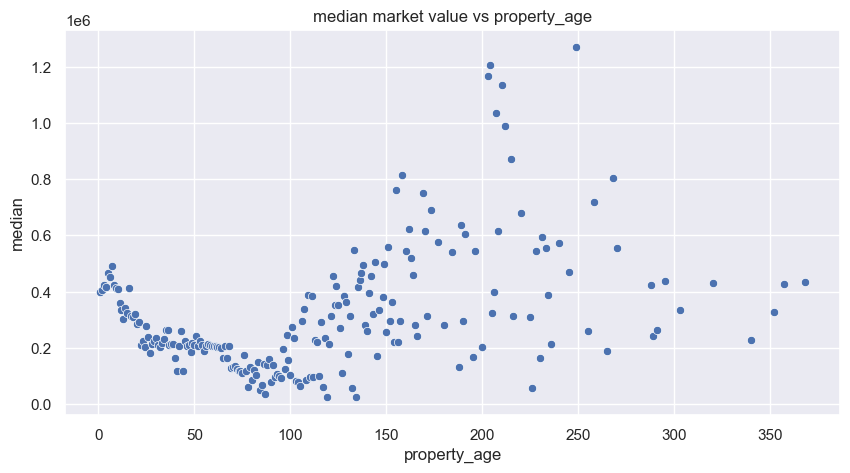

In [186]:
plt.figure(figsize=(10,5))
sns.scatterplot(df_train.groupby(['property_age'])['market_value'].median().reset_index(name='median'), x='property_age', y='median')
plt.title('median market value vs property_age')

##### iii. `year_sale_built_gap`

Seperti yang dijelaskan pada tahap EDA, kita bisa memuat fitu baru yaitu `year_sale_built_gap` , **Disini kami definisikan `year_sale_built_gap` ini sebagai `year_sale` - `year_built`, dengan asumsi properti harusnya selesai dibuat/dibangun baru dijual**

In [187]:
df_res['sale_date'] = pd.to_datetime(df_res['sale_date'])
df_res['sale_year'] = df_res['sale_date'].dt.year

In [188]:
df_train['year_sale_built_gap'] = df_train['sale_year']- df_train['year_built'].astype(int)
df_test['year_sale_built_gap'] = df_test['sale_year'] - df_test['year_built'].astype(int)

In [189]:
df_train[df_train['year_sale_built_gap'] < 0].shape[0]/len(df_train)

0.007991438346544722

- Jika kita lihat pada data train hanya ada 0.008% yang nilai 'year_sale_built_gap' nya negatif. Dengan kata lain sangat sedikit bangunan yang dijual terlebih dahulu baru dibuat/dibangun setelahnya. Kita akan anggap ini sebagai outlier dan akan mendrop kondisi ini. 

Artinya model yang kami bangun hanya akan menggunakan data properti yang tahun dijual nya lebih besar sama dengan dari tahun dibangun nya (`year_sale_built_gap` > 0)

In [190]:
df_train = df_train.drop(df_train[df_train['year_sale_built_gap']<0].index, axis=0)
df_test = df_test.drop(df_test[df_test['year_sale_built_gap']<0].index, axis=0)

Mari kita korelasi antara nilai median market_value dengan `year_sale_built_gap`

Text(0.5, 1.0, 'median market value vs year_sale_built_gap')

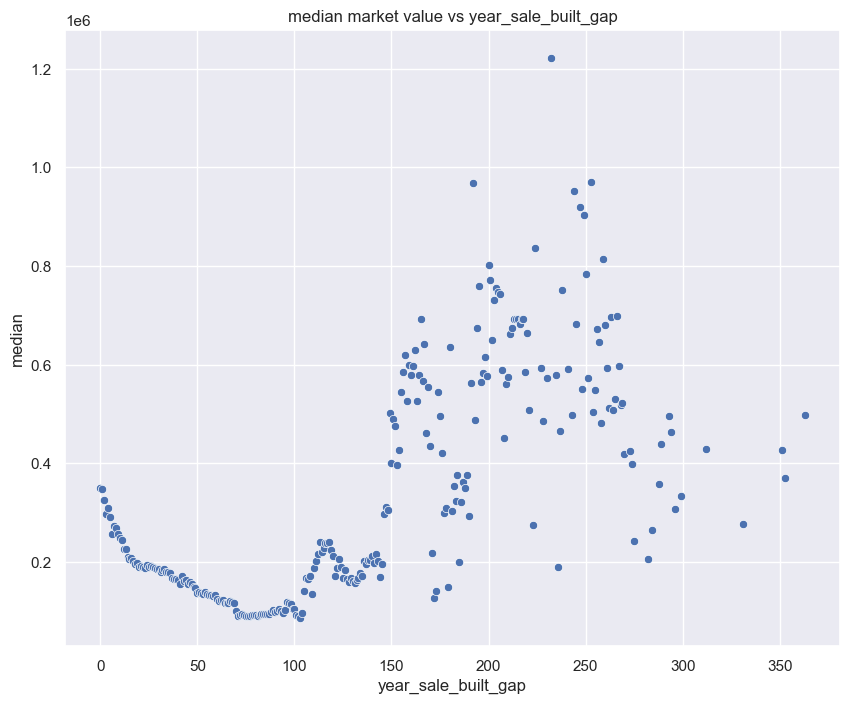

In [191]:
plt.figure(figsize=(10,8))
sns.scatterplot(df_train.groupby('year_sale_built_gap')['market_value'].median().reset_index(name='median'), x='year_sale_built_gap', y='median')
plt.title('median market value vs year_sale_built_gap')

##### iv. `total_rooms`

Selanjutnya kita bisa membuat fitur baru yaitu `total_rooms` yaitu total ruangan yang ada pada properti tersebut.

In [192]:
df_train['total_rooms'] = df_train['number_of_rooms'] + df_train['number_of_bathrooms'] + df_train['number_of_bedrooms']
df_test['total_rooms'] = df_test['number_of_rooms'] + df_test['number_of_bathrooms'] + df_test['number_of_bedrooms']

Text(0.5, 1.0, 'median market value vs total_rooms')

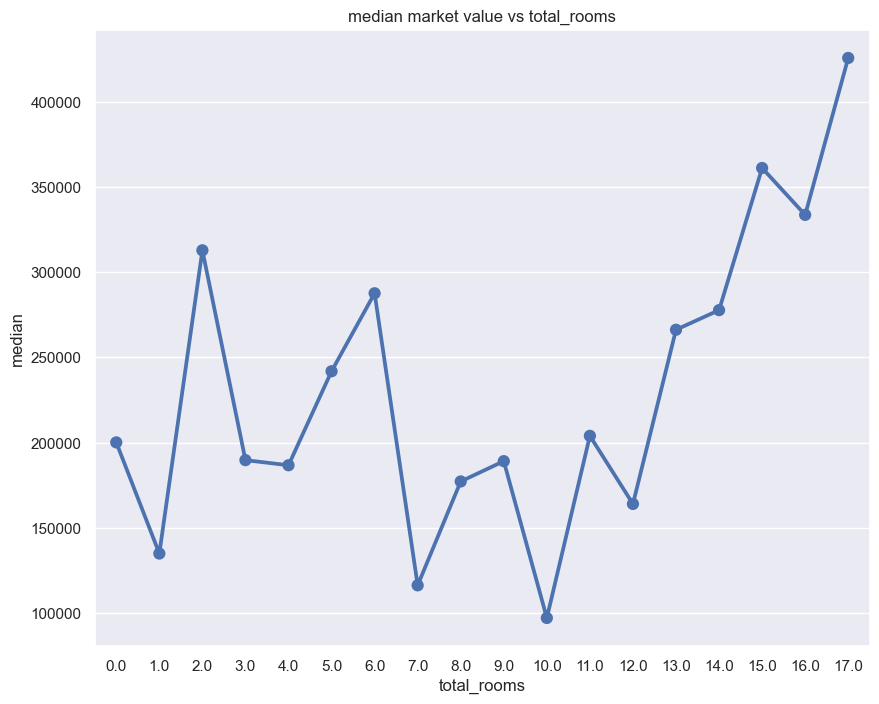

In [193]:
plt.figure(figsize=(10,8))
sns.pointplot(df_train.groupby('total_rooms')['market_value'].median().reset_index(name='median'), x='total_rooms', y='median')
plt.title('median market value vs total_rooms')

##### v. `is_there_a_garage`

Fitur ini menunjukkan apakah properti tersebut memiliki garasi atau tidak dengan keterangan

- 0 --> tidak ada garasi
- 1 --> ada garasi

In [194]:
#train
df_train.loc[df_train['garage_spaces'] == 0,'is_there_a_garage'] = 0
df_train.loc[df_train['garage_spaces'] > 0,'is_there_a_garage'] = 1

#test
df_test.loc[df_test['garage_spaces'] == 0,'is_there_a_garage'] = 0
df_test.loc[df_test['garage_spaces'] > 0,'is_there_a_garage'] = 1

Text(0.5, 1.0, 'median market value based on there a garage or not')

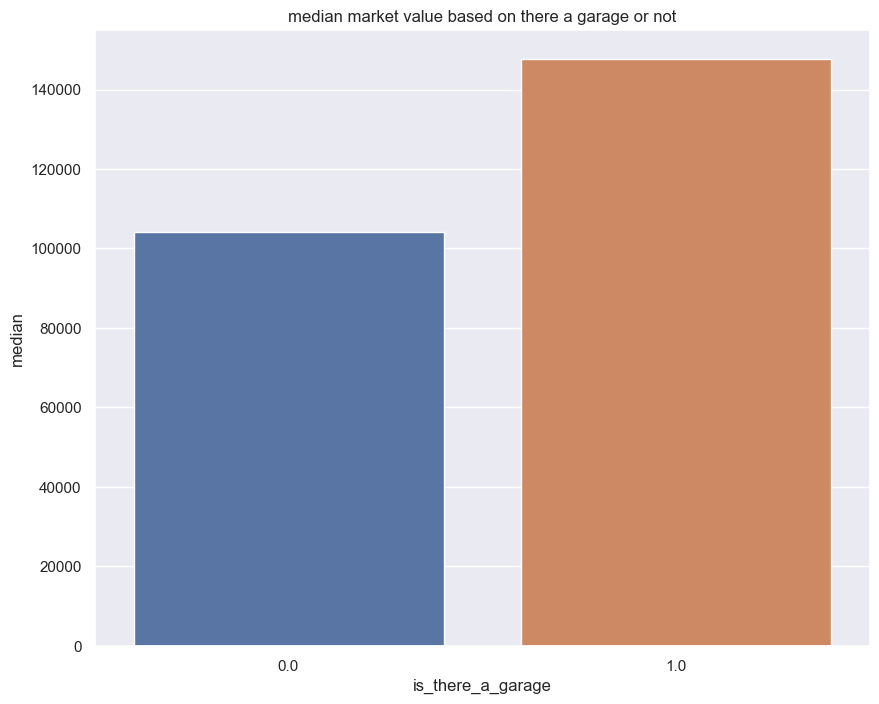

In [195]:
plt.figure(figsize=(10,8))
sns.barplot(df_train.groupby('is_there_a_garage')['market_value'].median().reset_index(name='median'), x='is_there_a_garage', y='median')
plt.title('median market value based on there a garage or not')

properti yang memiliki garasi cenderung memiliki harga yang lebih tinggi

##### vi. `is_oneFloor`

Fitur ini menunjukkan apakah properti tersebut bertingkat atau tidak dengan keterangan

- 0 --> tidak bertingkat
- 1 --> bertingkat

In [196]:
#train
df_train.loc[df_train['number_stories'] == 0, 'is_oneFloor'] = 0
df_train.loc[df_train['number_stories'] > 0, 'is_oneFloor'] = 1

#test
df_test.loc[df_test['number_stories'] == 0, 'is_oneFloor'] = 0
df_test.loc[df_test['number_stories'] > 0, 'is_oneFloor'] = 1

Text(0.5, 1.0, 'median market value based on one Floor or not')

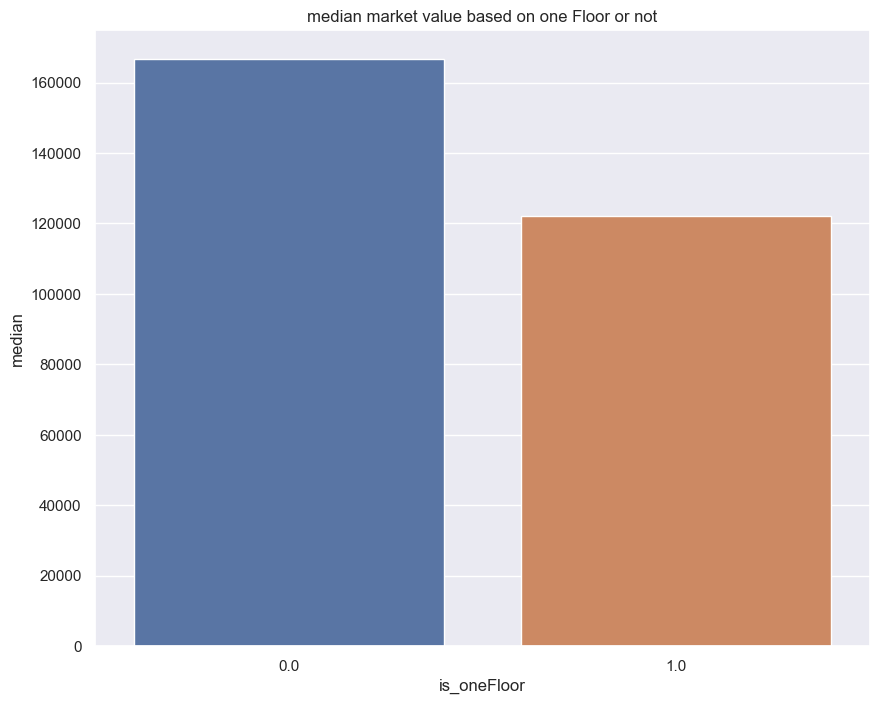

In [197]:
plt.figure(figsize=(10,8))
sns.barplot(df_train.groupby('is_oneFloor')['market_value'].median().reset_index(name='median'), x='is_oneFloor', y='median')
plt.title('median market value based on one Floor or not')

properti yang memiliki 1 lantai (tidak bertingkat) cenderung memiliki harga yang lebih tinggi

##### vii. `is_singleOwner`

Fitur ini menunjukkan apakah properti tersebut atas nama 1 orang (pemilik tunggal) atau tidak

- 0 --> tidak pemilik tunggal
- 1 --> pemilik tunggal 

In [198]:
#train
df_train.loc[(df_train['owner_1']==df_train['owner_2']), 'is_singleOwner'] = 1
df_train.loc[(df_train['owner_1']!=df_train['owner_2']), 'is_singleOwner'] = 0

#test
df_test.loc[(df_test['owner_1']==df_test['owner_2']), 'is_singleOwner'] = 1
df_test.loc[(df_test['owner_1']!=df_test['owner_2']), 'is_singleOwner'] = 0

Text(0.5, 1.0, 'median market value based on single Owner or not')

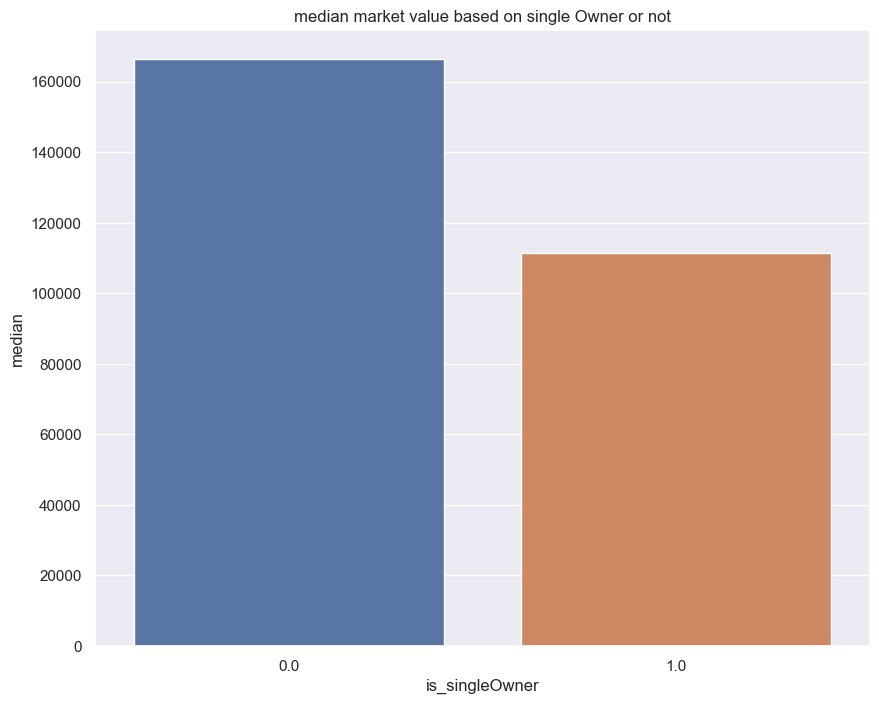

In [199]:
plt.figure(figsize=(10,8))
sns.barplot(df_train.groupby('is_singleOwner')['market_value'].median().reset_index(name='median'), x='is_singleOwner', y='median')
plt.title('median market value based on single Owner or not')

properti yang memiliki dua nama pemilik (tidak tunggal) cenderung nilai market nya lebih tinggi

### 3. Drop Columns

In [200]:
columns_to_drop = ['sale_year', 'year_built', 'garage_spaces', 'sale_date', 
                   'street_name', 'owner_1', 'owner_2', 'exterior_condition', 
                    'interior_condition', 'number_stories']

In [201]:
df_train = df_train.drop(columns_to_drop, axis=1)
df_test = df_test.drop(columns_to_drop, axis=1)

### Data akhir (Data yang sudah "bersih")

In [202]:
# Cek info lebih detail untuk setiap fitur untuk data yang sudah bersih (data train)
listItem = []

for col in df_train.columns:
    listItem.append([col, df_train[col].dtype, df_train[col].isna().sum(), round((df_train[col].isna().sum()/len(df_train[col]))*100, 2),
                    df_train[col].nunique(), list(df_train[col].drop_duplicates().sample(2).values)])

df_train_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)

df_train_desc

dataFeatures dataType  null  nullPct  unique  \
0                 depth  float64     0      0.0   12841   
1              frontage  float64     0      0.0    5887   
2   number_of_bathrooms  float64     0      0.0       4   
3    number_of_bedrooms  float64     0      0.0       6   
4       number_of_rooms  float64     0      0.0      10   
5            total_area  float64     0      0.0   62156   
6    total_livable_area  float64     0      0.0    3159   
7          market_value  float64     0      0.0    8824   
8                region   object     0      0.0       7   
9          sale_quarter    int64     0      0.0       4   
10           new_zoning   object     0      0.0       3   
11    overall_condition    int32     0      0.0       8   
12         property_age    int32     0      0.0     214   
13  year_sale_built_gap    int64     0      0.0     275   
14          total_rooms  float64     0      0.0      18   
15    is_there_a_garage  float64     0      0.0       2   
16          is_oneFloor  float64     0      0.0       2   
17       is_singleOwner  float64     0      0.0       2   

                                 uniqueSample  
0                             [176.27, 60.38]  
1                                [17.29, 8.1]  
2                                  [1.0, 2.0]  
3                                  [3.0, 1.0]  
4                                  [8.0, 4.0]  
5                          [1407.69, 1209.92]  
6                             [842.0, 1323.0]  
7                         [66700.0, 550600.0]  
8                              [north, south]  
9                                      [2, 1]  
10  [single-family-house, multi-family-house]  
11                                     [6, 5]  
12                                   [81, 42]  
13                                   [82, 68]  
14                                [16.0, 9.0]  
15                                 [1.0, 0.0]  
16                                 [0.0, 1.0]  
17                                 [1.0, 0.0]

In [203]:
## Berikut nilai median market value properti pada data train :
df_train['market_value'].median()

127200.0

In [204]:
print('ukuran data awal/mentah (semua kategori properti) : ', df_raw.shape)
print('ukuran data awal/mentah (hanya kategori single family/residentials) : ', df_raw[df_raw['category_code_description']=='Single Family'].shape)

ukuran data awal/mentah (semua kategori properti) :  (581456, 75)
ukuran data awal/mentah (hanya kategori single family/residentials) :  (461573, 75)


In [205]:
print('ukuran data yang bersih yang akan kita gunakan dalam pemodelan')
print('train data :', df_train.shape)
print('test data :', df_test.shape)
print('total data yang bersih : ', df_train.shape[0] + df_test.shape[0])

ukuran data yang bersih yang akan kita gunakan dalam pemodelan
train data : (353161, 18)
test data : (88617, 18)
total data yang bersih :  441778


Sekali lagi kita cek rentang harga properti yang akan kita gunakan untuk melatih model

In [206]:
print("Nilai tertinggi market value :", df_train['market_value'].max())
print("Nilai terendah market value :", df_train['market_value'].min())

Nilai tertinggi market value : 4160000.0
Nilai terendah market value : 1000.0


- Perlu dicatat kembali, data properti yang kita gunakan hanya dari kategori single family/residentials
- Di terakhir, data yang akan kita gunakan di pemodelan (data bersih) ada 441778 baris dari total 461573 baris awal (kategori single family), atau sekitar 4.2 % baris yang kami drop sesuai dengan asumsi, batasan data yang disampaikan di proses EDA dan Preprocessing. 
- Selain itu dari feature engineering kami membuat atau mengekstrak 10 fitur baru yaitu 
New Features :  `property_age`, `sale_quarter`, `new_zoning`, `overall_condition`, `year_sale_built_gap`, `total_rooms`, 
                `is_there_a_garage`, `is_oneFloor`, `is_singleOwner`, `region`

Selain itu sebagai catatan juga, kami merangkum beberapa batasan data yang kita gunakan dalam pemodelan kali ini (dari hasil EDA dan preproceesing) :

- Harga market value pada rentang 1,000 USD - 4,160,000 USD dengan kategori Single Family/Residentials di kota Philadelpia
- Tahun dijual properti >= 1944. Alasannya karena fluktuasi harga yang tinggi pada rentang tahun < 1944 (tepatnya 1920-1944) dan juga karena efek PD1 dan PD2 (anomali)
- Tahun dibangun/dibuat dari properti tersebut harus lebih besar dari nol (> 0)
- Kami hanya menggunakan data properti yang dimana bangunan nya ada dulu baru dijual (atau year sale > year built nya)
- Total luas tanah pada rentang 0-12600 sqft atau 0-1170.5 m2
- Total luas bangunan/properti pada rentang 0-3883 sqft atau 0-360.7 m2
- Ketinggian tanah properti dari jalan (fitur depth) pada rentang 0-218 ft  atau 0-66 meter
- Jarak halaman depan dengan batas jalan pada rentang 0- 119ft atau 36 meter
- Jumlah kamar, kamar tidur, dan kamar mandi masing-masing pada rentang 0-7 kamar, 0-5 kamar tidur, dan 0-3 kamar mandi

# MODELLING

In [207]:
# Import library untuk modeling
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, KFold, HalvingRandomSearchCV

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, mean_squared_log_error, make_scorer

### Data Transformation --> Scaling (numeric) and encoding (category)

Agar dapat menggunakan semua fitur yang dipilih, maka fitur-fitur kategorikal harus diubah menjadi fitur numerikal. Kita dapat menggunakan ColumnTransformer untuk dapat mengubah tipe datanya (untuk data kategori), yang mana nanti dapat diaplikasikan pada pipeline model. Sedangkan untuk data numerik saya akan lakukan scaling dengan standard scaler

In [208]:
#Data Numerik
numeric_features = ['depth', 'frontage', 'number_of_bathrooms', 'number_of_bedrooms', 'number_of_rooms',
                        'total_area', 'total_livable_area', 'property_age', 'year_sale_built_gap', 
                        'total_rooms', 'overall_condition']


#Data Kategori
# Mengubah fitur kategorikal menjadi numerikal dan standard scaler untuk fitur numerical
transformer = ColumnTransformer([
    ('scaler', StandardScaler(), numeric_features),
    ('one hot', OneHotEncoder(sparse=False), ['sale_quarter', 'is_there_a_garage', 'is_oneFloor', 'is_singleOwner', 'new_zoning']),
    ('binary', ce.BinaryEncoder(return_df=True), ['region'])
], remainder='passthrough')


### Data Train and Test

In [210]:
#train
X_train = df_train.drop(['market_value'], axis=1)
y_train = df_train['market_value']

#test
X_test = df_test.drop(['market_value'], axis=1)
y_test = df_test['market_value']

### Models Comparison

In [ ]:
# Define algoritma yang digunakan
# lr = LinearRegression()
# knn = KNeighborsRegressor()
# sgd = SGDRegressor(random_state=1)
# svr = SVR(kernel='rbf')
# lasso = Lasso(random_state=1)
# dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)
lgbm = LGBMRegressor(random_state=1)
# mlp = MLPRegressor(random_state=1, max_iter=500)


# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
# log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
# log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
# log_sgd = TransformedTargetRegressor(sgd, func=np.log, inverse_func=np.exp)
# log_svr = TransformedTargetRegressor(svr, func=np.log, inverse_func=np.exp)
# log_lasso = TransformedTargetRegressor(lasso, func=np.log, inverse_func=np.exp)
# log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)
log_lgbm = TransformedTargetRegressor(lgbm, func=np.log, inverse_func=np.exp)
# log_mlp= TransformedTargetRegressor(mlp, func=np.log, inverse_func=np.exp)


# Kandidat algoritma
models = [log_rf, log_xgb, log_lgbm]

def model_benchmarking (models, X, y) : 
    score_r2 = []
    nilai_mean_r2 = []
    nilai_std_r2 = []

    score_mae = []
    nilai_mean_mae = []
    nilai_std_mae = []

    score_mape = []
    nilai_mean_mape = []
    nilai_std_mape = []

    score_rmsle = []
    nilai_mean_rmsle = []
    nilai_std_rmsle = []

    cv_duration = []

    # Mencari algoritma terbaik berdasarkan tiap metrics
    for i in models:

        #time
        start_time = time.time() 
        
        crossval = KFold(n_splits=5, shuffle=True, random_state=1)
            

        estimator = Pipeline([
            ('preprocessing', transformer),
            ('model', i)
        ])

        #R Squared
        model_cv_r2 = cross_val_score(
            estimator, 
            X, 
            y, 
            cv=crossval, 
            scoring='r2', 
            error_score='raise'
            )

        print(model_cv_r2, i)

        score_r2.append(model_cv_r2)
        nilai_mean_r2.append(model_cv_r2.mean())
        nilai_std_r2.append(model_cv_r2.std())

        # MAE
        model_cv_mae = cross_val_score(
            estimator, 
            X, 
            y, 
            cv=crossval, 
            scoring='neg_mean_absolute_error', 
            error_score='raise'
            )

        print(model_cv_mae, i)

        score_mae.append(model_cv_mae)
        nilai_mean_mae.append(model_cv_mae.mean())
        nilai_std_mae.append(model_cv_mae.std())

        # MAPE
        model_cv_mape = cross_val_score(
            estimator, 
            X, 
            y, 
            cv=crossval, 
            scoring='neg_mean_absolute_percentage_error', 
            error_score='raise'
            )

        print(model_cv_mape, i)

        score_mape.append(model_cv_mape)
        nilai_mean_mape.append(model_cv_mape.mean())
        nilai_std_mape.append(model_cv_mape.std())

        # RMSLE

        scoring=make_scorer(mean_squared_log_error, greater_is_better=False, squared=False)
        
        model_cv_rmsle = cross_val_score(
            estimator, 
            X, 
            y, 
            cv=crossval, 
            scoring=scoring, 
            error_score='raise'
            )
        
        score_rmsle.append(model_cv_rmsle)
        nilai_mean_rmsle.append(model_cv_rmsle.mean())
        nilai_std_rmsle.append(model_cv_rmsle.std())

        duration = time.time() - start_time
        duration_min = duration/60
        cv_duration.append(duration_min)

    # Evaluasi hasil dari 5 kandidat algoritma yang digunakan
    hasil_benchmark_df = pd.DataFrame({'Model': ['RandomForest Regressor', 'XGBoost Regressor', 'LGBM Regressor'],
                                        'Mean_MAE': nilai_mean_mae,
                                        'Std_MAE': nilai_std_mae,
                                        'Mean_MAPE': nilai_mean_mape,
                                        'Std_MAPE': nilai_std_mape,
                                        'Mean_RMSLE': nilai_mean_rmsle,
                                        'Std_RMSLE': nilai_std_rmsle,   
                                        'Mean_R-Squared': nilai_mean_r2,
                                        'Std_R-Squared': nilai_std_r2,
                                        'cv duration (minutes)' : cv_duration
})
    return hasil_benchmark_df

In [ ]:
display(model_benchmarking(models, X_train, y_train))
print("Hasil Model Benchmarking ")

[0.89382324 0.88879785 0.89363453 0.87221225 0.8904895 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=RandomForestRegressor(random_state=1))
[-19396.80637902 -19297.97876311 -19287.61664354 -20334.33766009
 -19298.96906067] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=RandomForestRegressor(random_state=1))
[-0.13636277 -0.13572535 -0.13225407 -0.13814839 -0.13439759] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=RandomForestRegressor(random_state=1))
[0.83385595 0.83317761 0.83341821 0.82362872 0.83122078] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=XGBRegressor(base_score=None, booster=None,
                                                  callbacks=None,
                                                  colsample_byleve

Model      Mean_MAE     Std_MAE  Mean_MAPE  Std_MAPE  \
0  RandomForest Regressor -19523.141701  407.534850  -0.135378  0.001974   
1       XGBoost Regressor -30867.305234  192.172436  -0.227556  0.001496   
2          LGBM Regressor -33859.142211  242.295018  -0.250618  0.001780   

   Mean_RMSLE  Std_RMSLE  Mean_R-Squared  Std_R-Squared  cv duration (minutes)  
0   -0.251589   0.003460        0.887791       0.008019              56.678306  
1   -0.316739   0.001408        0.831060       0.003824               2.357592  
2   -0.339415   0.002176        0.795538       0.003642               0.452971

Hasil Model Benchmarking 


Dari hasil Model Benchmarking di atas, dilihat dari semua metrics yang ada maka Model dengan algoritma Random Forest memiliki nilai error yang paling rendah. Tapi kelemahan dari Random Forest adalah waktu/durasi untuk training nya cukup lama jika dibandingkan dengan XGBoost dan LGBM.

Selain itu dari hasil MAPE yang didapatkan bisa dibilang cukup rendah pada ketiga model ini, yang menandakan nilai prediksi yang lebih tinggi jika dibandingkan nilai aktual (overestimation) dapat di handel dengan cukup baik pada prediksi registered users, karea MAPE sensitif terhadap nilai prediksi yang overestimated. Sedangkan untuk RMSLE nya juga nilainya cukup kecil, yang artinya nilai prediksi yang lebih rendah dari nilai aktual nya (underestimation) dapat di handel dengan cukup baik juga, dimana RSMLE sensitif terhadap error pada nilai prediksi yang underestimated.

**Penjelasan singkat mengenai model random forest**

![randomForest_diagram](assets/rf_diagram.png)

Model Random Forest adalah sebuah metode ensemble learning yang terdiri dari beberapa pohon keputusan (decision trees). Cara kerja model Random Forest dapat dijelaskan sebagai berikut:

Pemilihan sampel acak: Model Random Forest menggunakan teknik bootstrap sampling, yaitu mengambil sampel secara acak dengan penggantian dari dataset pelatihan. Setiap pohon yang akan dibangun akan menggunakan sampel yang berbeda dari dataset.

Pembangunan pohon keputusan: Untuk setiap pohon dalam Random Forest, pemilihan fitur dilakukan secara acak dengan mempertimbangkan subset fitur yang akan digunakan dalam membangun pohon tersebut. Hal ini membantu dalam mengurangi korelasi antara pohon-pohon dalam ensemble.

Proses pembangunan pohon: Pada setiap pohon, pemilihan fitur terbaik dilakukan dengan menggunakan metode seperti Gini Index atau Information Gain. Proses ini dilakukan dengan membagi dataset menjadi dua atau lebih subset berdasarkan fitur-fitur yang dipilih.

Penggabungan hasil prediksi: Setelah semua pohon selesai dibangun, hasil prediksi dari setiap pohon dikumpulkan. Dalam klasifikasi, prediksi akhir dapat diambil berdasarkan mayoritas suara (mode) dari hasil prediksi pohon-pohon tersebut. Dalam regresi, prediksi akhir dapat diambil berdasarkan rata-rata dari hasil prediksi pohon-pohon tersebut.

Keuntungan dari model Random Forest adalah sebagai berikut:
- Mampu mengatasi overfitting karena penggunaan bootstrap sampling dan pemilihan fitur acak.
- Mampu menangani dataset dengan fitur yang banyak dan beragam.
- Mampu memberikan estimasi pentingnya setiap fitur dalam prediksi.
- Mampu menghasilkan prediksi yang stabil dan akurat.

Meskipun model Random Forest memiliki banyak keuntungan, ada beberapa kekurangan yang perlu diperhatikan, terutama pada penggunaan model Random Forest Regressor. Beberapa kekurangan tersebut antara lain:


- Overfitting: Meskipun model Random Forest cenderung mengurangi risiko overfitting, namun dengan menggunakan banyak pohon keputusan, terdapat kemungkinan terjadinya overfitting terutama jika parameter tidak diatur dengan baik. Jika terlalu banyak pohon digunakan, model dapat menjadi terlalu adaptif terhadap data pelatihan dan kehilangan kemampuan untuk menggeneralisasi pada data baru.

- Komputasi yang intensif: Random Forest melibatkan pembangunan banyak pohon keputusan secara paralel. Hal ini dapat membuat model memerlukan waktu dan sumber daya komputasi yang lebih besar, terutama jika dataset sangat besar dan memiliki banyak fitur.

- Sensitif terhadap data yang tidak seimbang: Jika terdapat ketidakseimbangan antara kelas atau nilai target pada dataset, Random Forest cenderung memberikan bobot yang lebih besar kepada kelas mayoritas atau nilai target yang dominan. Hal ini dapat menyebabkan hasil prediksi yang bias atau tidak akurat untuk kelas minoritas atau nilai target yang jarang.

- Sulit dalam menangani data yang hilang: Jika terdapat nilai yang hilang dalam dataset, Random Forest tidak secara otomatis menangani data yang hilang. Anda perlu melakukan pengelolaan data hilang terlebih dahulu sebelum menggunakan model ini.

### **Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model terbaik yaitu Random Forest

In [211]:
# Benchmark model terbaik pada data tes
models = {
    'RandomForest': TransformedTargetRegressor(RandomForestRegressor(random_state=1), func=np.log, inverse_func=np.exp),
}

In [212]:
def model_testing (models, train_X, train_y, test_X, test_y) :
    score_r2 = []
    score_mae = []
    score_mape = []
    score_rmsle = []

    list_of_pred = []

    # Prediksi pada test set
    for i in models:

        estimator = Pipeline([
            ('preprocessing', transformer),
            ('model', models[i])
            ])

        estimator.fit(train_X, train_y)
        y_pred = estimator.predict(test_X)
        
        score_r2.append(r2_score(test_y, y_pred))
        score_mae.append(mean_absolute_error(test_y, y_pred))
        score_mape.append(mean_absolute_percentage_error(test_y, y_pred))
        score_rmsle.append(mean_squared_log_error(test_y, y_pred, squared=False))

        list_of_pred.append(y_pred)

    score_before_tuning = pd.DataFrame({'MAE': score_mae, 'MAPE' : score_mape, 'RMSLE' : score_rmsle, 'R-Squared' : score_r2}, index=models.keys())
    
    return list_of_pred, score_before_tuning, estimator


In [213]:
print("Testing model terbaik : Random Forest")
y_pred, score_before_tuning, rf_estimator = model_testing(models, X_train, y_train, X_test, y_test)
display(score_before_tuning)

Testing model terbaik : Random Forest


MAE      MAPE     RMSLE  R-Squared
RandomForest  18477.787979  0.127264  0.243796    0.89205

Ketika dilakukan prediksi pada test set, performa Random Forest secara akumulatif sedikit lebih baik dari hasil benchmarking dengan cross validation sebelumnya. Hal ini menjadi salah satu dugaan, bahwa model yang kita miliki tidak underfit ataupun overfit (harus dilakukan pengecekan yang lebih mendalam lagi)

### **FEATURE IMPORTANCES**

Selanjutnya saya akan melakukan feature selection dengan metode pengurangan fitur berdasarkan nilai feature importance dari model terbaik, yaitu model Random Forest

In [214]:
rf_model = Pipeline([
            ('preprocessing', transformer),
            ('model', models['RandomForest'])
            ])

In [215]:
#Registered
num_cols = rf_model['preprocessing'].named_transformers_['scaler'].get_feature_names_out().tolist()
onehot_features = rf_model['preprocessing'].named_transformers_['one hot'].get_feature_names_out().tolist()
binary_features = rf_model['preprocessing'].named_transformers_['binary'].get_feature_names()

feature_names = num_cols + onehot_features + binary_features 

feature_imp = pd.DataFrame({"feature" : feature_names, "importance" : rf_model['model'].regressor_.feature_importances_}).sort_values(by='importance', ascending=False)
feature_imp['importance'] = feature_imp['importance'] / feature_imp['importance'].max()

<AxesSubplot: xlabel='importance', ylabel='feature'>

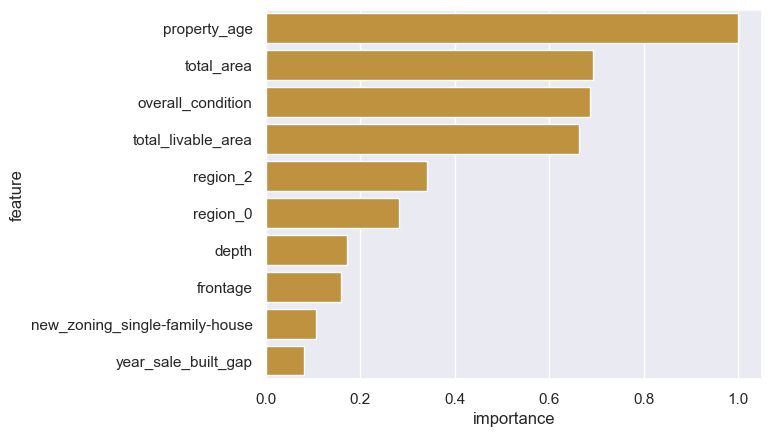

In [216]:
sns.barplot(data=feature_imp.head(10), x='importance', y='feature', color='orange', saturation=0.5)

<AxesSubplot: xlabel='importance', ylabel='feature'>

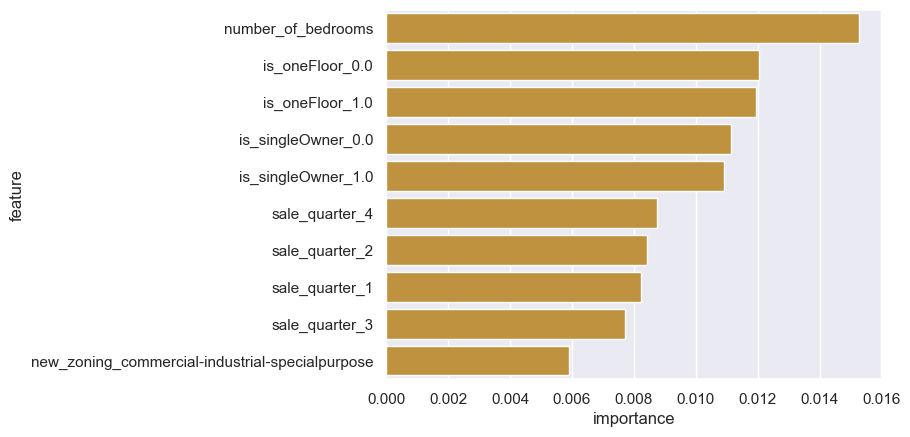

In [217]:
sns.barplot(data=feature_imp.tail(10), x='importance', y='feature', color='orange', saturation=0.5)

Dilihat dari grafik di atas, kita dapat mengambil beberapa poin :

- 5 fitur terbaik yaitu `property_age`, `total_area`, `overall_condition`, `total_livable_area` dan `region`. Sesuai dengan pengetahuan umum bahwa kelima fitur ini akan cenderung memiliki pengaruh yang signifikan untuk pemodelan
- Sedangkan untuk fitur terendah yaitu `sale_quarter`, `is_oneFloor` dan `is_singleOwner`

Selanjutnya mari kita coba kita drop fitur : sale_quarter, is_oneFloor dan is_SingleOwner. Lalu kita train ulang model kita

In [218]:
#Data Numerik
numeric_features = ['depth', 'frontage', 'number_of_bathrooms', 'number_of_bedrooms', 'number_of_rooms',
                        'total_area', 'total_livable_area', 'property_age', 'year_sale_built_gap', 
                        'total_rooms', 'overall_condition']


#Data Kategori
# Mengubah fitur kategorikal menjadi numerikal dan standard scaler untuk fitur numerical
transformer = ColumnTransformer([
    ('scaler', StandardScaler(), numeric_features),
    ('one hot', OneHotEncoder(sparse=False), ['is_there_a_garage', 'new_zoning']),
    ('binary', ce.BinaryEncoder(return_df=True), ['region'])
], remainder='passthrough')

In [219]:
#train
X_train_new = df_train.drop(['market_value', 'sale_quarter', 'is_oneFloor', 'is_singleOwner'], axis=1)
y_train_new = df_train['market_value']

#test
X_test_new = df_test.drop(['market_value', 'sale_quarter', 'is_oneFloor', 'is_singleOwner'], axis=1)
y_test_new = df_test['market_value']

In [220]:
print("Testing model terbaik Sebelum fitur di drop")
display(score_before_tuning)

Testing model terbaik Sebelum fitur di drop


MAE      MAPE     RMSLE  R-Squared
RandomForest  18477.787979  0.127264  0.243796    0.89205

In [221]:
print("Testing model terbaik setelah fitur sale_quarter, is_oneFloor dan is_SingleOwner di drop ")
y_pred_new, score_before_tuning_new, rf_estimator_new = model_testing(models, X_train_new, y_train_new, X_test_new, y_test_new)
display(score_before_tuning_new)

Testing model terbaik setelah fitur sale_quarter, is_oneFloor dan is_SingleOwner di drop 


MAE      MAPE     RMSLE  R-Squared
RandomForest  17794.461094  0.122322  0.240366   0.894169

Dari kedua tabel di atas dapat kita lihat, dengan menghapus fitur sale_quarter, is_oneFloor dan is_SingleOwner didapatkan nilai error yang lebih rendah walaupun tidak terlalu besar.

selain meningkatkan performa model, ada beberapa keuntungan kita melakukan seleksi fitur atau mengurangi jumlah fitur :

- **Mempercepat waktu pelatihan dan prediksi** : Dengan mengurangi jumlah fitur yang digunakan, seleksi fitur dapat mengurangi kompleksitas model dan mengurangi waktu yang diperlukan untuk melatih model. Selain itu, saat menggunakan model yang sudah dilatih untuk membuat prediksi pada data baru, penggunaan fitur yang lebih sedikit dapat mempercepat waktu prediksi.

- **Mengurangi overfitting** : Overfitting terjadi ketika model terlalu kompleks dan dapat "menghafal" data pelatihan tanpa mampu melakukan generalisasi pada data baru. Seleksi fitur dapat membantu mengurangi overfitting dengan mempertahankan fitur-fitur yang paling penting dan menghilangkan fitur-fitur yang dapat mempengaruhi model menjadi terlalu spesifik terhadap data pelatihan.

- **Meningkatkan interpretabilitas**: Dengan menggunakan fitur-fitur yang lebih sedikit dan lebih informatif, model yang dihasilkan menjadi lebih mudah diinterpretasikan. Ini membantu dalam pemahaman dan penjelasan hasil prediksi kepada pengguna atau pemangku kepentingan.

- **Mengurangi kompleksitas dan biaya** : Dengan menghilangkan fitur-fitur yang tidak penting, seleksi fitur dapat mengurangi kompleksitas model secara keseluruhan. Hal ini dapat mengurangi biaya pengumpulan, penyimpanan, dan pemrosesan data, terutama ketika berurusan dengan data yang sangat besar.

Selanjutnya kita akan melakukan tuning parameter pada model terbaik yaitu Random Forest

### **Hyperparameter Tuning**

Mari kita cek parameter default dari model kita sebelum di tuning

In [222]:
models['RandomForest'].get_params()

{'check_inverse': True,
 'func': <ufunc 'log'>,
 'inverse_func': <ufunc 'exp'>,
 'regressor__bootstrap': True,
 'regressor__ccp_alpha': 0.0,
 'regressor__criterion': 'squared_error',
 'regressor__max_depth': None,
 'regressor__max_features': 1.0,
 'regressor__max_leaf_nodes': None,
 'regressor__max_samples': None,
 'regressor__min_impurity_decrease': 0.0,
 'regressor__min_samples_leaf': 1,
 'regressor__min_samples_split': 2,
 'regressor__min_weight_fraction_leaf': 0.0,
 'regressor__n_estimators': 100,
 'regressor__n_jobs': None,
 'regressor__oob_score': False,
 'regressor__random_state': 1,
 'regressor__verbose': 0,
 'regressor__warm_start': False,
 'regressor': RandomForestRegressor(random_state=1),
 'transformer': None}

Hyperparameter Random forest yang akan cari nilai optimalnya adalah (kita ambil 6 ini saja yang mayoritas biasanya mempengaruhi performa model dari referenso kaggle, medium dll) :

- Jumlah pohon (n_estimators): Jumlah pohon yang akan dibangun dalam model. Hyperparameter ini biasanya disebut sebagai "n_estimators". Jumlah pohon yang lebih besar cenderung meningkatkan performa model, tetapi juga memerlukan waktu pelatihan yang lebih lama.

- Kedalaman maksimum pohon (max_depth): Hyperparameter ini menentukan kedalaman maksimum setiap pohon dalam model. Kedalaman yang lebih besar dapat memungkinkan model untuk mempelajari pola yang lebih kompleks, tetapi juga meningkatkan risiko overfitting.

- Jumlah fitur yang dipertimbangkan saat mencari pemisah terbaik (max_features): Hyperparameter ini disebut sebagai "max_features" dan menentukan jumlah fitur yang dipertimbangkan saat membagi simpul dalam pohon. Memilih jumlah fitur yang lebih kecil dapat mengurangi varian dan meningkatkan kebisingan.

- Jumlah sampel minimum yang diperlukan untuk membagi simpul (min_samples_split): Hyperparameter ini disebut sebagai "min_samples_split" dan menentukan jumlah minimum sampel yang diperlukan untuk membagi simpul dalam pohon. Mengatur jumlah minimum yang lebih tinggi dapat mengurangi risiko overfitting.

- Jumlah sampel minimum di leaf node (min_sample_leaf): Hyperparameter ini disebut sebagai "min_samples_leaf" dan menentukan jumlah minimum sampel yang diperlukan untuk membentuk leaf node dalam pohon. Mengatur jumlah minimum yang lebih tinggi dapat mengurangi risiko overfitting dan menghasilkan model yang lebih umum.

- Bootstrap : Bootstrap adalah teknik pengambilan sampel dengan penggantian dari dataset pelatihan yang tersedia.

Dalam memilih hyperparamter space, sebenernya menggunakan trial and error pada space pertama. Berikut space yang pertama

In [223]:
# Hyperparam space versi pertama untuk Random forest
rf_params = {
            'model__regressor__max_depth': [5,10,20,30,40,50,70,80,90],
            'model__regressor__min_samples_leaf': range(1,10,1),
            'model__regressor__min_samples_split': range(2,10,1),
            'model__regressor__n_estimators': range(100,1000,10),
            'model__regressor__max_features': ['auto', 'sqrt', 'log2'],
            'model__regressor__bootstrap': [True, False],
            }

Setelah melakukan pencarian parameter terbaik, kami mendapati bahwa model kami mulai menunjukkan peningkatan performa (penurunan error) pada parameter berikut :

{'model__regressor__n_estimators': 1000, 'model__regressor__min_samples_split': 2, 'model__regressor__min_samples_leaf': 1, 'model__regressor__max_features': 'auto', 'model__regressor__max_depth': 80, 'model__regressor__bootstrap': True

Dengan ini akan mempersempit pencarian parameter space pada rentang nilai-nilai ini

**keterangan : log/histori untuk pencarian parameter terhapus dan lupa untuk disimpan, jadi hanya bisa ditampilkan parameter nya saja

In [224]:
# Hyperparam space versi dua Random Forest
rf_params = {
            'model__regressor__max_depth': [80,90,100],
            'model__regressor__n_estimators': [1000, 1100, 1200],
            'model__regressor__min_samples_leaf': [1,2,3],
            'model__regressor__min_samples_split': [2,3],
            'model__regressor__max_features': ['auto'],
            'model__regressor__bootstrap': [True],
            }

In [226]:
#Hyperparameter tuning
def hyperparameter_tuning(model, params, X_train, y_train) :

    # Membuat algorithm chains 
    estimator = Pipeline([
                ('preprocessing', transformer),
                ('model', model)
                ])

    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    #scorer
    r2 = make_scorer(r2_score)
    mae = make_scorer(mean_absolute_error, greater_is_better=False)
    mape = make_scorer(mean_absolute_percentage_error, greater_is_better=False)
    rmsle = make_scorer(mean_squared_log_error, greater_is_better=False)

    
    # Hyperparameter tuning 
    random= RandomizedSearchCV(
        estimator, 
        param_distributions = params,
        n_iter = 10,
        cv = crossval, 
        scoring = {"r2" : r2, "mae" : mae, "mape" : mape, "rmsle" : rmsle},
        n_jobs = -1,
        refit = 'mape', # Hanya bisa memilih salah stau metric untuk optimisasi
        random_state = 1
    )
    

    # Fitting data training untuk mencari parameter terbaik
    random.fit(X_train, y_train)

    return random

In [227]:
random_rf = hyperparameter_tuning(models['RandomForest'], rf_params, X_train_new, y_train_new)

In [228]:
# Cek skor dan params terbaik untuk model terbaik (random forest)
print('Random Forest')
print('Best_score:',random_rf.best_score_)
print('Best_params:', random_rf.best_params_)

Random Forest
Best_score: -0.1437591988385643
Best_params: {'model__regressor__n_estimators': 1200, 'model__regressor__min_samples_split': 3, 'model__regressor__min_samples_leaf': 1, 'model__regressor__max_features': 'auto', 'model__regressor__max_depth': 80, 'model__regressor__bootstrap': True}


Setelah dilakukan tuning kami mendapatkan best_parameter untuk model terbaik pada dataset ini : 
'model__regressor__n_estimators': 1200, 'model__regressor__min_samples_split': 3, 'model__regressor__min_samples_leaf': 1, 'model__regressor__max_features': 'auto', 'model__regressor__max_depth': 80, 'model__regressor__bootstrap': True}

Selanjutnya mari kita fit model dan testing lagi pda data test

**Predict to Test Set with the Tuned Model**

In [229]:
# Benchmark model terbaik setelah di tuning 
# Catatan Random forest belum di tuning
tuned_models = {
    'RandomForest': random_rf.best_estimator_['model'] ,
}

In [230]:
print("Testing model terbaik sebelum di tuning ")
display(score_before_tuning_new)

Testing model terbaik sebelum di tuning 


MAE      MAPE     RMSLE  R-Squared
RandomForest  17794.461094  0.122322  0.240366   0.894169

In [231]:
print("Testing model terbaik setelah di tuning")
y_pred_after_tuning, score_after_tuning, rf_tuned_estimator = model_testing(tuned_models, X_train_new, y_train_new, X_test_new, y_test_new)
display(score_after_tuning)

Testing 3 model terbaik setelah di tuning


MAE      MAPE     RMSLE  R-Squared
RandomForest  17731.06426  0.121759  0.239235   0.895058

Terjadi peningkatan performa pada masing-masing metric sebesar :

MAE : 0.30% , MAPE : 0.46%, RMSLE : 0.47%, R-Squared : 0.1% 

Perlu diperhatikan bahwa setelah dilakukan tuning, memang terjadi peningkatan sedikit performa, tapi nilai n_estimators dari hasil tuning adalah 1200 dan juga max_depth = 80. Yang artinya cost yang harus kita tanggung adalah waktu untuk train yang dibituhkan cukup lama, karena jumlah estimator dan kedalaman nya besar --> makin kompleks model nya-->  makin lama juga waktu yang dibutuhkan untuk mentrain ulang model. Selain itu juga ada kecendrungan model untuk terjadi overfitting. (harus ditest lebih lanjut)

Disini kami tetap menggunakan model dengan parameter terbaik sebagai model akhir, karena tujuan pemodelan kali ini adalah untuk mendapatkan nilai market_value se akurat mungkin

### Actual vs Prediction Scatterplot

Selanjutnya mari kita lihat sebaran nilai prediksi vs nilai aktual market value (khusus single family atau residentials) di Philadelpia

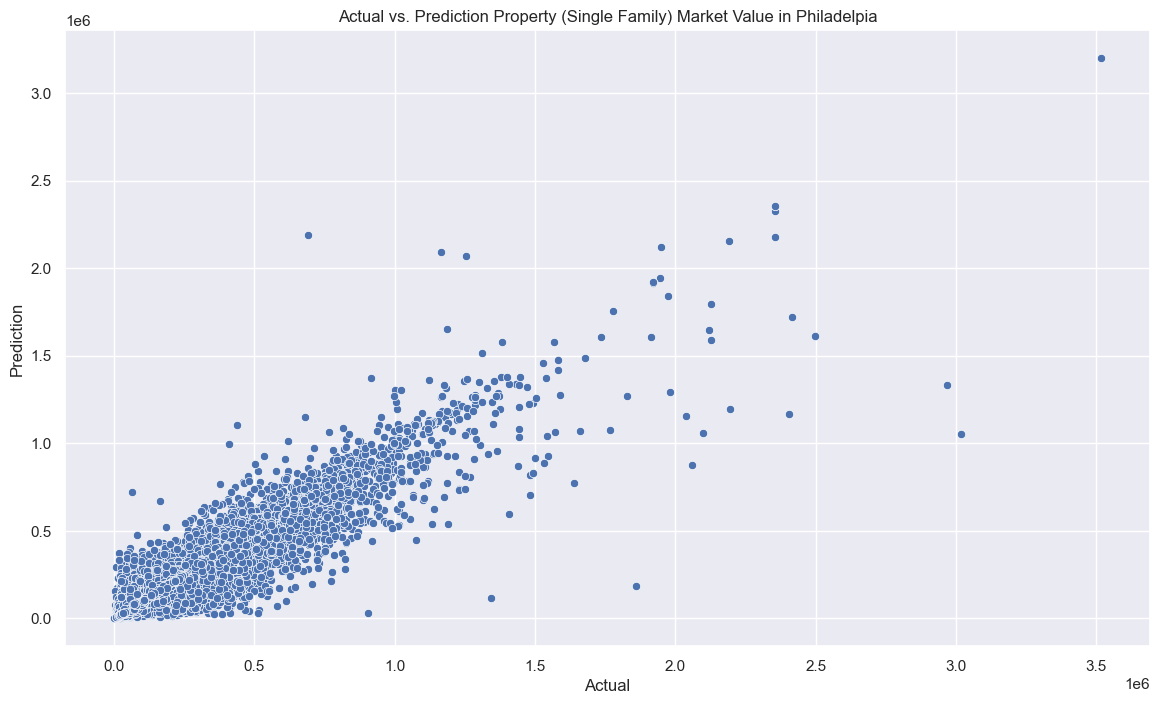

In [238]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test_new.values, y=y_pred_after_tuning[0]).set(title='Actual vs. Prediction Property (Single Family) Market Value in Philadelpia', 
                                               xlabel='Actual', 
                                               ylabel='Prediction')

Adanya nilai-nilai error yang besar pada beberapa kasus. Hal ini dapat tergambarkan pula pada plot di atas, di mana terdapat harga aktual yang rendah tapi diprediksi jauh lebih tinggi (overestimation), dan juga sebaliknya (underestimation). Akan tetapi, nilai MAPE yang didapat, yaitu sekitar **12,1%** menjadikan model ini dapat dikategorikan ke dalam **'Good forecasting'** (Lewis, 1982). 

*Source: Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting*

### **Error Analysis**

Selanjutnya kami akan melakukan error analysis, untuk melihat data-data seperti apa saja yang membuat model ini memiliki nilai error yang tinggi. (terutama pada top 5 features nya)

In [233]:
df_error = y_test_new.copy()
df_error = df_error.to_frame()

df_error['predict'] = y_pred_new[0]
df_error['predict'] = round(df_error['predict'],2)
df_error.sample(5)

market_value    predict
563877      207300.0  208130.19
357540      133300.0  124726.80
197789      106100.0  163795.53
130212      221500.0  220903.13
278066      223400.0  118695.51

Disini saya akan mengecek prediksi mana saja yang memiliki nilai error yang tinggi. Kita dapat mengelompokkan error tersebut ke dalam grup overestimation dan underestimation, lalu memilih 5% error paling ekstrim saja untuk tiap grup. Nantinya pengelompokkan akan menjadi 3 grup, yaitu overestimation (5%), underestimation (5%), dan grup mayoritas yang error-nya mendekati nilai mean (90%). Setelahnya kita bisa mengecek hubungan antara error tersebut dengan tiap variabel independen. Pada akhirnya kita dapat mengetahui sebenarnya variabel mana saja dan aspek apa yang menyebabkan model menghasilkan error yang tinggi, sehingga kita bisa melakukan training ulang dengan penerapan feature engineering lainnya.

Text(0.5, 1.0, 'predicted vs actual market value')

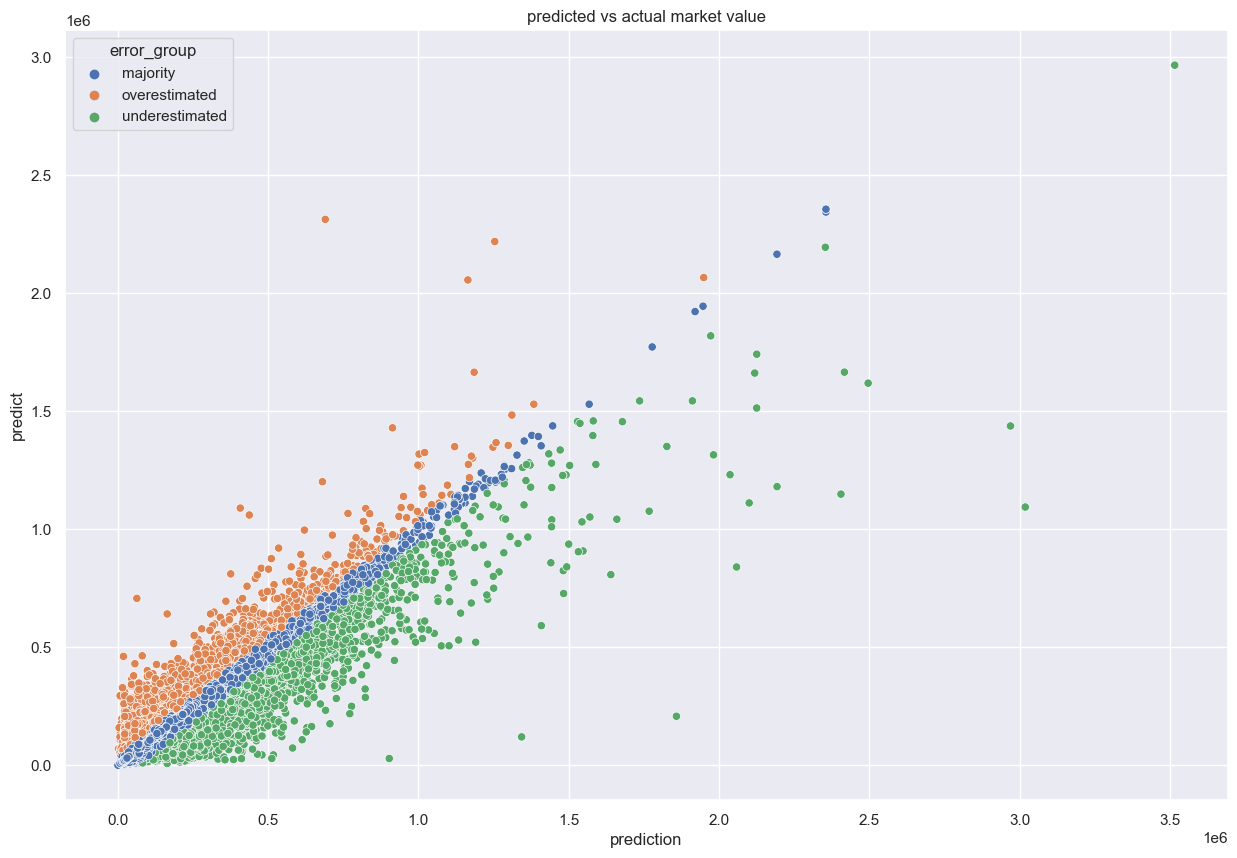

In [237]:
df_error['error'] = df_error['predict'] - df_error['market_value']

underestimated = df_error['error'].sort_values().iloc[0:int(0.05*len(df_error))].index
overestimated= df_error['error'].sort_values().iloc[-int(0.05*len(df_error)):].index

df_error.loc[overestimated, 'error_group'] = 'overestimated'
df_error.loc[underestimated, 'error_group'] = 'underestimated'
df_error.fillna('majority', inplace=True)


plt.figure(figsize=(15,10))
sns.scatterplot(y=df_error['predict'], x=df_error['market_value'], hue=df_error['error_group'])
plt.xlabel('actual')
plt.xlabel('prediction')
plt.title('predicted vs actual market value')

In [ ]:
df_error['error_group'].value_counts()

majority          79757
overestimated      4430
underestimated     4430
Name: error_group, dtype: int64

##### 1. fitur `property_age`

Text(0.5, 1.0, 'property_age feature error')

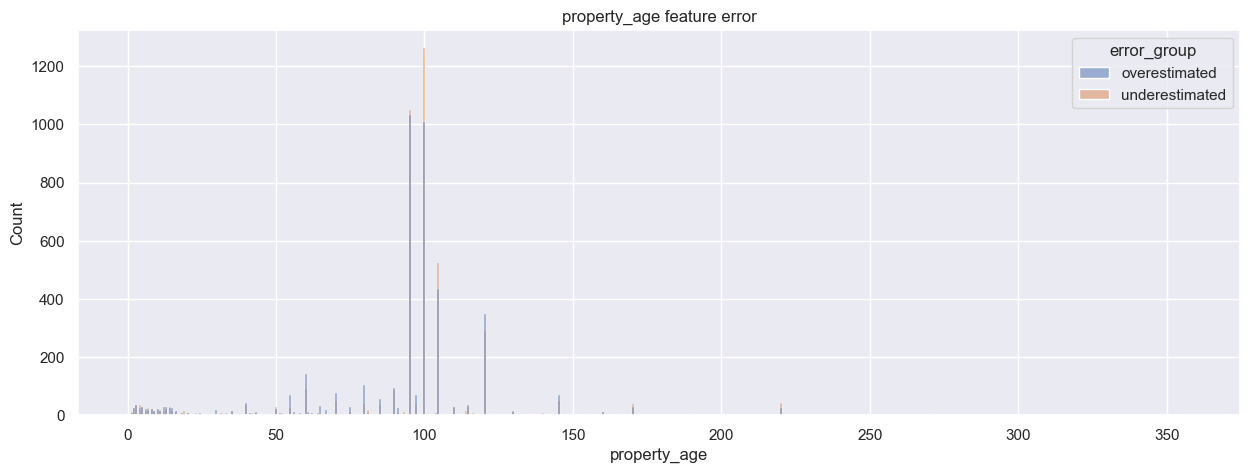

In [242]:
df_error['property_age'] = X_test_new['property_age']
plt.figure(figsize=(15,5))
sns.histplot(df_error[df_error['error_group'] != 'majority'], x='property_age', hue='error_group')
plt.title('property_age feature error')



Jika kita lihat model ini cenderung memprediksi nilai market jauh lebih rendah (underestimated) dan overestimated dari nilai aktualnya saat nilai umur bangunan nya berada pada nilai 95, 100 dan 105 tahun

##### 2. fitur `overall_condition`

Text(0.5, 1.0, 'overall_condition feature error')

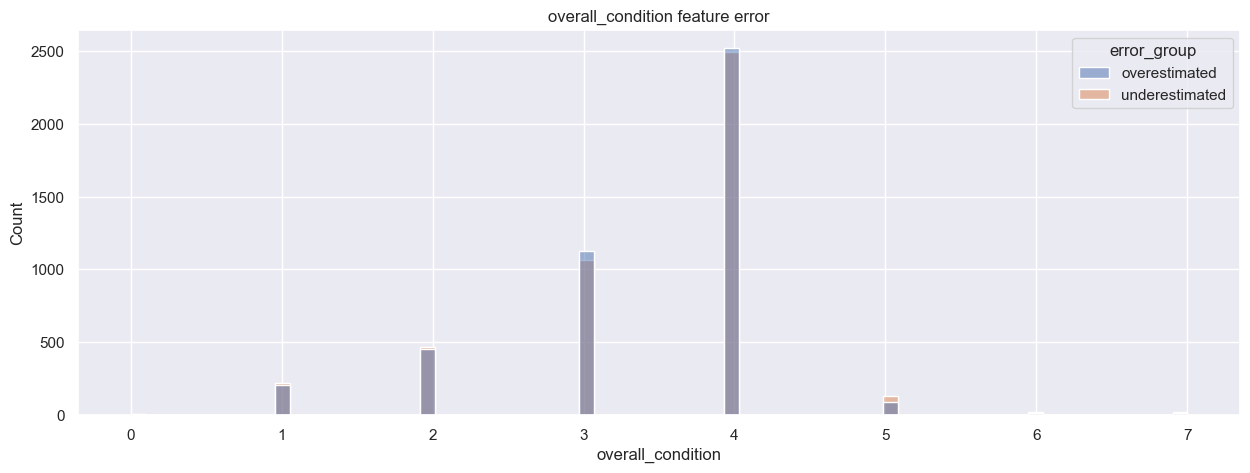

In [246]:
df_error['overall_condition'] = X_test_new['overall_condition']
plt.figure(figsize=(15,5))
sns.histplot(df_error[df_error['error_group'] != 'majority'], x='overall_condition', hue='error_group')
plt.title('overall_condition feature error')

Jika kita lihat model ini cenderung menghasilkan error yang besar saat kondisi rumah (interior dan eksterior) bernilai 4 (atau kondisi average), bisa jadi karena data yang kami miliki memang lebih bias ke nilai 4 (di atas 70% dari total data yang ada bernilai 4) sehingga lebih cenderung menghasilkan error besar

##### 3. fitur `total_area`

Text(0.5, 1.0, 'total_area feature error')

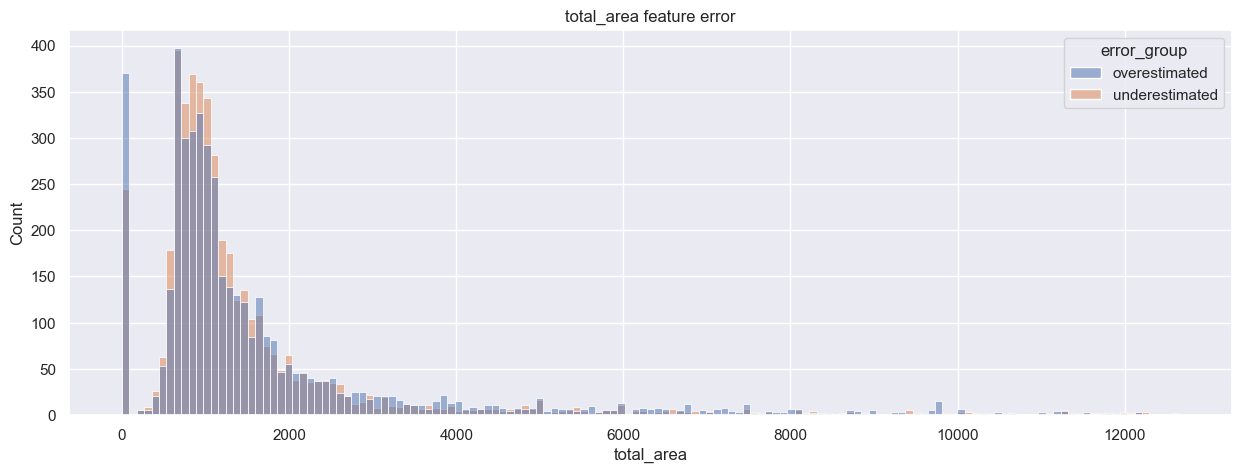

In [247]:
df_error['total_area'] = X_test_new['total_area']
plt.figure(figsize=(15,5))
sns.histplot(df_error[df_error['error_group'] != 'majority'], x='total_area', hue='error_group')
plt.title('total_area feature error')

In [ ]:
X_train[X_train['total_area']==0]

depth  frontage  number_of_bathrooms  number_of_bedrooms  \
543601    0.0       0.0                  0.0                 0.0   
547035    0.0       0.0                  0.0                 2.0   
563921    0.0       0.0                  0.0                 0.0   
568573    0.0       0.0                  0.0                 0.0   
546696    0.0       0.0                  0.0                 2.0   
...       ...       ...                  ...                 ...   
569201    0.0       0.0                  0.0                 2.0   
550844    0.0       0.0                  0.0                 0.0   
563915    0.0       0.0                  1.0                 1.0   
577457    0.0       0.0                  2.0                 3.0   
561947    0.0       0.0                  0.0                 0.0   

        number_of_rooms  total_area  total_livable_area       region  \
543601              0.0         0.0              1358.0  center_city   
547035              0.0         0.0              1183.0  center_city   
563921              0.0         0.0               323.0  center_city   
568573              0.0         0.0              1140.0    northeast   
546696              0.0         0.0              1251.0        south   
...                 ...         ...                 ...          ...   
569201              0.0         0.0              1251.0         west   
550844              0.0         0.0               691.0  center_city   
563915              3.0         0.0               798.0        north   
577457              6.0         0.0              2100.0        north   
561947              0.0         0.0               764.0  center_city   

        sale_quarter                            new_zoning  overall_condition  \
543601             2  commercial-industrial-specialpurpose                  3   
547035             3                    multi-family-house                  4   
563921             2  commercial-industrial-specialpurpose                  4   
568573             3                   single-family-house                  4   
546696             3  commercial-industrial-specialpurpose                  3   
...              ...                                   ...                ...   
569201             2                    multi-family-house                  4   
550844             2  commercial-industrial-specialpurpose                  3   
563915             4  commercial-industrial-specialpurpose                  3   
577457             1                    multi-family-house                  4   
561947             3                    multi-family-house                  3   

        property_age  year_sale_built_gap  total_rooms  is_there_a_garage  \
543601            14                   11          0.0                0.0   
547035            57                   54          2.0                0.0   
563921           120                  112          0.0                0.0   
568573            30                   18          0.0                0.0   
546696            25                   24          2.0                1.0   
...              ...                  ...          ...                ...   
569201            50                   32          2.0                0.0   
550844           120                  109          0.0                0.0   
563915            14                    1          5.0                0.0   
577457            60                   59         11.0                1.0   
561947            60                   54          0.0                0.0   

        is_oneFloor  is_singleOwner  
543601          0.0             0.0  
547035          0.0             0.0  
563921          0.0             1.0  
568573          0.0             1.0  
546696          0.0             0.0  
...             ...             ...  
569201          0.0             1.0  
550844          0.0             0.0  
563915          0.0             1.0  
577457          0.0             1.0  
561947    

Selanjutnya yaitu pada fitur `total_area` atau luas tanah dari properti

- Seperti yang kita lihat, model kami cenderung menghasilkan error yang besar saat total luas tanah nya bernilai 0 --> kelemahan model
- Sebagai catatan : luas 0 itu sebenarnya tidak benar-benar 0, mungkin bisa saja luas tanahnya kecil jika dibandingkan luas bangunan nya. Contoh rumah kecil yang bertingkat (karena tidak terlalu membutuhkan space tanah yang luas untuk membangun properti semacam ini).
- Salah satu mengatasi masalah ini adalah dengan meng-exclude data luas tanah yang 0 dari pemodelan ini. Tapi bukan berarti data yang ini benar-benar dibuang. Mungkin kita bisa buatkan model prediksi terpisa khusus untuk rumah-rumah susun atau bertingkat yang memang luas tanah nya kecil --> special case

##### 4. fitur `total_liveable_area`

Text(0.5, 1.0, 'total_livable_area feature error')

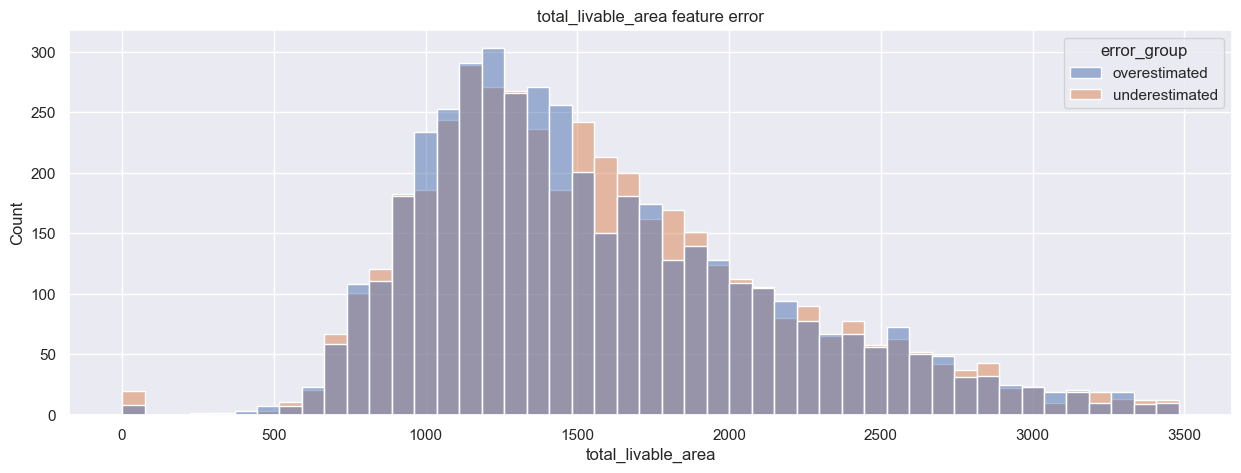

In [248]:
df_error['total_livable_area'] = X_test_new['total_livable_area']
plt.figure(figsize=(15,5))
sns.histplot(df_error[df_error['error_group'] != 'majority'], x='total_livable_area', hue='error_group')
plt.title('total_livable_area feature error')

Selanjutnya yaitu pada fitur `total_livable_area` atau luas bangunan dari properti

- Seperti yang kita lihat, model kami cenderung menghasilkan error yang besar pada rentang 1200-1210 sqft --> sebaran data nya banyak di rentang nilai ini
- Selain itu dapat dilihat juga ada error besar banyak juga terjadi di luas bangunan yang bernilai 0. Sama seperti total luas tanah, luas bangunan 0 itu bukan benar-benar 0. Itu kemungkinan artinya ada properti yang memang bangunan nya kecil (mungkin hanya kamar mandi umum atau sejenisnya) tapi berada di area tanah yang luas

##### 5. fitur `region`

Text(0.5, 1.0, 'region feature error')

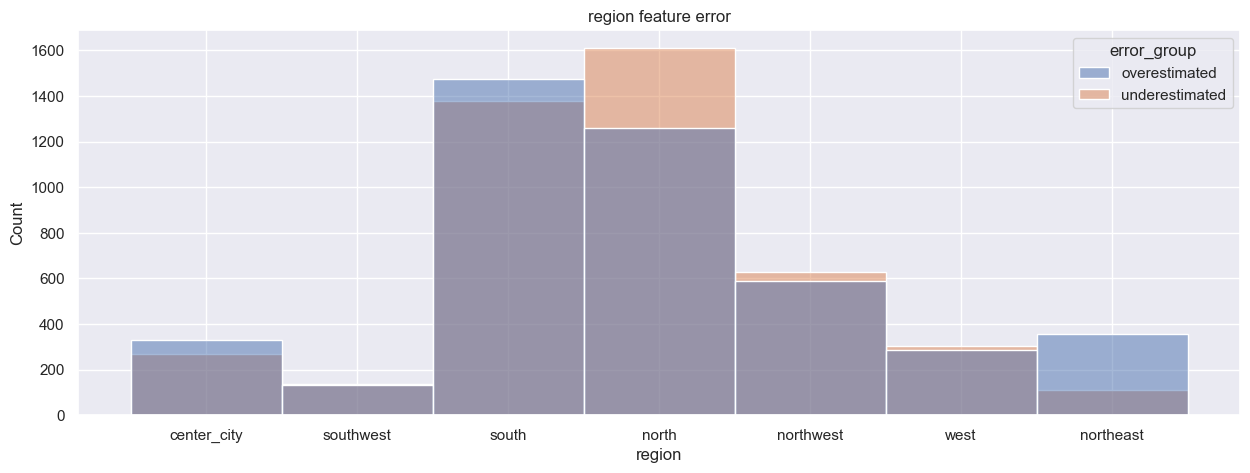

In [249]:
df_error['region'] = X_test_new['region']
plt.figure(figsize=(15,5))
sns.histplot(df_error[df_error['error_group'] != 'majority'], x='region', hue='error_group')
plt.title('region feature error')

- model kami cenderung menghasilkan error yang besar pada region north philadelphia dan south philadelpia. Salah satu alasan nya karena sebaran data properti lebih banyak tersebar di daerah utara
- Sedangkan untuk region south, menurut kami kenapa error nya besar karena daerah tersebut berbatasan/berdekatan dengan center city (wilayah dengan median harga properti tertinggi) dan juga berdekatan dengan wilayah southwest (wilayah dengan median terkecil). Sehingga variansi nilainya cukup tinggi di daerah ini.

# Conclusion and Recommendation

### **Conclusion**

1. Model yang telah dibangun memiliki score MAPE sebesar 12.1%. yang berarti ketika model yang dibuat digunakan untuk memprediksi nilai properti pada rentang nilai seperti yang dilatih terhadap model (market value: 1,000 USD - 4,160,000 USD ) untuk tipe properti residensial di kota Philadelphia, maka hasil prediksi yang dihasilkan oleh model memiliki kemungkinan tingkat kesalahan sebesar 12.1% dari nilai aslinya. Nilai MAPE yang didapat, yaitu sekitar **12,1%** menjadikan model ini dapat dikategorikan ke dalam **'Good forecasting'** (Lewis, 1982).

2. Performa Model yang kami mencapai target yang ditentukan yatu (MAPE <= 13% dan MAE <= 42,000USD)

3. Berdasarkan model yang dibuat (dilihat dari feature importance) fitur-fitur `property_age`, `total_area`, `overall_condition`, `total_livable_area` dan `region` menjadi fitur yang paling berpengaruh terhadap nilai prediksi harga market properti.

4. Dari analisa kesalahan (*error analysis*) yang dilakukan pada 4 fitur terpenting, terdapat beberapa kondisi pada fitur-fitur tersebut yang membuat model memiliki nilai error yang besar :
    - `property_age` pada nilai 95, 100 dan 105 tahun
    - `total_area` atau luas tanah yang memiliki nilai 0 (artinya tanah nya sempit, tapi luas bangunan besar --> rumah susun/apartemen kecil)
    - `overall_condition` atau kondisi rumah (interior dan eksterior) pada nilai 4 (average) --> sebaran nya paling banyak yaitu di atas 70%
    - `total_livable_area` atau luas bangunan pada nilai 0 dan rentang nilai 1200-1210 sqft
    - `region` yaitu di wilayah phiadelphia utara (north) karena sebaran data nya paling banyak dan selatan (south) karena harga nya beragam atau tidak linier (wilayah ini berada tepat di tengah wilayah dengan nilai median market tertinggi dan terendah )

### **Recommendations**

1. Saat mengecek prediksi mana saja yang memiliki nilai error yang tinggi dan karakteristik untuk 5 fitur terpenting. Pada akhirnya kita dapat mengetahui sebenarnya variabel mana saja dan aspek apa yang menyebabkan model menghasilkan error yang tinggi dengan lebih mendalam, sehingga kita bisa melakukan training ulang dengan penerapan feature engineering lainnya.

2. Jika ada penambahan banyak data, dapat dicoba dengan menggunakan model yang lebih kompleks, seperti recursive neural networks (RNN). Namun, kalau jumlah data dan fiturnya masih seperti dataset ini, kemungkinan besar tidak akan mengubah hasilnya secara signifikan.

3. Model yang sudah dibangun ini bisa dimanfaatkan untuk pengembangan pembuatan model lainnya. Misalkan kita ingin membuat model yang bisa memprediksi properti dengan kategori lain misalkan properti industri maupun apartemen {multi family)

4. Melakukan tuning hyperparameter yang lebih impresif (memperluas parameter space atau menggunakan metodologi lain seperti Bayesian, GridSearch dll), untuk mendapatkan performa terbaik (dan mengurangi overfiiting). Tapi memang dibutuhkan resource/komputer dengan kemampuan komputasi yang lebih tinggi untuk model RandomForest.

#### **Save Model**

In [253]:
# rf_tuned_estimator

In [254]:
# # Save model
# import pickle

# pickle.dump(rf_tuned_estimator, open('Models/philadelphia_property_price_model.sav', 'wb'))

In [255]:
# # Load model 
# filename_model= 'Models/philadelphia_property_price_model.sav'
# loaded_model = pickle.load(open(filename_model, 'rb'))

In [256]:
# #inferensi untuk satu baris data
# loaded_model.predict(X_test.iloc[[0]])